In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset = pd.read_csv("cement_dataset.csv")
dataset.head(5)

Date_&_Time  Mill_TPH  Clinker_TPH  Gypsum_TPH  DFA_TPH  WFA_TPH  \
0  01-06-2022 07:24    162.36        93.11        5.44    59.47     4.35   
1  01-06-2022 08:29    162.45        91.69        5.58    61.00     4.18   
2  01-06-2022 09:28    162.15        87.34        5.91    64.63     4.27   
3  01-06-2022 10:22    162.90        89.48        5.76    63.00     4.67   
4  01-06-2022 11:33    167.23        96.08        5.58    61.00     4.57   

   Mill_KW  Mill_Inlet_Temp  Mill_Outlet_Temp  Mill_Outlet_BE_Amp  ...  \
0  3654.09            27.65             82.81               48.54  ...   
1  3706.16            28.56             91.02               42.81  ...   
2  3730.61            30.37             88.79               42.27  ...   
3  3658.40            29.63             88.19               45.70  ...   
4  3695.86            29.34             94.95               40.22  ...   

   CA_Fan_RPM  CA_Fan_KW  Mill_Folaphone  Mill_Inlet_Draft  Mill_Outlet_Draft  \
0      900.34     326.28           96.76              19.8               87.8   
1      900.31     326.83           96.75              19.9               88.3   
2      900.30     329.04           96.78              21.6               86.4   
3      905.32     339.29           96.76              19.6               87.5   
4      905.26     334.76           96.81              20.3               82.1   

   Sep_Vent_Inlet_Draft  Sep_Vent_Outlet_Draft  Sep_Vent_bag_filter_fan_kw  \
0                 133.4                  212.8                       14.36   
1                 132.8                  212.5                       14.26   
2                 133.5                  212.8                       15.10   
3                 132.5                  211.3                       14.25   
4                 132.9                  213.4                       14.10   

   Sep_Vent_bag_filter_fan_rpm  Residue  
0                        750.0     14.4  
1                        750.0     15.2  
2                        750.0     16.6  
3                        750.0     17.2  
4                        750.0     15.2  

[5 rows x 28 columns]

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5514 entries, 0 to 5513
Data columns (total 28 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Date_&_Time                  5514 non-null   object 
 1   Mill_TPH                     5514 non-null   float64
 2   Clinker_TPH                  5514 non-null   float64
 3   Gypsum_TPH                   5514 non-null   float64
 4   DFA_TPH                      5514 non-null   float64
 5   WFA_TPH                      5514 non-null   float64
 6   Mill_KW                      5514 non-null   float64
 7   Mill_Inlet_Temp              5514 non-null   float64
 8   Mill_Outlet_Temp             5514 non-null   float64
 9   Mill_Outlet_BE_Amp           5514 non-null   float64
 10  Mill_Vent_Fan_RPM            5514 non-null   float64
 11  Mill_Vent_Fan_KW             5514 non-null   float64
 12  Mill_Vent_BF_Inlet_Draft     5514 non-null   float64
 13  Mill_Vent_BF_Outle

In [4]:
dataset.duplicated().sum()

0

In [5]:
dataset.describe()

Mill_TPH  Clinker_TPH   Gypsum_TPH      DFA_TPH      WFA_TPH  \
count  5514.000000  5514.000000  5514.000000  5514.000000  5514.000000   
mean    165.817456    96.289902     4.941714    56.575987     8.020007   
std      12.216735     8.647355     0.709924     6.928447     4.325036   
min      96.390000    47.390000     2.560000    18.310000     0.000000   
25%     160.552500    92.840000     4.682500    54.372500     5.230000   
50%     168.090000    98.210000     5.220000    58.140000     8.405000   
75%     174.410000   101.270000     5.420000    60.960000     8.870000   
max     187.110000   114.340000     6.100000    65.490000    45.000000   

           Mill_KW  Mill_Inlet_Temp  Mill_Outlet_Temp  Mill_Outlet_BE_Amp  \
count  5514.000000      5514.000000       5514.000000         5514.000000   
mean   3670.033520        33.249733         92.180615           50.387985   
std     134.901563         4.177403          5.459989            5.859812   
min     203.360000        21.800000         72.040000           36.000000   
25%    3591.932500        30.140000         89.150000           45.752500   
50%    3649.430000        32.575000         91.835000           49.820000   
75%    3762.090000        34.827500         95.905000           54.307500   
max    3910.520000        51.890000        112.220000           73.810000   

       Mill_Vent_Fan_RPM  ...   CA_Fan_RPM    CA_Fan_KW  Mill_Folaphone  \
count        5514.000000  ...  5514.000000  5514.000000     5514.000000   
mean          828.088569  ...   903.788727   328.884153       97.420669   
std            60.548652  ...    14.249222    10.250126        2.450631   
min           642.370000  ...   778.150000   272.900000       90.820000   
25%           770.000000  ...   900.320000   322.690000       96.530000   
50%           814.970000  ...   905.290000   327.945000       96.800000   
75%           899.940000  ...   910.537500   336.050000       97.300000   
max           930.010000  ...   948.770000   375.080000      110.670000   

       Mill_Inlet_Draft  Mill_Outlet_Draft  Sep_Vent_Inlet_Draft  \
count       5514.000000        5514.000000           5514.000000   
mean          23.593067          86.689226            136.308827   
std            5.141925           9.409160             22.907530   
min            2.370000         -39.730000             87.000000   
25%           20.300000          85.562500            133.200000   
50%           22.300000          87.300000            134.300000   
75%           25.567500          90.247500            138.495000   
max           44.570000         112.020000           1319.000000   

       Sep_Vent_Outlet_Draft  Sep_Vent_bag_filter_fan_kw  \
count            5514.000000                 5514.000000   
mean              209.568339                   17.774548   
std                32.256728                    4.928909   
min                 8.160000                    1.980000   
25%               211.900000                   14.380000   
50%               212.800000                   15.050000   
75%               219.510000                   20.537500   
max               229.690000                   36.500000   

       Sep_Vent_bag_filter_fan_rpm      Residue  
count                  5514.000000  5514.000000  
mean                    758.442269    15.185724  
std                      19.745528     1.233906  
min                     683.360000    11.300000  
25%                     750.000000    14.300000  
50%                     750.000000    15.200000  
75%                     763.407500    15.900000  
max                     931.490000    18.600000  

[8 rows x 27 columns]

In [6]:
# check for null values through each column
dataset.isna().sum()

Date_&_Time                    0
Mill_TPH                       0
Clinker_TPH                    0
Gypsum_TPH                     0
DFA_TPH                        0
WFA_TPH                        0
Mill_KW                        0
Mill_Inlet_Temp                0
Mill_Outlet_Temp               0
Mill_Outlet_BE_Amp             0
Mill_Vent_Fan_RPM              0
Mill_Vent_Fan_KW               0
Mill_Vent_BF_Inlet_Draft       0
Mill_Vent_BF_Outlet_Draft      0
Reject                         0
Sep_RPM                        0
Sep_KW                         0
Sep_Amp                        0
CA_Fan_RPM                     0
CA_Fan_KW                      0
Mill_Folaphone                 0
Mill_Inlet_Draft               0
Mill_Outlet_Draft              0
Sep_Vent_Inlet_Draft           0
Sep_Vent_Outlet_Draft          0
Sep_Vent_bag_filter_fan_kw     0
Sep_Vent_bag_filter_fan_rpm    0
Residue                        0
dtype: int64

In [7]:
dataset.sample(5)

Date_&_Time  Mill_TPH  Clinker_TPH  Gypsum_TPH  DFA_TPH  WFA_TPH  \
1140  05-09-2022 02:25    176.25       103.64        5.64    61.69     5.29   
2248  10-11-2022 15:40    174.80        99.29        5.59    61.18     8.74   
4249  23-02-2023 14:35    169.53        95.79        5.09    59.34     9.32   
1420  21-09-2022 02:27    171.69       100.95        5.49    60.09     5.15   
5152  13-04-2023 04:34    178.21       101.58        5.35    62.37     8.91   

      Mill_KW  Mill_Inlet_Temp  Mill_Outlet_Temp  Mill_Outlet_BE_Amp  ...  \
1140  3762.58            32.84             94.06               44.14  ...   
2248  3573.97            33.05             91.79               48.25  ...   
4249  3564.02            34.04             95.23               53.88  ...   
1420  3832.21            27.81             83.39               46.60  ...   
5152  3812.85            34.46             95.99               54.00  ...   

      CA_Fan_RPM  CA_Fan_KW  Mill_Folaphone  Mill_Inlet_Draft  \
1140      900.37     324.52           97.05             21.60   
2248      900.36     323.59           96.86             22.60   
4249      906.40     324.90          102.82             27.12   
1420      900.24     331.01           96.54             20.20   
5152      912.19     331.95           97.69             27.22   

      Mill_Outlet_Draft  Sep_Vent_Inlet_Draft  Sep_Vent_Outlet_Draft  \
1140              89.80                133.80                 211.30   
2248              87.90                135.00                 212.50   
4249              91.62                138.07                 219.74   
1420              83.50                135.20                 213.50   
5152              94.92                139.47                 221.84   

      Sep_Vent_bag_filter_fan_kw  Sep_Vent_bag_filter_fan_rpm  Residue  
1140                       14.20                       750.00    15.40  
2248                       15.10                       750.00    13.90  
4249                       20.51                       750.34    15.80  
1420                       14.50                       750.00    16.10  
5152                       21.32                       758.07    16.74  

[5 rows x 28 columns]

In [8]:
# to check for zero values in the specified column
0.0 in dataset['Mill_Outlet_Temp'].values

False

In [9]:
dataset.describe()

Mill_TPH  Clinker_TPH   Gypsum_TPH      DFA_TPH      WFA_TPH  \
count  5514.000000  5514.000000  5514.000000  5514.000000  5514.000000   
mean    165.817456    96.289902     4.941714    56.575987     8.020007   
std      12.216735     8.647355     0.709924     6.928447     4.325036   
min      96.390000    47.390000     2.560000    18.310000     0.000000   
25%     160.552500    92.840000     4.682500    54.372500     5.230000   
50%     168.090000    98.210000     5.220000    58.140000     8.405000   
75%     174.410000   101.270000     5.420000    60.960000     8.870000   
max     187.110000   114.340000     6.100000    65.490000    45.000000   

           Mill_KW  Mill_Inlet_Temp  Mill_Outlet_Temp  Mill_Outlet_BE_Amp  \
count  5514.000000      5514.000000       5514.000000         5514.000000   
mean   3670.033520        33.249733         92.180615           50.387985   
std     134.901563         4.177403          5.459989            5.859812   
min     203.360000        21.800000         72.040000           36.000000   
25%    3591.932500        30.140000         89.150000           45.752500   
50%    3649.430000        32.575000         91.835000           49.820000   
75%    3762.090000        34.827500         95.905000           54.307500   
max    3910.520000        51.890000        112.220000           73.810000   

       Mill_Vent_Fan_RPM  ...   CA_Fan_RPM    CA_Fan_KW  Mill_Folaphone  \
count        5514.000000  ...  5514.000000  5514.000000     5514.000000   
mean          828.088569  ...   903.788727   328.884153       97.420669   
std            60.548652  ...    14.249222    10.250126        2.450631   
min           642.370000  ...   778.150000   272.900000       90.820000   
25%           770.000000  ...   900.320000   322.690000       96.530000   
50%           814.970000  ...   905.290000   327.945000       96.800000   
75%           899.940000  ...   910.537500   336.050000       97.300000   
max           930.010000  ...   948.770000   375.080000      110.670000   

       Mill_Inlet_Draft  Mill_Outlet_Draft  Sep_Vent_Inlet_Draft  \
count       5514.000000        5514.000000           5514.000000   
mean          23.593067          86.689226            136.308827   
std            5.141925           9.409160             22.907530   
min            2.370000         -39.730000             87.000000   
25%           20.300000          85.562500            133.200000   
50%           22.300000          87.300000            134.300000   
75%           25.567500          90.247500            138.495000   
max           44.570000         112.020000           1319.000000   

       Sep_Vent_Outlet_Draft  Sep_Vent_bag_filter_fan_kw  \
count            5514.000000                 5514.000000   
mean              209.568339                   17.774548   
std                32.256728                    4.928909   
min                 8.160000                    1.980000   
25%               211.900000                   14.380000   
50%               212.800000                   15.050000   
75%               219.510000                   20.537500   
max               229.690000                   36.500000   

       Sep_Vent_bag_filter_fan_rpm      Residue  
count                  5514.000000  5514.000000  
mean                    758.442269    15.185724  
std                      19.745528     1.233906  
min                     683.360000    11.300000  
25%                     750.000000    14.300000  
50%                     750.000000    15.200000  
75%                     763.407500    15.900000  
max                     931.490000    18.600000  

[8 rows x 27 columns]

## Detecting Outliers

<Axes: >

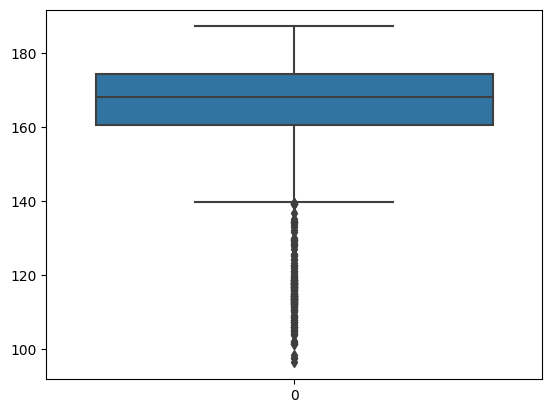

In [10]:
sns.boxplot(dataset['Mill_TPH'])


<Axes: >

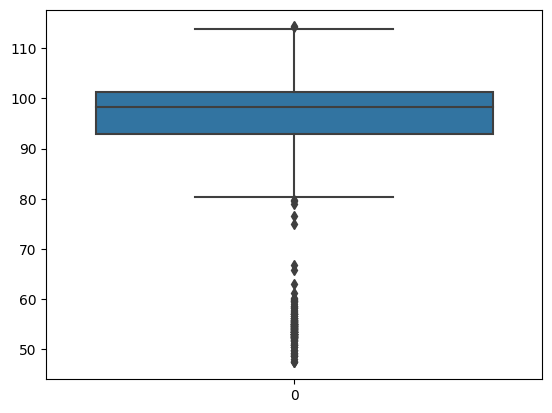

In [11]:
sns.boxplot(dataset['Clinker_TPH'])


<Axes: >

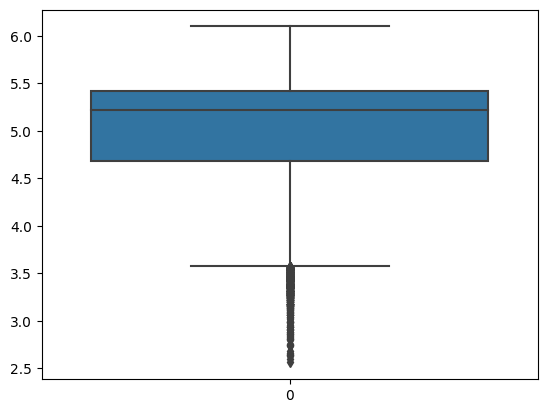

In [12]:
sns.boxplot(dataset['Gypsum_TPH'])


<Axes: >

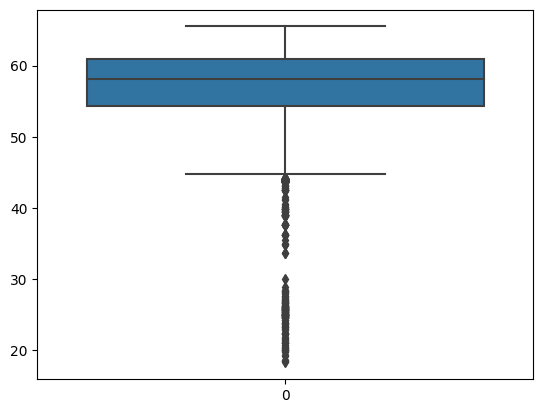

In [13]:
sns.boxplot(dataset['DFA_TPH'])


<Axes: >

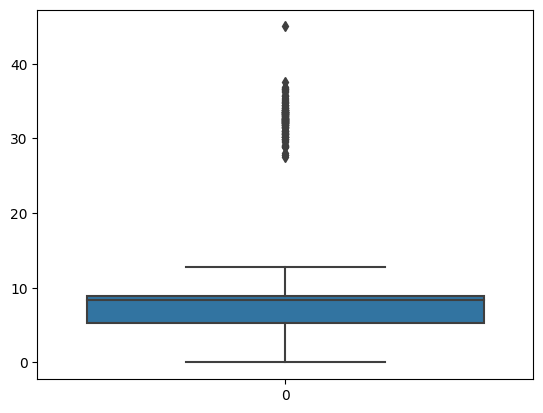

In [14]:
sns.boxplot(dataset['WFA_TPH'])


<Axes: >

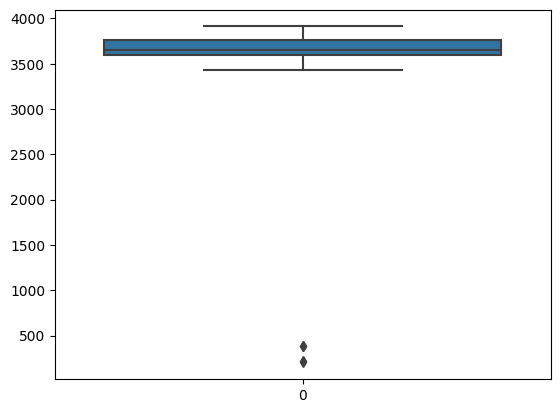

In [15]:
sns.boxplot(dataset['Mill_KW'])


<Axes: >

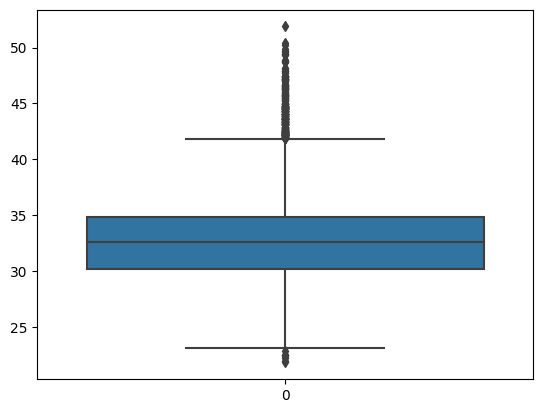

In [16]:
sns.boxplot(dataset['Mill_Inlet_Temp'])


<Axes: >

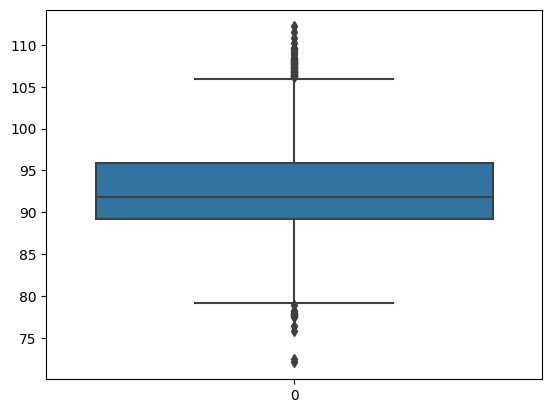

In [17]:
sns.boxplot(dataset['Mill_Outlet_Temp'])


<Axes: >

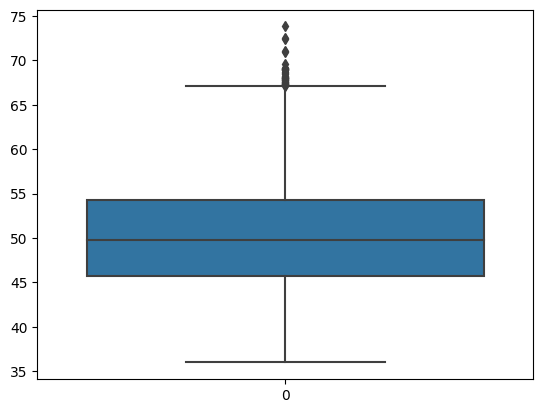

In [18]:
sns.boxplot(dataset['Mill_Outlet_BE_Amp'])


<Axes: >

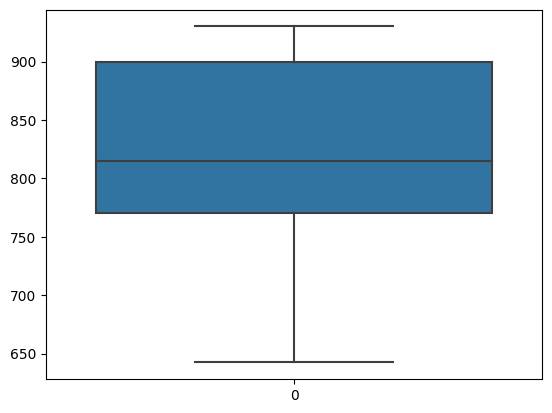

In [19]:
sns.boxplot(dataset['Mill_Vent_Fan_RPM'])


<Axes: >

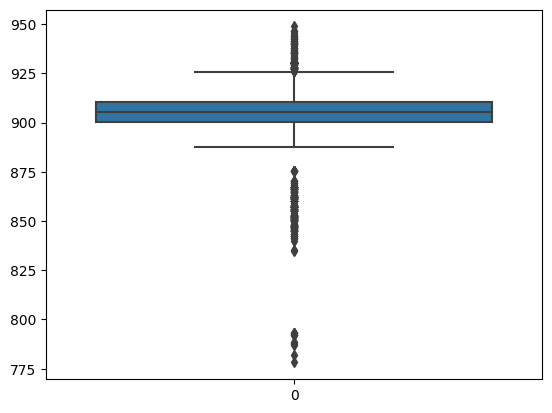

In [20]:
sns.boxplot(dataset['CA_Fan_RPM'])


<Axes: >

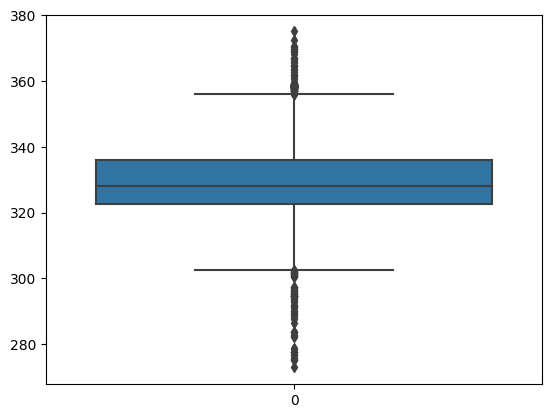

In [21]:
sns.boxplot(dataset['CA_Fan_KW'])


<Axes: >

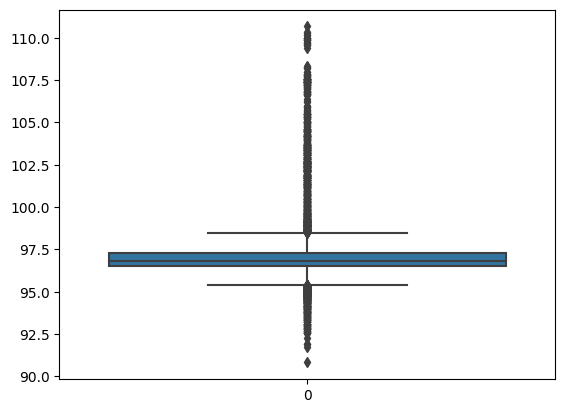

In [22]:
sns.boxplot(dataset['Mill_Folaphone'])


<Axes: >

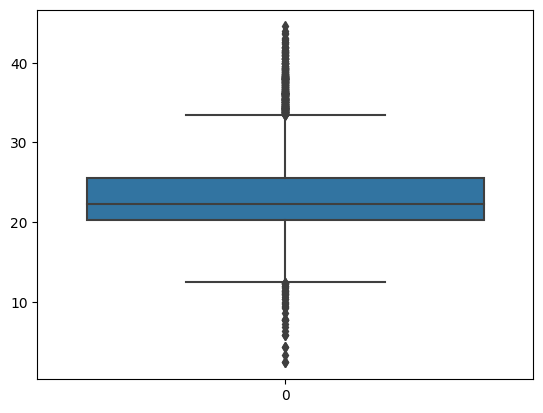

In [23]:
sns.boxplot(dataset['Mill_Inlet_Draft'])


<Axes: >

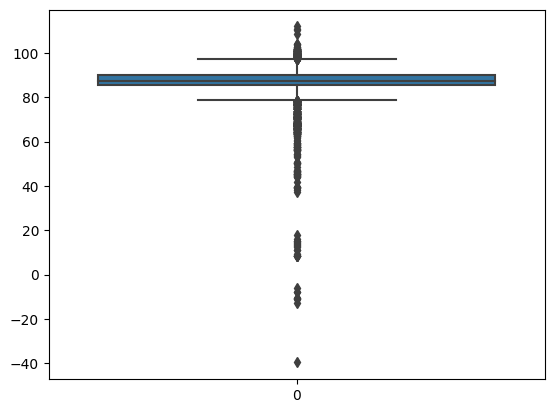

In [24]:
sns.boxplot(dataset['Mill_Outlet_Draft'])


<Axes: >

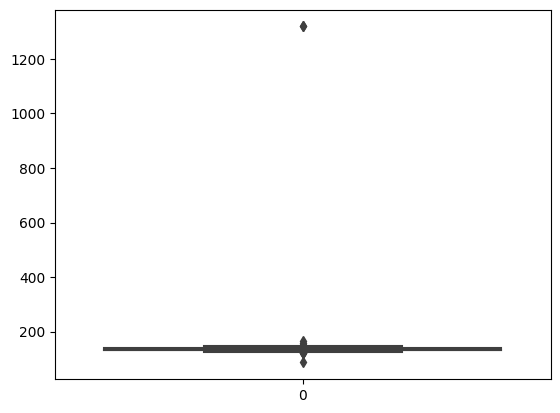

In [25]:
sns.boxplot(dataset['Sep_Vent_Inlet_Draft'])


<Axes: >

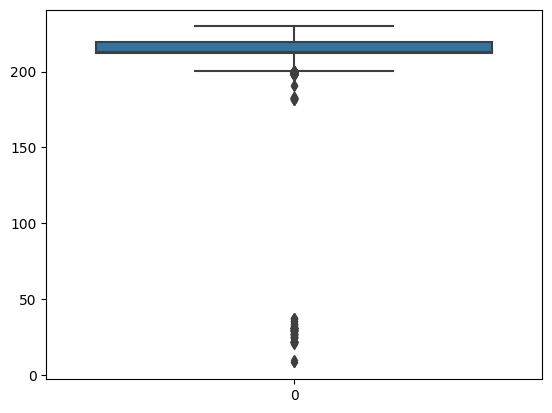

In [26]:
sns.boxplot(dataset['Sep_Vent_Outlet_Draft'])


<Axes: >

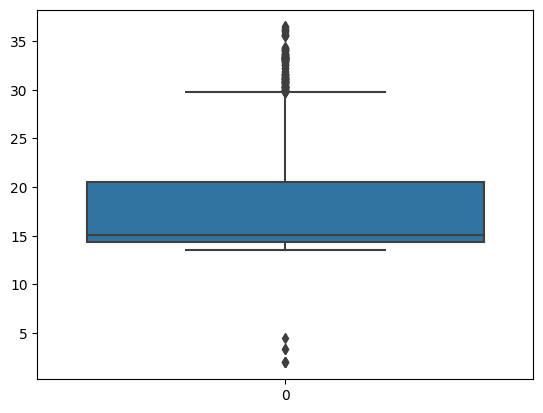

In [27]:
sns.boxplot(dataset['Sep_Vent_bag_filter_fan_kw'])


<Axes: >

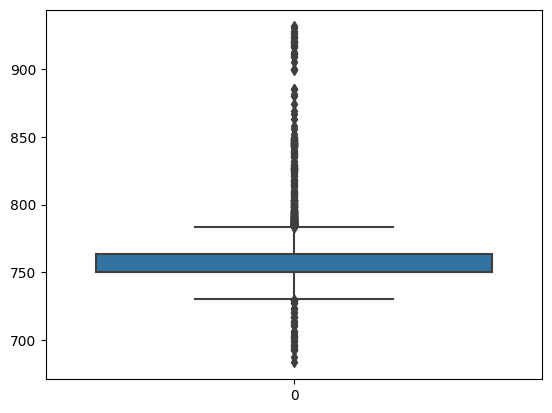

In [28]:
sns.boxplot(dataset['Sep_Vent_bag_filter_fan_rpm'])


<Axes: >

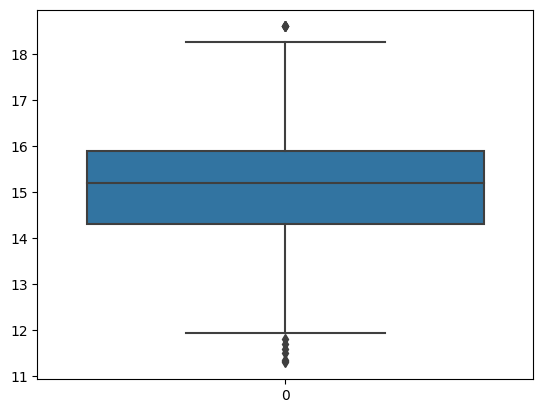

In [29]:
sns.boxplot(dataset['Residue'])


<Axes: >

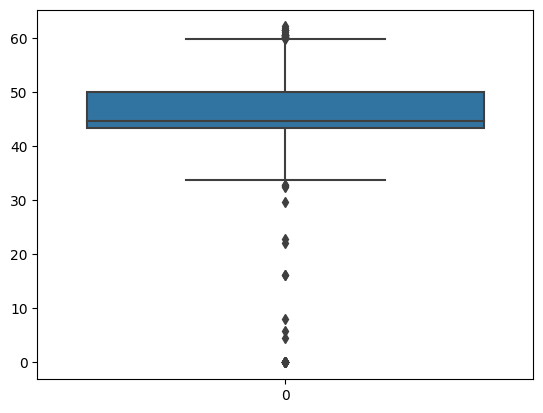

In [30]:
sns.boxplot(dataset['Mill_Vent_Fan_KW'])


<Axes: >

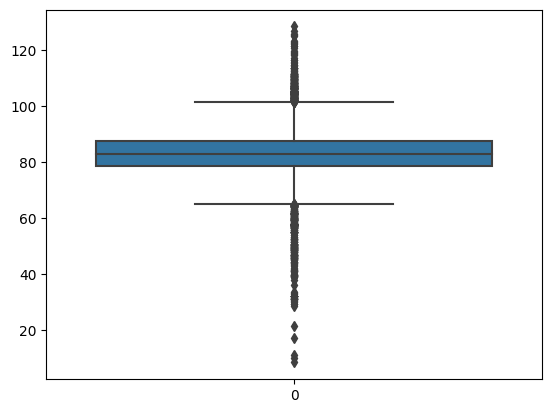

In [31]:
sns.boxplot(dataset['Mill_Vent_BF_Inlet_Draft'])


<Axes: >

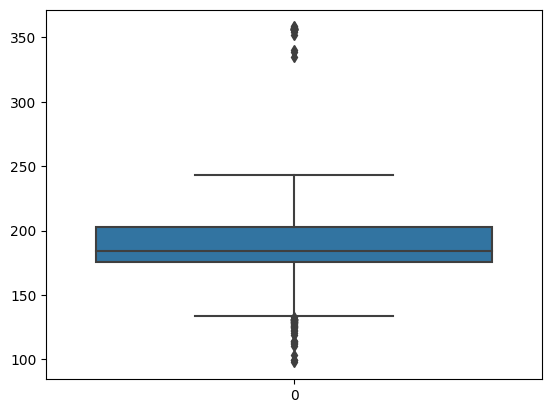

In [32]:
sns.boxplot(dataset['Mill_Vent_BF_Outlet_Draft'])


<Axes: >

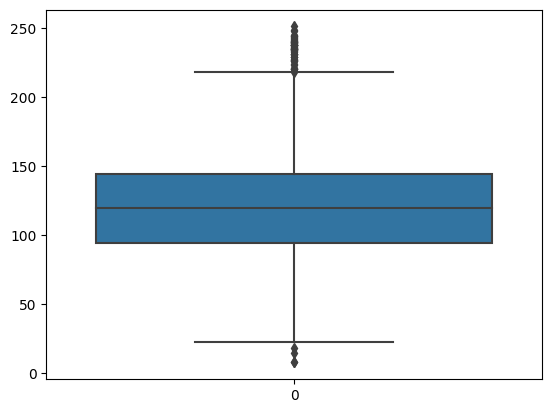

In [33]:
sns.boxplot(dataset['Reject'])


<Axes: >

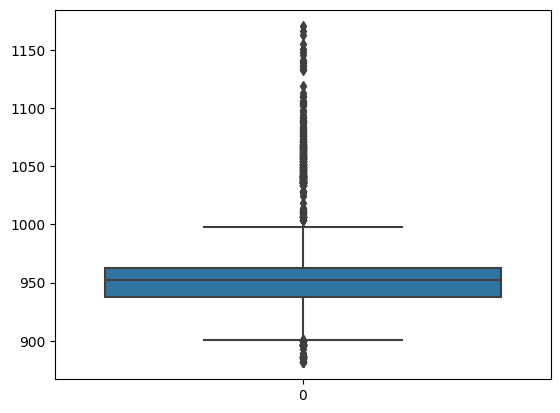

In [34]:
sns.boxplot(dataset['Sep_RPM'])


<Axes: >

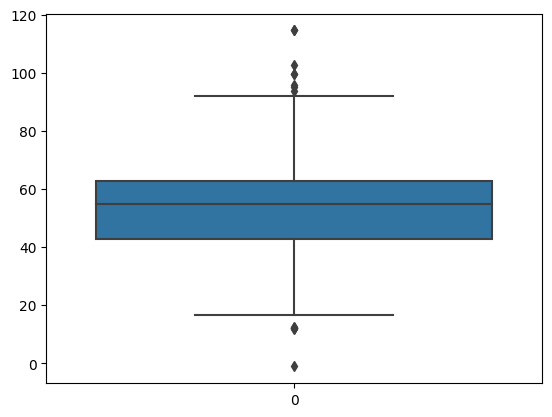

In [35]:
sns.boxplot(dataset['Sep_KW'])


<Axes: >

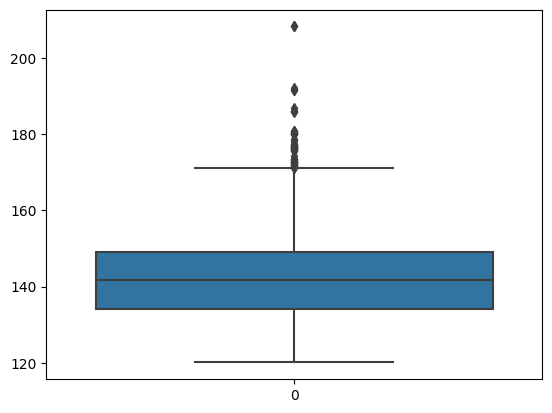

In [36]:
sns.boxplot(dataset['Sep_Amp'])


## Removing Outlier using IQR method

<Axes: >

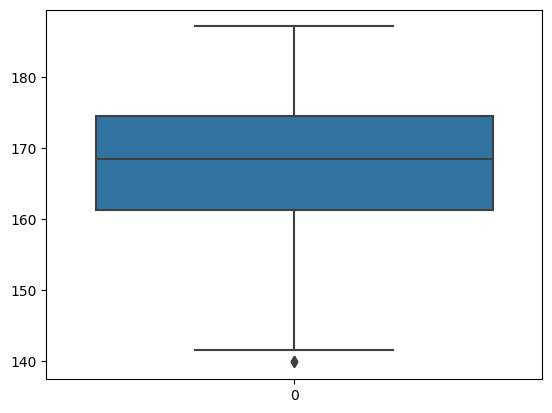

In [37]:
''' Detection '''
# IQR
# Calculate the upper and lower limits
Q1 = dataset['Mill_TPH'].quantile(0.25)
Q3 = dataset['Mill_TPH'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR
 
# Create arrays of Boolean values indicating the outlier rows
upper_array = np.where(dataset['Mill_TPH'] >= upper)[0]
lower_array = np.where(dataset['Mill_TPH'] <= lower)[0]
 
# Removing the outliers
dataset.drop(index=upper_array, inplace=True)
dataset.drop(index=lower_array, inplace=True)
 
    


sns.boxplot(dataset['Mill_TPH'])

<Axes: >

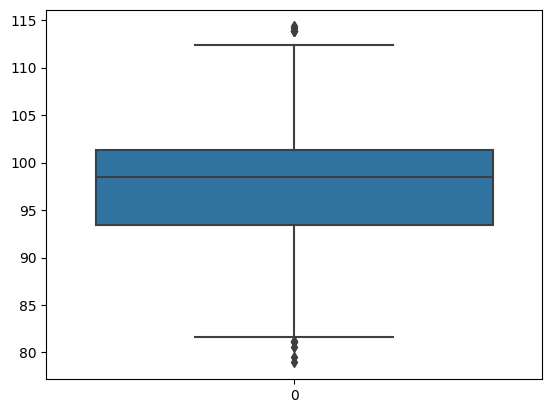

In [38]:
''' Detection '''
# IQR
# Calculate the upper and lower limits
Q1 = dataset['Clinker_TPH'].quantile(0.25)
Q3 = dataset['Clinker_TPH'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR
 
# Create arrays of Boolean values indicating the outlier rows
upper_array = np.where(dataset['Clinker_TPH'] >= upper)[0]
lower_array = np.where(dataset['Clinker_TPH'] <= lower)[0]
 
# Removing the outliers
dataset.drop(index=upper_array, inplace=True)
dataset.drop(index=lower_array, inplace=True)

sns.boxplot(dataset['Clinker_TPH'])

<Axes: >

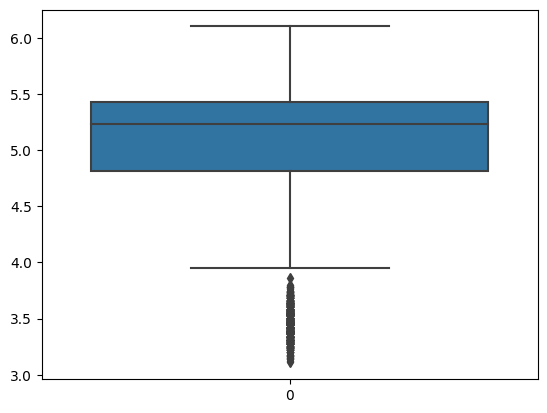

In [39]:
''' Detection '''
# IQR
# Calculate the upper and lower limits
Q1 = dataset['Gypsum_TPH'].quantile(0.25)
Q3 = dataset['Gypsum_TPH'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR
 
# Create arrays of Boolean values indicating the outlier rows
upper_array = np.where(dataset['Gypsum_TPH'] >= upper)[0]
lower_array = np.where(dataset['Gypsum_TPH'] <= lower)[0]
 
outliers = np.where((dataset['Gypsum_TPH'] >= upper) | (dataset['Gypsum_TPH'] <= lower))[0]

# Handle potential non-existent indices with `try-except`
try:
    dataset.drop(index=outliers, inplace=True)
except KeyError:
    print("Warning: Some outliers might not exist in the dataset.")


sns.boxplot(dataset['Gypsum_TPH'])

<Axes: >

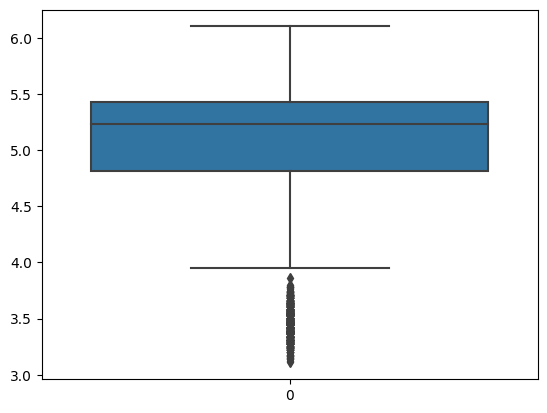

In [40]:
sns.boxplot(dataset['Gypsum_TPH'])

<Axes: >

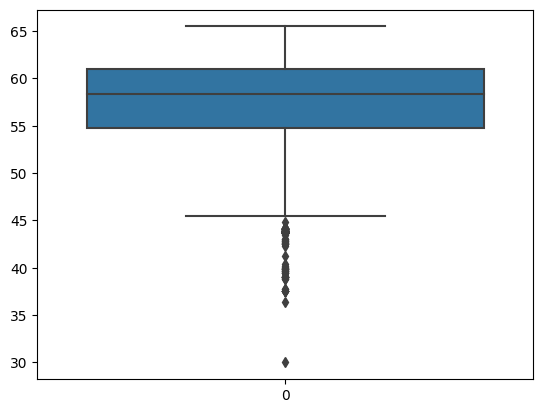

In [41]:
''' Detection '''
# IQR
# Calculate the upper and lower limits
Q1 = dataset['DFA_TPH'].quantile(0.25)
Q3 = dataset['DFA_TPH'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR
 
# Create arrays of Boolean values indicating the outlier rows
upper_array = np.where(dataset['DFA_TPH'] >= upper)[0]
lower_array = np.where(dataset['DFA_TPH'] <= lower)[0]
 
outliers = np.where((dataset['DFA_TPH'] >= upper) | (dataset['DFA_TPH'] <= lower))[0]

# Handle potential non-existent indices with `try-except`
try:
    dataset.drop(index=outliers, inplace=True)
except KeyError:
    print("Warning: Some outliers might not exist in the dataset.")

sns.boxplot(dataset['DFA_TPH'])

<Axes: >

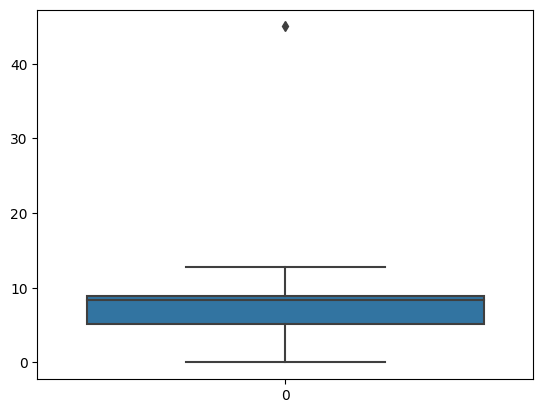

In [42]:
''' Detection '''
# IQR
# Calculate the upper and lower limits
Q1 = dataset['WFA_TPH'].quantile(0.25)
Q3 = dataset['WFA_TPH'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR
 
# Create arrays of Boolean values indicating the outlier rows
upper_array = np.where(dataset['WFA_TPH'] >= upper)[0]
lower_array = np.where(dataset['WFA_TPH'] <= lower)[0]
 
outliers = np.where((dataset['WFA_TPH'] >= upper) | (dataset['WFA_TPH'] <= lower))[0]

# Handle potential non-existent indices with `try-except`
try:
    dataset.drop(index=outliers, inplace=True)
except KeyError:
    print("Warning: Some outliers might not exist in the dataset.")


sns.boxplot(dataset['WFA_TPH'])

<Axes: >

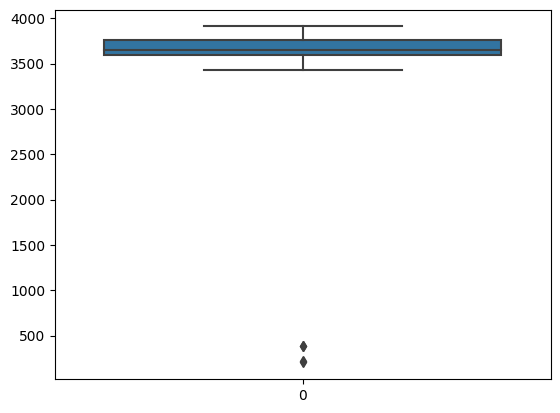

In [43]:
''' Detection '''
# IQR
# Calculate the upper and lower limits
Q1 = dataset['Mill_KW'].quantile(0.25)
Q3 = dataset['Mill_KW'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR
 
# Create arrays of Boolean values indicating the outlier rows
upper_array = np.where(dataset['Mill_KW'] >= upper)[0]
lower_array = np.where(dataset['Mill_KW'] <= lower)[0]
 
outliers = np.where((dataset['Mill_KW'] >= upper) | (dataset['Mill_KW'] <= lower))[0]

# Handle potential non-existent indices with `try-except`
try:
    dataset.drop(index=outliers, inplace=True)
except KeyError:
    print("Warning: Some outliers might not exist in the dataset.")

sns.boxplot(dataset['Mill_KW'])

<Axes: >

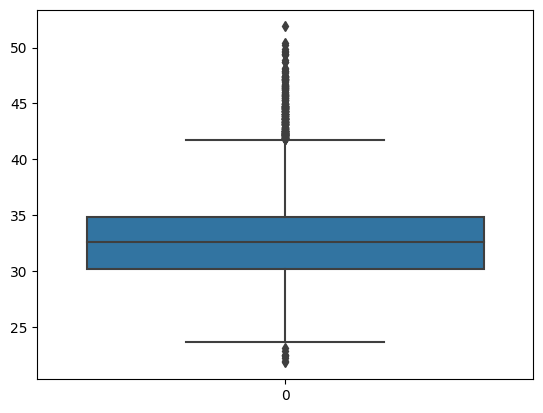

In [44]:
''' Detection '''
# IQR
# Calculate the upper and lower limits
Q1 = dataset['Mill_Inlet_Temp'].quantile(0.25)
Q3 = dataset['Mill_Inlet_Temp'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR
 
# Create arrays of Boolean values indicating the outlier rows
upper_array = np.where(dataset['Mill_Inlet_Temp'] >= upper)[0]
lower_array = np.where(dataset['Mill_Inlet_Temp'] <= lower)[0]

outliers = np.where((dataset['Mill_Inlet_Temp'] >= upper) | (dataset['Mill_Inlet_Temp'] <= lower))[0]

# Handle potential non-existent indices with `try-except`
try:
    dataset.drop(index=outliers, inplace=True)
except KeyError:
    print("Warning: Some outliers might not exist in the dataset.")
 

sns.boxplot(dataset['Mill_Inlet_Temp'])

<Axes: >

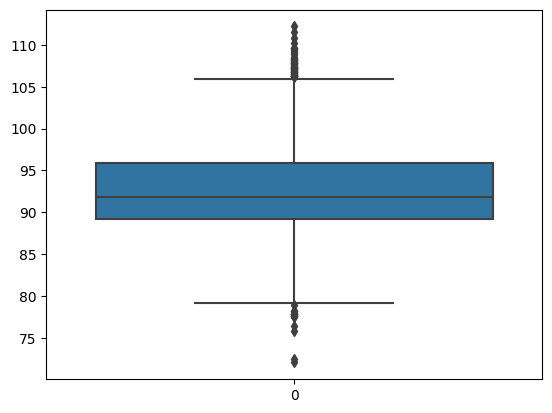

In [45]:
''' Detection '''
# IQR
# Calculate the upper and lower limits
Q1 = dataset['Mill_Outlet_Temp'].quantile(0.25)
Q3 = dataset['Mill_Outlet_Temp'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR
 
# Create arrays of Boolean values indicating the outlier rows
upper_array = np.where(dataset['Mill_Outlet_Temp'] >= upper)[0]
lower_array = np.where(dataset['Mill_Outlet_Temp'] <= lower)[0]
 
outliers = np.where((dataset['Mill_Outlet_Temp'] >= upper) | (dataset['Mill_Outlet_Temp'] <= lower))[0]

# Handle potential non-existent indices with `try-except`
try:
    dataset.drop(index=outliers, inplace=True)
except KeyError:
    print("Warning: Some outliers might not exist in the dataset.")


sns.boxplot(dataset['Mill_Outlet_Temp'])

<Axes: >

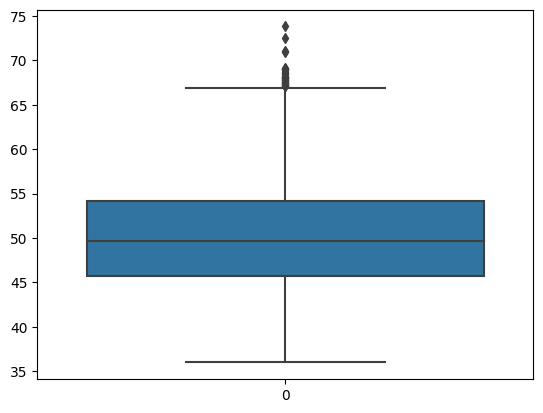

In [46]:
''' Detection '''
# IQR
# Calculate the upper and lower limits
Q1 = dataset['Mill_Outlet_BE_Amp'].quantile(0.25)
Q3 = dataset['Mill_Outlet_BE_Amp'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR
 
# Create arrays of Boolean values indicating the outlier rows
upper_array = np.where(dataset['Mill_Outlet_BE_Amp'] >= upper)[0]
lower_array = np.where(dataset['Mill_Outlet_BE_Amp'] <= lower)[0]
 
outliers = np.where((dataset['Mill_Outlet_BE_Amp'] >= upper) | (dataset['Mill_Outlet_BE_Amp'] <= lower))[0]

# Handle potential non-existent indices with `try-except`
try:
    dataset.drop(index=outliers, inplace=True)
except KeyError:
    print("Warning: Some outliers might not exist in the dataset.")
    

sns.boxplot(dataset['Mill_Outlet_BE_Amp'])

<Axes: >

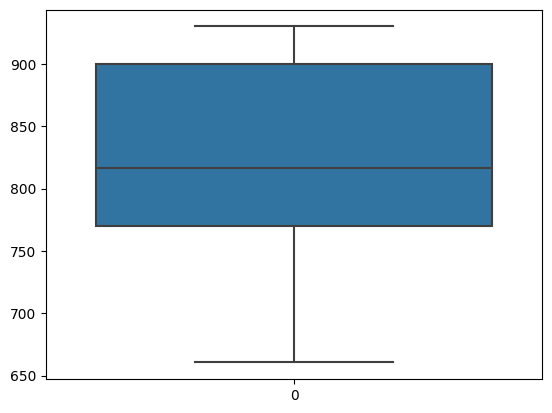

In [47]:
''' Detection '''
# IQR
# Calculate the upper and lower limits
Q1 = dataset['Mill_Vent_Fan_RPM'].quantile(0.25)
Q3 = dataset['Mill_Vent_Fan_RPM'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR
 
# Create arrays of Boolean values indicating the outlier rows
upper_array = np.where(dataset['Mill_Vent_Fan_RPM'] >= upper)[0]
lower_array = np.where(dataset['Mill_Vent_Fan_RPM'] <= lower)[0]
 
outliers = np.where((dataset['Mill_Vent_Fan_RPM'] >= upper) | (dataset['Mill_Vent_Fan_RPM'] <= lower))[0]

# Handle potential non-existent indices with `try-except`
try:
    dataset.drop(index=outliers, inplace=True)
except KeyError:
    print("Warning: Some outliers might not exist in the dataset.")
 

sns.boxplot(dataset['Mill_Vent_Fan_RPM'])

<Axes: >

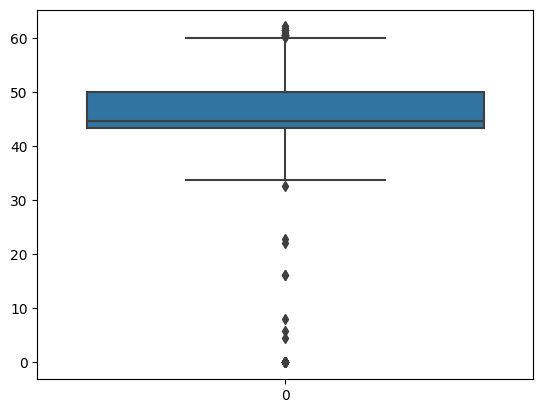

In [48]:
''' Detection '''
# IQR
# Calculate the upper and lower limits
Q1 = dataset['Mill_Vent_Fan_KW'].quantile(0.25)
Q3 = dataset['Mill_Vent_Fan_KW'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR
 
# Create arrays of Boolean values indicating the outlier rows
upper_array = np.where(dataset['Mill_Vent_Fan_KW'] >= upper)[0]
lower_array = np.where(dataset['Mill_Vent_Fan_KW'] <= lower)[0]
 
outliers = np.where((dataset['Mill_Vent_Fan_KW'] >= upper) | (dataset['Mill_Vent_Fan_KW'] <= lower))[0]

# Handle potential non-existent indices with `try-except`
try:
    dataset.drop(index=outliers, inplace=True)
except KeyError:
    print("Warning: Some outliers might not exist in the dataset.")
 

sns.boxplot(dataset['Mill_Vent_Fan_KW'])

<Axes: >

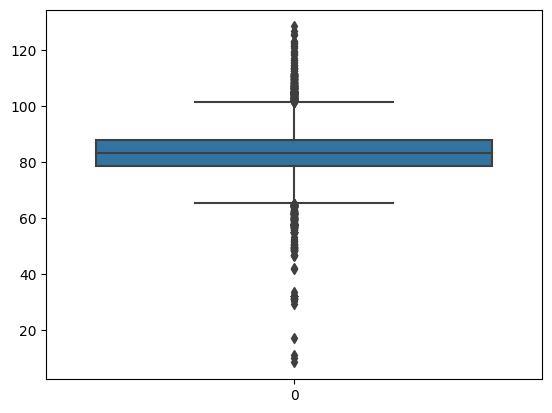

In [49]:
''' Detection '''
# IQR
# Calculate the upper and lower limits
Q1 = dataset['Mill_Vent_BF_Inlet_Draft'].quantile(0.25)
Q3 = dataset['Mill_Vent_BF_Inlet_Draft'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR
 
# Create arrays of Boolean values indicating the outlier rows
upper_array = np.where(dataset['Mill_Vent_BF_Inlet_Draft'] >= upper)[0]
lower_array = np.where(dataset['Mill_Vent_BF_Inlet_Draft'] <= lower)[0]
 
outliers = np.where((dataset['Mill_Vent_BF_Inlet_Draft'] >= upper) | (dataset['Mill_Vent_BF_Inlet_Draft'] <= lower))[0]

# Handle potential non-existent indices with `try-except`
try:
    dataset.drop(index=outliers, inplace=True)
except KeyError:
    print("Warning: Some outliers might not exist in the dataset.")


sns.boxplot(dataset['Mill_Vent_BF_Inlet_Draft'])

<Axes: >

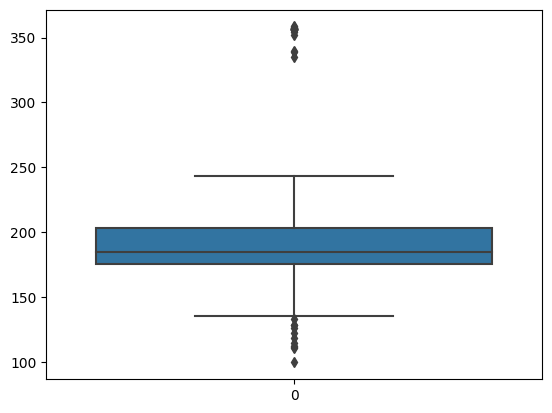

In [50]:
''' Detection '''
# IQR
# Calculate the upper and lower limits
Q1 = dataset['Mill_Vent_BF_Outlet_Draft'].quantile(0.25)
Q3 = dataset['Mill_Vent_BF_Outlet_Draft'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR
 
# Create arrays of Boolean values indicating the outlier rows
upper_array = np.where(dataset['Mill_Vent_BF_Outlet_Draft'] >= upper)[0]
lower_array = np.where(dataset['Mill_Vent_BF_Outlet_Draft'] <= lower)[0]
 
outliers = np.where((dataset['Mill_Vent_BF_Outlet_Draft'] >= upper) | (dataset['Mill_Vent_BF_Outlet_Draft'] <= lower))[0]

# Handle potential non-existent indices with `try-except`
try:
    dataset.drop(index=outliers, inplace=True)
except KeyError:
    print("Warning: Some outliers might not exist in the dataset.")

sns.boxplot(dataset['Mill_Vent_BF_Outlet_Draft'])

<Axes: >

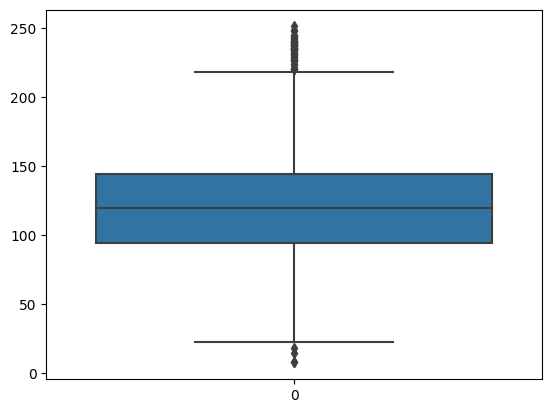

In [51]:
''' Detection '''
# IQR
# Calculate the upper and lower limits
Q1 = dataset['Reject'].quantile(0.25)
Q3 = dataset['Reject'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR
 
# Create arrays of Boolean values indicating the outlier rows
upper_array = np.where(dataset['Reject'] >= upper)[0]
lower_array = np.where(dataset['Reject'] <= lower)[0]
 
outliers = np.where((dataset['Reject'] >= upper) | (dataset['Reject'] <= lower))[0]

# Handle potential non-existent indices with `try-except`
try:
    dataset.drop(index=outliers, inplace=True)
except KeyError:
    print("Warning: Some outliers might not exist in the dataset.")

sns.boxplot(dataset['Reject'])

<Axes: >

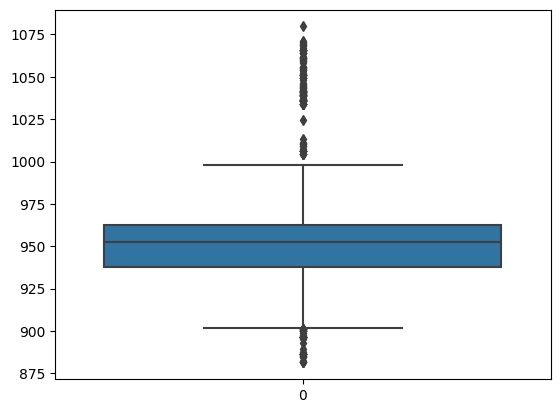

In [52]:
''' Detection '''
# IQR
# Calculate the upper and lower limits
Q1 = dataset['Sep_RPM'].quantile(0.25)
Q3 = dataset['Sep_RPM'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR
 
# Create arrays of Boolean values indicating the outlier rows
upper_array = np.where(dataset['Sep_RPM'] >= upper)[0]
lower_array = np.where(dataset['Sep_RPM'] <= lower)[0]
 
outliers = np.where((dataset['Sep_RPM'] >= upper) | (dataset['Sep_RPM'] <= lower))[0]

# Handle potential non-existent indices with `try-except`
try:
    dataset.drop(index=outliers, inplace=True)
except KeyError:
    print("Warning: Some outliers might not exist in the dataset.")

sns.boxplot(dataset['Sep_RPM'])

<Axes: >

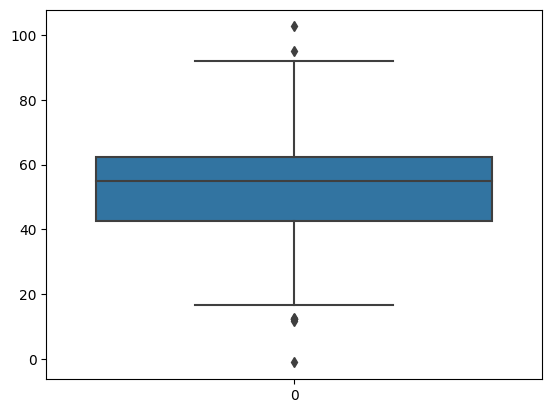

In [53]:
''' Detection '''
# IQR
# Calculate the upper and lower limits
Q1 = dataset['Sep_KW'].quantile(0.25)
Q3 = dataset['Sep_KW'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR
 
# Create arrays of Boolean values indicating the outlier rows
upper_array = np.where(dataset['Sep_KW'] >= upper)[0]
lower_array = np.where(dataset['Sep_KW'] <= lower)[0]
 
outliers = np.where((dataset['Sep_KW'] >= upper) | (dataset['Sep_KW'] <= lower))[0]

# Handle potential non-existent indices with `try-except`
try:
    dataset.drop(index=outliers, inplace=True)
except KeyError:
    print("Warning: Some outliers might not exist in the dataset.")

sns.boxplot(dataset['Sep_KW'])

<Axes: >

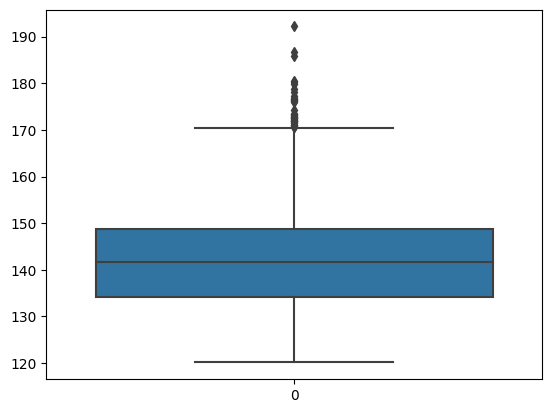

In [54]:
''' Detection '''
# IQR
# Calculate the upper and lower limits
Q1 = dataset['Sep_Amp'].quantile(0.25)
Q3 = dataset['Sep_Amp'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR
 
# Create arrays of Boolean values indicating the outlier rows
upper_array = np.where(dataset['Sep_Amp'] >= upper)[0]
lower_array = np.where(dataset['Sep_Amp'] <= lower)[0]
 
outliers = np.where((dataset['Sep_Amp'] >= upper) | (dataset['Sep_Amp'] <= lower))[0]

# Handle potential non-existent indices with `try-except`
try:
    dataset.drop(index=outliers, inplace=True)
except KeyError:
    print("Warning: Some outliers might not exist in the dataset.")

sns.boxplot(dataset['Sep_Amp'])

<Axes: >

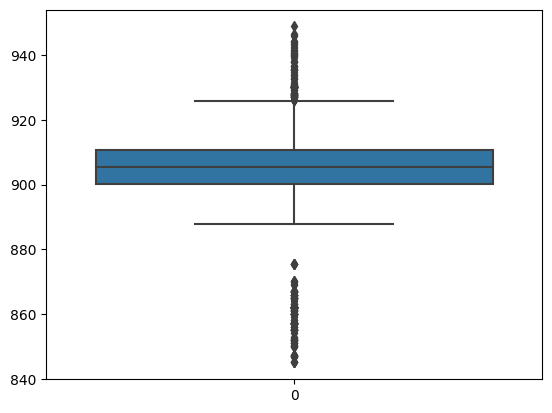

In [55]:
''' Detection '''
# IQR
# Calculate the upper and lower limits
Q1 = dataset['CA_Fan_RPM'].quantile(0.25)
Q3 = dataset['CA_Fan_RPM'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR
 
# Create arrays of Boolean values indicating the outlier rows
upper_array = np.where(dataset['CA_Fan_RPM'] >= upper)[0]
lower_array = np.where(dataset['CA_Fan_RPM'] <= lower)[0]
 
outliers = np.where((dataset['CA_Fan_RPM'] >= upper) | (dataset['CA_Fan_RPM'] <= lower))[0]

# Handle potential non-existent indices with `try-except`
try:
    dataset.drop(index=outliers, inplace=True)
except KeyError:
    print("Warning: Some outliers might not exist in the dataset.")

sns.boxplot(dataset['CA_Fan_RPM'])

<Axes: >

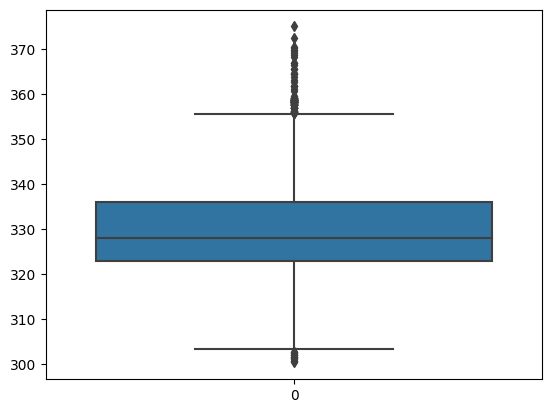

In [56]:
''' Detection '''
# IQR
# Calculate the upper and lower limits
Q1 = dataset['CA_Fan_KW'].quantile(0.25)
Q3 = dataset['CA_Fan_KW'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR
 
# Create arrays of Boolean values indicating the outlier rows
upper_array = np.where(dataset['CA_Fan_KW'] >= upper)[0]
lower_array = np.where(dataset['CA_Fan_KW'] <= lower)[0]
 
outliers = np.where((dataset['CA_Fan_KW'] >= upper) | (dataset['CA_Fan_KW'] <= lower))[0]

# Handle potential non-existent indices with `try-except`
try:
    dataset.drop(index=outliers, inplace=True)
except KeyError:
    print("Warning: Some outliers might not exist in the dataset.")

sns.boxplot(dataset['CA_Fan_KW'])

<Axes: >

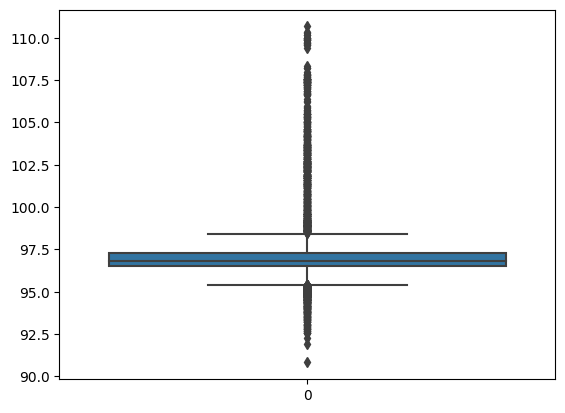

In [57]:
''' Detection '''
# IQR
# Calculate the upper and lower limits
Q1 = dataset['Mill_Folaphone'].quantile(0.25)
Q3 = dataset['Mill_Folaphone'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR
 
# Create arrays of Boolean values indicating the outlier rows
upper_array = np.where(dataset['Mill_Folaphone'] >= upper)[0]
lower_array = np.where(dataset['Mill_Folaphone'] <= lower)[0]
 
outliers = np.where((dataset['Mill_Folaphone'] >= upper) | (dataset['Mill_Folaphone'] <= lower))[0]

# Handle potential non-existent indices with `try-except`
try:
    dataset.drop(index=outliers, inplace=True)
except KeyError:
    print("Warning: Some outliers might not exist in the dataset.")

sns.boxplot(dataset['Mill_Folaphone'])

<Axes: >

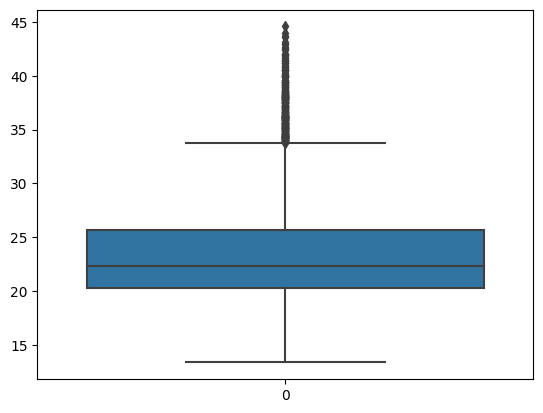

In [58]:
''' Detection '''
# IQR
# Calculate the upper and lower limits
Q1 = dataset['Mill_Inlet_Draft'].quantile(0.25)
Q3 = dataset['Mill_Inlet_Draft'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR
 
# Create arrays of Boolean values indicating the outlier rows
upper_array = np.where(dataset['Mill_Inlet_Draft'] >= upper)[0]
lower_array = np.where(dataset['Mill_Inlet_Draft'] <= lower)[0]
 
outliers = np.where((dataset['Mill_Inlet_Draft'] >= upper) | (dataset['Mill_Inlet_Draft'] <= lower))[0]

# Handle potential non-existent indices with `try-except`
try:
    dataset.drop(index=outliers, inplace=True)
except KeyError:
    print("Warning: Some outliers might not exist in the dataset.")

sns.boxplot(dataset['Mill_Inlet_Draft'])

<Axes: >

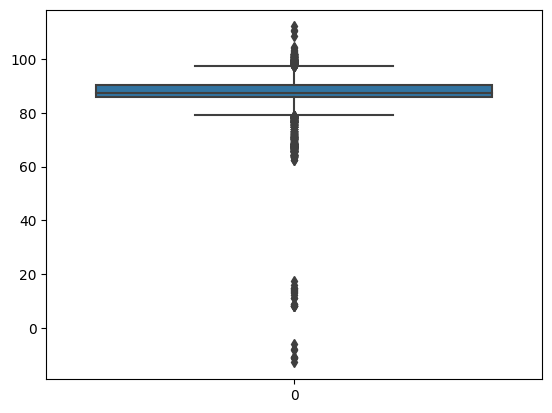

In [59]:
''' Detection '''
# IQR
# Calculate the upper and lower limits
Q1 = dataset['Mill_Outlet_Draft'].quantile(0.25)
Q3 = dataset['Mill_Outlet_Draft'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR
 
# Create arrays of Boolean values indicating the outlier rows
upper_array = np.where(dataset['Mill_Outlet_Draft'] >= upper)[0]
lower_array = np.where(dataset['Mill_Outlet_Draft'] <= lower)[0]
 
outliers = np.where((dataset['Mill_Outlet_Draft'] >= upper) | (dataset['Mill_Outlet_Draft'] <= lower))[0]

# Handle potential non-existent indices with `try-except`
try:
    dataset.drop(index=outliers, inplace=True)
except KeyError:
    print("Warning: Some outliers might not exist in the dataset.")

sns.boxplot(dataset['Mill_Outlet_Draft'])

<Axes: >

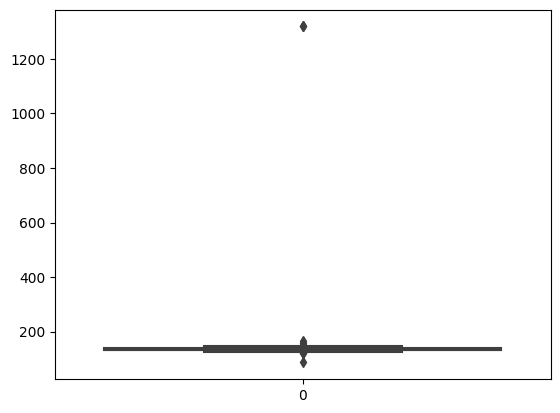

In [60]:
''' Detection '''
# IQR
# Calculate the upper and lower limits
Q1 = dataset['Sep_Vent_Inlet_Draft'].quantile(0.25)
Q3 = dataset['Sep_Vent_Inlet_Draft'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR
 
# Create arrays of Boolean values indicating the outlier rows
upper_array = np.where(dataset['Sep_Vent_Inlet_Draft'] >= upper)[0]
lower_array = np.where(dataset['Sep_Vent_Inlet_Draft'] <= lower)[0]
 
outliers = np.where((dataset['Sep_Vent_Inlet_Draft'] >= upper) | (dataset['Sep_Vent_Inlet_Draft'] <= lower))[0]

# Handle potential non-existent indices with `try-except`
try:
    dataset.drop(index=outliers, inplace=True)
except KeyError:
    print("Warning: Some outliers might not exist in the dataset.")

sns.boxplot(dataset['Sep_Vent_Inlet_Draft'])

<Axes: >

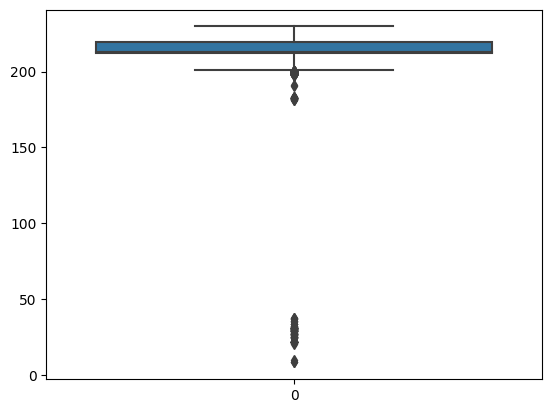

In [61]:
''' Detection '''
# IQR
# Calculate the upper and lower limits
Q1 = dataset['Sep_Vent_Outlet_Draft'].quantile(0.25)
Q3 = dataset['Sep_Vent_Outlet_Draft'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR
 
# Create arrays of Boolean values indicating the outlier rows
upper_array = np.where(dataset['Sep_Vent_Outlet_Draft'] >= upper)[0]
lower_array = np.where(dataset['Sep_Vent_Outlet_Draft'] <= lower)[0]
 
outliers = np.where((dataset['Sep_Vent_Outlet_Draft'] >= upper) | (dataset['Sep_Vent_Outlet_Draft'] <= lower))[0]

# Handle potential non-existent indices with `try-except`
try:
    dataset.drop(index=outliers, inplace=True)
except KeyError:
    print("Warning: Some outliers might not exist in the dataset.")

sns.boxplot(dataset['Sep_Vent_Outlet_Draft'])

<Axes: >

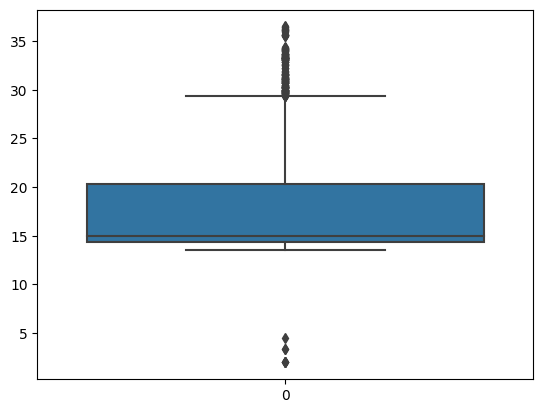

In [62]:
''' Detection '''
# IQR
# Calculate the upper and lower limits
Q1 = dataset['Sep_Vent_bag_filter_fan_kw'].quantile(0.25)
Q3 = dataset['Sep_Vent_bag_filter_fan_kw'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR
 
# Create arrays of Boolean values indicating the outlier rows
upper_array = np.where(dataset['Sep_Vent_bag_filter_fan_kw'] >= upper)[0]
lower_array = np.where(dataset['Sep_Vent_bag_filter_fan_kw'] <= lower)[0]
 
outliers = np.where((dataset['Sep_Vent_bag_filter_fan_kw'] >= upper) | (dataset['Sep_Vent_bag_filter_fan_kw'] <= lower))[0]

# Handle potential non-existent indices with `try-except`
try:
    dataset.drop(index=outliers, inplace=True)
except KeyError:
    print("Warning: Some outliers might not exist in the dataset.")

sns.boxplot(dataset['Sep_Vent_bag_filter_fan_kw'])

<Axes: >

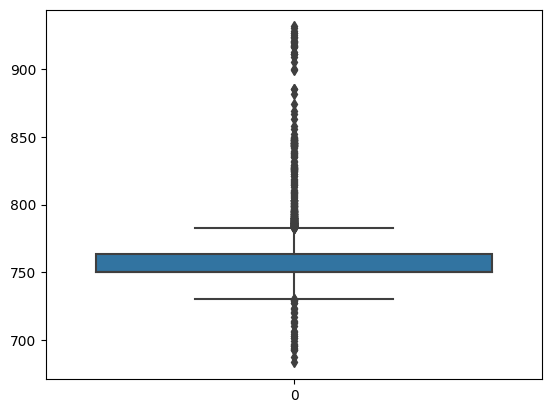

In [63]:
''' Detection '''
# IQR
# Calculate the upper and lower limits
Q1 = dataset['Sep_Vent_bag_filter_fan_rpm'].quantile(0.25)
Q3 = dataset['Sep_Vent_bag_filter_fan_rpm'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR
 
# Create arrays of Boolean values indicating the outlier rows
upper_array = np.where(dataset['Sep_Vent_bag_filter_fan_rpm'] >= upper)[0]
lower_array = np.where(dataset['Sep_Vent_bag_filter_fan_rpm'] <= lower)[0]
 
outliers = np.where((dataset['Sep_Vent_bag_filter_fan_rpm'] >= upper) | (dataset['Sep_Vent_bag_filter_fan_rpm'] <= lower))[0]

# Handle potential non-existent indices with `try-except`
try:
    dataset.drop(index=outliers, inplace=True)
except KeyError:
    print("Warning: Some outliers might not exist in the dataset.")

sns.boxplot(dataset['Sep_Vent_bag_filter_fan_rpm'])

<Axes: >

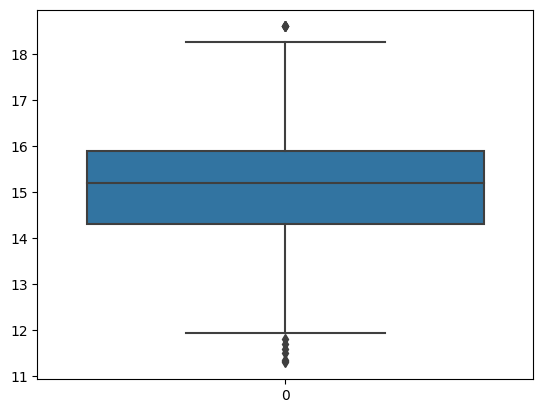

In [64]:
''' Detection '''
# IQR
# Calculate the upper and lower limits
Q1 = dataset['Residue'].quantile(0.25)
Q3 = dataset['Residue'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR
 
# Create arrays of Boolean values indicating the outlier rows
upper_array = np.where(dataset['Residue'] >= upper)[0]
lower_array = np.where(dataset['Residue'] <= lower)[0]
 
outliers = np.where((dataset['Residue'] >= upper) | (dataset['Residue'] <= lower))[0]

# Handle potential non-existent indices with `try-except`
try:
    dataset.drop(index=outliers, inplace=True)
except KeyError:
    print("Warning: Some outliers might not exist in the dataset.")

sns.boxplot(dataset['Residue'])

## Measures of Central Tendency / First moment business decision

### Mean 

In [65]:
dataset.Mill_TPH.mean()

167.2663140060241

In [66]:
dataset.Clinker_TPH.mean()

97.4202936746988

In [67]:
dataset.Gypsum_TPH.mean()

4.992650602409638

In [68]:
dataset.DFA_TPH.mean()

57.45147590361446

In [69]:
dataset.WFA_TPH.mean()

7.412437876506023

In [70]:
dataset.Mill_KW.mean()

3669.367733433735

In [71]:
dataset.Mill_Inlet_Temp.mean()

33.19896084337349

In [72]:
dataset.Mill_Outlet_Temp.mean()

92.17875188253011

In [73]:
dataset.Mill_Outlet_BE_Amp.mean()

50.292761671686755

In [74]:
dataset.Mill_Vent_Fan_RPM.mean()

830.3023155120483

In [75]:
dataset.Mill_Vent_Fan_KW.mean()

46.11230233433735

In [76]:
dataset.Mill_Vent_BF_Inlet_Draft.mean()

83.56445594879519

In [77]:
dataset.Mill_Vent_BF_Outlet_Draft.mean()

188.94213102409637

In [78]:
dataset.Reject.mean()

120.4365455572289

In [79]:
dataset.Sep_RPM.mean()

949.3781777108434

In [80]:
dataset.Sep_KW.mean()

53.12457454819277

In [81]:
dataset.Sep_Amp.mean()

142.00226656626506

In [82]:
dataset.CA_Fan_RPM.mean()

904.7164043674699

In [83]:
dataset.CA_Fan_KW.mean()

329.3736031626506

In [84]:
dataset.Mill_Folaphone.mean()

97.40296874999999

In [85]:
dataset.Mill_Inlet_Draft.mean()

23.73625376506024

In [86]:
dataset.Mill_Outlet_Draft.mean()

87.19034450301204

In [87]:
dataset.Sep_Vent_Inlet_Draft.mean()

136.24881400602408

In [88]:
dataset.Sep_Vent_Outlet_Draft.mean()

209.32814947289154

In [89]:
dataset.Sep_Vent_bag_filter_fan_kw.mean()

17.697125376506026

In [90]:
dataset.Sep_Vent_bag_filter_fan_rpm.mean()

758.3005289909639

In [91]:
dataset.Residue.mean()

15.191466490963856

### Median


In [92]:
dataset.Mill_TPH.median()

168.55

In [93]:
dataset.Clinker_TPH.median()

98.50999999999999

In [94]:
dataset.Gypsum_TPH.median()

5.23

In [95]:
dataset.DFA_TPH.median()

58.35

In [96]:
dataset.WFA_TPH.median()

8.37

In [97]:
dataset.Mill_KW.median()

3649.53

In [98]:
dataset.Mill_Inlet_Temp.median()

32.535

In [99]:
dataset.Mill_Outlet_Temp.median()

91.85

In [100]:
dataset.Mill_Outlet_BE_Amp.median()

49.644999999999996

In [101]:
dataset.Mill_Vent_Fan_RPM.median()

816.895

In [102]:
dataset.Mill_Vent_Fan_KW.median()

44.715

In [103]:
dataset.Mill_Vent_BF_Inlet_Draft.median()

83.35

In [104]:
dataset.Mill_Vent_BF_Outlet_Draft.median()

184.4

In [105]:
dataset.Reject.median()

119.62

In [106]:
dataset.Sep_RPM.median()

952.46

In [107]:
dataset.Sep_KW.median()

54.87

In [108]:
dataset.Sep_Amp.median()

141.61

In [109]:
dataset.CA_Fan_RPM.median()

905.31

In [110]:
dataset.CA_Fan_KW.median()

328.055

In [111]:
dataset.Mill_Folaphone.median()

96.8

In [112]:
dataset.Mill_Inlet_Draft.median()

22.3

In [113]:
dataset.Mill_Outlet_Draft.median()

87.5

In [114]:
dataset.Sep_Vent_Inlet_Draft.median()

134.26

In [115]:
dataset.Sep_Vent_Outlet_Draft.median()

212.7

In [116]:
dataset.Sep_Vent_bag_filter_fan_kw.median()

15.0

In [117]:
dataset.Sep_Vent_bag_filter_fan_rpm.median()

750.0

In [118]:
dataset.Residue.median()

15.2

## Measures of Dispersion / Second moment business decision


#### variance 

In [119]:
dataset.Mill_TPH.var()

79.65775161518341

In [120]:
dataset.Clinker_TPH.var()

29.840680689487343

In [121]:
dataset.Gypsum_TPH.var()

0.4311420597849881

In [122]:
dataset.DFA_TPH.var()

21.75390228373497

In [123]:
dataset.WFA_TPH.var()

3.8090578665975694

In [124]:
dataset.Mill_KW.var()

18325.825883168993

In [125]:
dataset.Mill_Inlet_Temp.var()

16.953283574440903

In [126]:
dataset.Mill_Outlet_Temp.var()

29.666075094140787

In [127]:
dataset.Mill_Outlet_BE_Amp.var()

33.596126640232725

In [128]:
dataset.Mill_Vent_Fan_RPM.var()

3470.6311810053326

In [129]:
dataset.Mill_Vent_Fan_KW.var()

36.86994576208853

In [130]:
dataset.Mill_Vent_BF_Inlet_Draft.var()

110.32816332662271

In [131]:
dataset.Mill_Vent_BF_Outlet_Draft.var()

428.35728410408785

In [132]:
dataset.Reject.var()

1472.3612003598182

In [133]:
dataset.Sep_RPM.var()

655.0247549915714

In [134]:
dataset.Sep_KW.var()

174.06300535463717

In [135]:
dataset.Sep_Amp.var()

96.1805602542919

In [136]:
dataset.CA_Fan_RPM.var()

138.03840631207316

In [137]:
dataset.CA_Fan_KW.var()

87.64229384964553

In [138]:
dataset.Mill_Folaphone.var()

5.819850250953221

In [139]:
dataset.Mill_Inlet_Draft.var()

24.44773327997067

In [140]:
dataset.Mill_Outlet_Draft.var()

70.97206282612704

In [141]:
dataset.Sep_Vent_Inlet_Draft.var()

543.7189679774735

In [142]:
dataset.Sep_Vent_Outlet_Draft.var()

1063.3066927714817

In [143]:
dataset.Sep_Vent_bag_filter_fan_kw.var()

23.81808785624159

In [144]:
dataset.Sep_Vent_bag_filter_fan_rpm.var()

384.95894042808237

In [145]:
dataset.Residue.var()

1.5143671014941522

#### standard deviation


In [146]:
dataset.Mill_TPH.std()

8.925119137310348

In [147]:
dataset.Clinker_TPH.std()

5.462662417675775

In [148]:
dataset.Gypsum_TPH.std()

0.6566140874097876

In [149]:
dataset.DFA_TPH.std()

4.6641078765113235

In [150]:
dataset.WFA_TPH.std()

1.9516807798914169

In [151]:
dataset.Mill_KW.std()

135.37291414152608

In [152]:
dataset.Mill_Inlet_Temp.std()

4.117436529497559

In [153]:
dataset.Mill_Outlet_Temp.std()

5.4466572403760445

In [154]:
dataset.Mill_Outlet_BE_Amp.std()

5.7962165798245255

In [155]:
dataset.Mill_Vent_Fan_RPM.std()

58.912063119579614

In [156]:
dataset.Mill_Vent_Fan_KW.std()

6.072062727120705

In [157]:
dataset.Mill_Vent_BF_Inlet_Draft.std()

10.503721403703675

In [158]:
dataset.Mill_Vent_BF_Outlet_Draft.std()

20.696794053768034

In [159]:
dataset.Reject.std()

38.37135911535866

In [160]:
dataset.Sep_RPM.std()

25.593451408349978

In [161]:
dataset.Sep_KW.std()

13.193293953923606

In [162]:
dataset.Sep_Amp.std()

9.80716881950606

In [163]:
dataset.CA_Fan_RPM.std()

11.748974691949641

In [164]:
dataset.CA_Fan_KW.std()

9.361746303422537

In [165]:
dataset.Mill_Folaphone.std()

2.4124365796748357

In [166]:
dataset.Mill_Inlet_Draft.std()

4.944464913412843

In [167]:
dataset.Mill_Outlet_Draft.std()

8.424491843792541

In [168]:
dataset.Sep_Vent_Inlet_Draft.std()

23.31778222682152

In [169]:
dataset.Sep_Vent_Outlet_Draft.std()

32.60838378042496

In [170]:
dataset.Sep_Vent_bag_filter_fan_kw.std()

4.8803778394957895

In [171]:
dataset.Sep_Vent_bag_filter_fan_rpm.std()

19.62037054767525

In [172]:
dataset.Residue.std()

1.230596238209004

### Range

In [173]:
range = max(dataset.Mill_TPH) - min(dataset.Mill_TPH) 
range

47.34

In [174]:
range = max(dataset.Clinker_TPH) - min(dataset.Clinker_TPH) 
range

35.400000000000006

In [175]:
range = max(dataset.Gypsum_TPH) - min(dataset.Gypsum_TPH) 
range

2.9899999999999998

In [176]:
range = max(dataset.DFA_TPH) - min(dataset.DFA_TPH) 
range

35.489999999999995

In [177]:
range = max(dataset.WFA_TPH) - min(dataset.WFA_TPH) 
range

45.0

In [178]:
range = max(dataset.Mill_KW) - min(dataset.Mill_KW) 
range

3706.96

In [179]:
range = max(dataset.Mill_Inlet_Temp) - min(dataset.Mill_Inlet_Temp) 
range

30.09

In [180]:
range = max(dataset.Mill_Outlet_Temp) - min(dataset.Mill_Outlet_Temp) 
range

40.17999999999999

In [181]:
range = max(dataset.Mill_Outlet_BE_Amp) - min(dataset.Mill_Outlet_BE_Amp) 
range

37.81

In [182]:
range = max(dataset.Mill_Vent_Fan_RPM) - min(dataset.Mill_Vent_Fan_RPM) 
range

269.45000000000005

In [183]:
range = max(dataset.Mill_Vent_Fan_KW) - min(dataset.Mill_Vent_Fan_KW) 
range

62.09

In [184]:
range = max(dataset.Mill_Vent_BF_Inlet_Draft) - min(dataset.Mill_Vent_BF_Inlet_Draft) 
range

119.96

In [185]:
range = max(dataset.Mill_Vent_BF_Outlet_Draft) - min(dataset.Mill_Vent_BF_Outlet_Draft) 
range

259.1

In [186]:
range = max(dataset.Reject) - min(dataset.Reject) 
range

243.35

In [187]:
range = max(dataset.Sep_RPM) - min(dataset.Sep_RPM) 
range

198.24000000000012

In [188]:
range = max(dataset.Sep_KW) - min(dataset.Sep_KW) 
range

103.77000000000001

In [189]:
range = max(dataset.Sep_Amp) - min(dataset.Sep_Amp) 
range

72.06

In [190]:
range = max(dataset.CA_Fan_RPM) - min(dataset.CA_Fan_RPM) 
range

103.62

In [191]:
range = max(dataset.CA_Fan_KW) - min(dataset.CA_Fan_KW) 
range

74.66999999999996

In [192]:
range = max(dataset.Mill_Folaphone) - min(dataset.Mill_Folaphone) 
range

19.85000000000001

In [193]:
range = max(dataset.Mill_Inlet_Draft) - min(dataset.Mill_Inlet_Draft) 
range

31.200000000000003

In [194]:
range = max(dataset.Mill_Outlet_Draft) - min(dataset.Mill_Outlet_Draft) 
range

124.75

In [195]:
range = max(dataset.Sep_Vent_Inlet_Draft) - min(dataset.Sep_Vent_Inlet_Draft) 
range

1232.0

In [196]:
range = max(dataset.Sep_Vent_Outlet_Draft) - min(dataset.Sep_Vent_Outlet_Draft) 
range

221.53

In [197]:
range = max(dataset.Sep_Vent_bag_filter_fan_kw) - min(dataset.Sep_Vent_bag_filter_fan_kw) 
range

34.52

In [198]:
range = max(dataset.Sep_Vent_bag_filter_fan_rpm) - min(dataset.Sep_Vent_bag_filter_fan_rpm) 
range

248.13

In [199]:
range = max(dataset.Residue) - min(dataset.Residue) 
range

7.300000000000001

## Third moment business decision


In [200]:
dataset['Mill_TPH'].skew()

-0.43117492829362014

In [201]:
dataset['Clinker_TPH'].skew()

-0.3846024950220786

In [202]:
dataset['Gypsum_TPH'].skew()

-1.3604272367565229

In [203]:
dataset['DFA_TPH'].skew()

-1.3402474983395603

In [204]:
dataset['WFA_TPH'].skew()

0.701916009126274

In [205]:
dataset['Mill_KW'].skew()

-11.463405782438016

In [206]:
dataset['Mill_Inlet_Temp'].skew()

1.0709860791258978

In [207]:
dataset['Mill_Outlet_Temp'].skew()

0.09908283214680087

In [208]:
dataset['Mill_Outlet_BE_Amp'].skew()

0.4272293811874106

In [209]:
dataset['Mill_Vent_Fan_RPM'].skew()

0.05724219171958511

In [210]:
dataset['Mill_Vent_Fan_KW'].skew()

-2.2612063893255043

In [211]:
dataset['Mill_Vent_BF_Inlet_Draft'].skew()

-0.6075158256546421

In [212]:
dataset['Mill_Vent_BF_Outlet_Draft'].skew()

2.456742828839651

In [213]:
dataset['Reject'].skew()

0.2676101523022282

In [214]:
dataset['Sep_RPM'].skew()

0.8047076550052503

In [215]:
dataset['Sep_KW'].skew()

-0.007046594659219468

In [216]:
dataset['Sep_Amp'].skew()

0.48606594289653715

In [217]:
dataset['CA_Fan_RPM'].skew()

-1.1163772095404292

In [218]:
dataset['CA_Fan_KW'].skew()

0.6351958119542942

In [219]:
dataset['Mill_Folaphone'].skew()

2.3471320566647926

In [220]:
dataset['Mill_Inlet_Draft'].skew()

1.3823546994636535

In [221]:
dataset['Mill_Outlet_Draft'].skew()

-5.195406288009026

In [222]:
dataset['Sep_Vent_Inlet_Draft'].skew()

49.16525258374611

In [223]:
dataset['Sep_Vent_Outlet_Draft'].skew()

-5.31139962252622

In [224]:
dataset['Sep_Vent_bag_filter_fan_kw'].skew()

1.5026209820435765

In [225]:
dataset['Sep_Vent_bag_filter_fan_rpm'].skew()

4.051907185138814

In [226]:
dataset['Residue'].skew()

0.11460396149115656

## Fourth moment business decision  

In [227]:
dataset['Mill_TPH'].kurt()

-0.45367293985635637

In [228]:
dataset['Clinker_TPH'].kurt()

-0.3718126407162834

In [229]:
dataset['Gypsum_TPH'].kurt()

0.851400274799734

In [230]:
dataset['DFA_TPH'].kurt()

2.4528215602077004

In [231]:
dataset['WFA_TPH'].kurt()

25.223864686717835

In [232]:
dataset['Mill_KW'].kurt()

288.4123261678369

In [233]:
dataset['Mill_Inlet_Temp'].kurt()

1.1617453318378748

In [234]:
dataset['Mill_Outlet_Temp'].kurt()

0.3333266725960575

In [235]:
dataset['Mill_Outlet_BE_Amp'].kurt()

-0.08104062896055719

In [236]:
dataset['Mill_Vent_Fan_RPM'].kurt()

-1.6604043114650868

In [237]:
dataset['Mill_Vent_Fan_KW'].kurt()

17.785974927804048

In [238]:
dataset['Mill_Vent_BF_Inlet_Draft'].kurt()

5.074356108666654

In [239]:
dataset['Mill_Vent_BF_Outlet_Draft'].kurt()

17.80780115098545

In [240]:
dataset['Reject'].kurt()

0.219299660319773

In [241]:
dataset['Sep_RPM'].kurt()

4.005363308955182

In [242]:
dataset['Sep_KW'].kurt()

-0.5878623388474495

In [243]:
dataset['Sep_Amp'].kurt()

0.10981803964705472

In [244]:
dataset['CA_Fan_RPM'].kurt()

5.564124476411916

In [245]:
dataset['CA_Fan_KW'].kurt()

1.3830351547285429

In [246]:
dataset['Mill_Folaphone'].kurt()

6.744631649782937

In [247]:
dataset['Mill_Inlet_Draft'].kurt()

1.6496153413803056

In [248]:
dataset['Mill_Outlet_Draft'].kurt()

48.09656025891466

In [249]:
dataset['Sep_Vent_Inlet_Draft'].kurt()

2492.5707824675983

In [250]:
dataset['Sep_Vent_Outlet_Draft'].kurt()

27.237062847229335

In [251]:
dataset['Sep_Vent_bag_filter_fan_kw'].kurt()

1.7070195817247886

In [252]:
dataset['Sep_Vent_bag_filter_fan_rpm'].kurt()

26.11810540184407

In [253]:
dataset['Residue'].kurt()

-0.22837693911795265

## Correlation heatmap

In [254]:
print(dataset.corr()) 


                             Mill_TPH  Clinker_TPH  Gypsum_TPH   DFA_TPH  \
Mill_TPH                     1.000000     0.813446    0.681348  0.859508   
Clinker_TPH                  0.813446     1.000000    0.776196  0.451764   
Gypsum_TPH                   0.681348     0.776196    1.000000  0.418602   
DFA_TPH                      0.859508     0.451764    0.418602  1.000000   
WFA_TPH                      0.000342    -0.417741   -0.390528  0.128535   
Mill_KW                      0.383987     0.344084    0.250667  0.299475   
Mill_Inlet_Temp              0.034588    -0.156778   -0.367214  0.153646   
Mill_Outlet_Temp             0.086962    -0.067348   -0.230195  0.160825   
Mill_Outlet_BE_Amp           0.119597    -0.065170   -0.206154  0.180560   
Mill_Vent_Fan_RPM           -0.280707     0.083661    0.104746 -0.425624   
Mill_Vent_Fan_KW             0.205924    -0.054035   -0.156947  0.301589   
Mill_Vent_BF_Inlet_Draft    -0.050179    -0.161905   -0.424573  0.025105   
Mill_Vent_BF

C:\Users\shashi\AppData\Local\Temp\ipykernel_6260\1923125854.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(dataset.corr())


C:\Users\shashi\AppData\Local\Temp\ipykernel_6260\3328787724.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dataplot=sns.heatmap(dataset.corr())


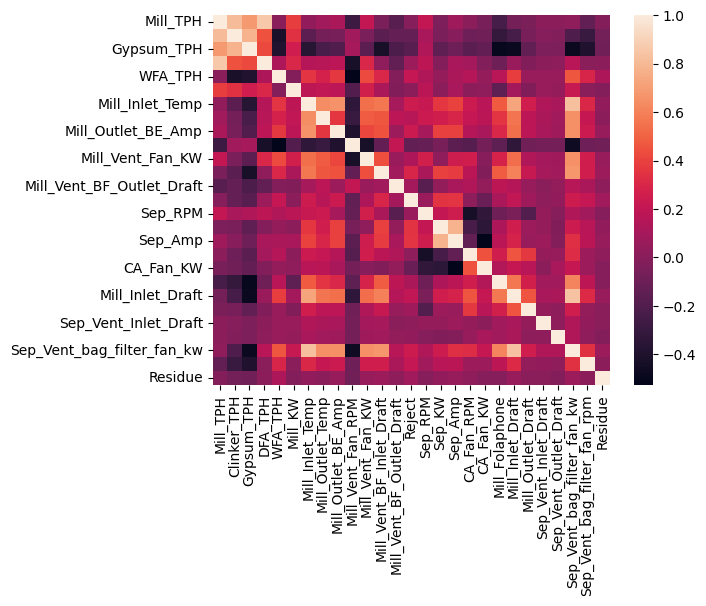

In [255]:
dataplot=sns.heatmap(dataset.corr()) 
  
# displaying heatmap 
plt.show()

## Standardization

In [256]:
dataset.describe()

Mill_TPH  Clinker_TPH   Gypsum_TPH      DFA_TPH      WFA_TPH  \
count  5312.000000  5312.000000  5312.000000  5312.000000  5312.000000   
mean    167.266314    97.420294     4.992651    57.451476     7.412438   
std       8.925119     5.462662     0.656614     4.664108     1.951681   
min     139.770000    78.940000     3.110000    30.000000     0.000000   
25%     161.297500    93.450000     4.830000    54.770000     5.220000   
50%     168.550000    98.510000     5.230000    58.350000     8.370000   
75%     174.500000   101.350000     5.430000    61.000000     8.850000   
max     187.110000   114.340000     6.100000    65.490000    45.000000   

           Mill_KW  Mill_Inlet_Temp  Mill_Outlet_Temp  Mill_Outlet_BE_Amp  \
count  5312.000000      5312.000000       5312.000000         5312.000000   
mean   3669.367733        33.198961         92.178752           50.292762   
std     135.372914         4.117437          5.446657            5.796217   
min     203.360000        21.800000         72.040000           36.000000   
25%    3592.347500        30.147500         89.177500           45.707500   
50%    3649.530000        32.535000         91.850000           49.645000   
75%    3761.102500        34.750000         95.860000           54.190000   
max    3910.320000        51.890000        112.220000           73.810000   

       Mill_Vent_Fan_RPM  ...   CA_Fan_RPM    CA_Fan_KW  Mill_Folaphone  \
count        5312.000000  ...  5312.000000  5312.000000     5312.000000   
mean          830.302316  ...   904.716404   329.373603       97.402969   
std            58.912063  ...    11.748975     9.361746        2.412437   
min           660.560000  ...   845.150000   300.410000       90.820000   
25%           770.000000  ...   900.330000   322.990000       96.540000   
50%           816.895000  ...   905.310000   328.055000       96.800000   
75%           899.940000  ...   910.600000   336.120000       97.300000   
max           930.010000  ...   948.770000   375.080000      110.670000   

       Mill_Inlet_Draft  Mill_Outlet_Draft  Sep_Vent_Inlet_Draft  \
count       5312.000000        5312.000000           5312.000000   
mean          23.736254          87.190345            136.248814   
std            4.944465           8.424492             23.317782   
min           13.370000         -12.730000             87.000000   
25%           20.300000          85.800000            133.200000   
50%           22.300000          87.500000            134.260000   
75%           25.692500          90.350000            138.320000   
max           44.570000         112.020000           1319.000000   

       Sep_Vent_Outlet_Draft  Sep_Vent_bag_filter_fan_kw  \
count            5312.000000                 5312.000000   
mean              209.328149                   17.697125   
std                32.608384                    4.880378   
min                 8.160000                    1.980000   
25%               211.900000                   14.360000   
50%               212.700000                   15.000000   
75%               219.400000                   20.352500   
max               229.690000                   36.500000   

       Sep_Vent_bag_filter_fan_rpm      Residue  
count                  5312.000000  5312.000000  
mean                    758.300529    15.191466  
std                      19.620371     1.230596  
min                     683.360000    11.300000  
25%                     750.000000    14.300000  
50%                     750.000000    15.200000  
75%                     763.127500    15.900000  
max                     931.490000    18.600000  

[8 rows x 27 columns]

In [257]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()

C:\Users\shashi\AppData\Local\Temp\ipykernel_6260\787331744.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['Mill_TPH'])
C:\Users\shashi\AppData\Local\Temp\ipykernel_6260\787331744.py:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['Mill_TPH_SS'])


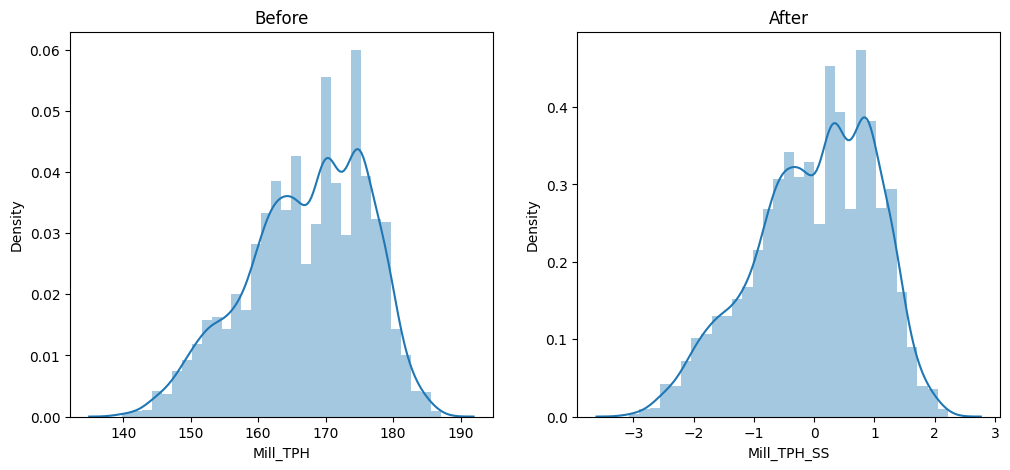

In [258]:
ss.fit(dataset[['Mill_TPH']])

dataset['Mill_TPH_SS'] = pd.DataFrame(ss.transform(dataset[['Mill_TPH']]), columns = ['X'])

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.title("Before")
sns.distplot(dataset['Mill_TPH'])


plt.subplot(1,2,2)
plt.title("After")
sns.distplot(dataset['Mill_TPH_SS'])

plt.show()


C:\Users\shashi\AppData\Local\Temp\ipykernel_6260\933246722.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['Clinker_TPH'])
C:\Users\shashi\AppData\Local\Temp\ipykernel_6260\933246722.py:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['Clinker_TPH_SS'])


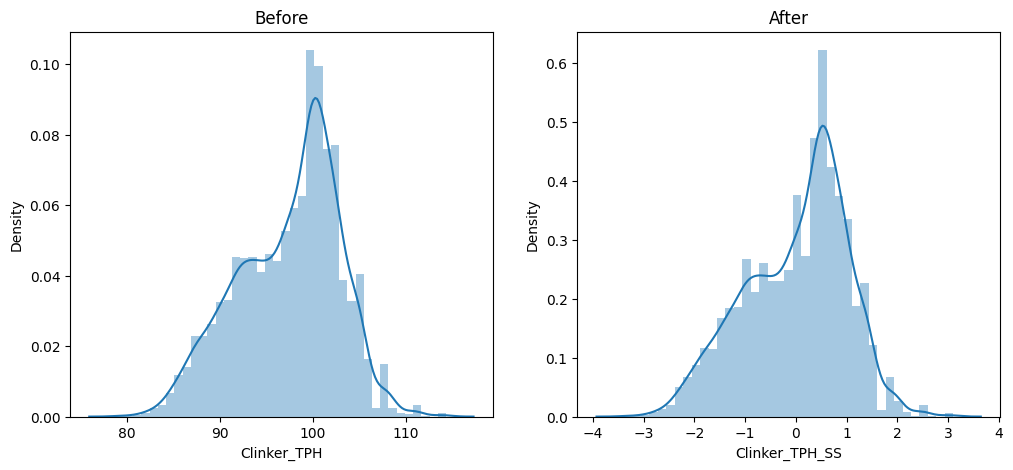

In [259]:
ss.fit(dataset[['Clinker_TPH']])

dataset['Clinker_TPH_SS'] = pd.DataFrame(ss.transform(dataset[['Clinker_TPH']]), columns = ['X'])

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.title("Before")
sns.distplot(dataset['Clinker_TPH'])


plt.subplot(1,2,2)
plt.title("After")
sns.distplot(dataset['Clinker_TPH_SS'])

plt.show()

C:\Users\shashi\AppData\Local\Temp\ipykernel_6260\1911680154.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['Gypsum_TPH'])
C:\Users\shashi\AppData\Local\Temp\ipykernel_6260\1911680154.py:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['Gypsum_TPH_SS'])


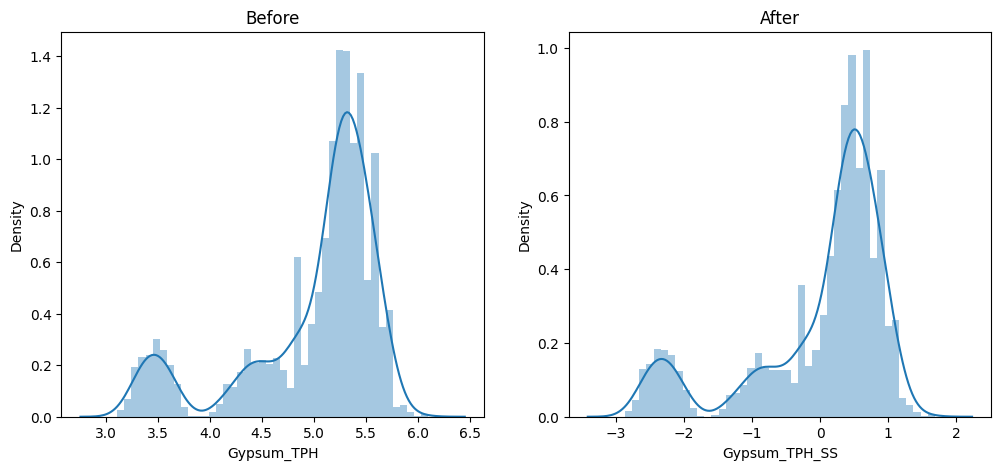

In [260]:
ss.fit(dataset[['Gypsum_TPH']])

dataset['Gypsum_TPH_SS'] = pd.DataFrame(ss.transform(dataset[['Gypsum_TPH']]), columns = ['X'])

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.title("Before")
sns.distplot(dataset['Gypsum_TPH'])


plt.subplot(1,2,2)
plt.title("After")
sns.distplot(dataset['Gypsum_TPH_SS'])

plt.show()

C:\Users\shashi\AppData\Local\Temp\ipykernel_6260\115529213.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['DFA_TPH'])
C:\Users\shashi\AppData\Local\Temp\ipykernel_6260\115529213.py:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['DFA_TPH_SS'])


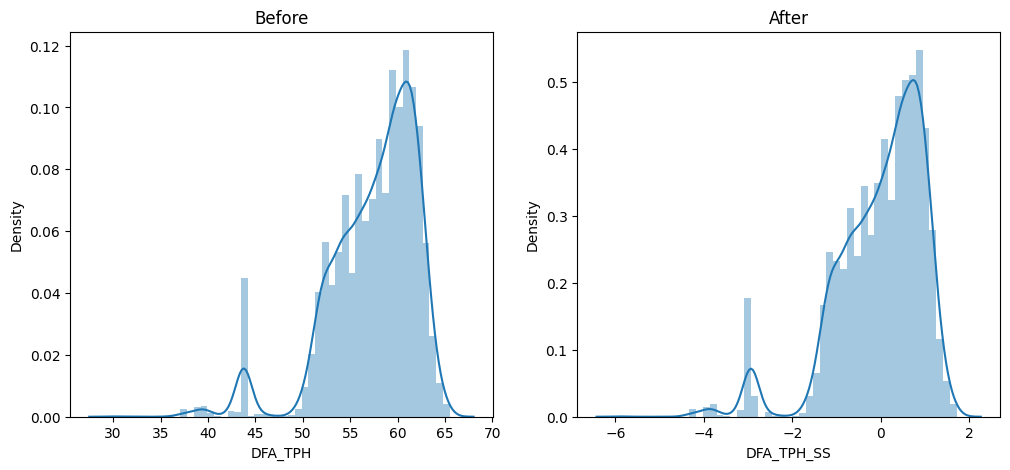

In [261]:
ss.fit(dataset[['DFA_TPH']])

dataset['DFA_TPH_SS'] = pd.DataFrame(ss.transform(dataset[['DFA_TPH']]), columns = ['X'])

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.title("Before")
sns.distplot(dataset['DFA_TPH'])


plt.subplot(1,2,2)
plt.title("After")
sns.distplot(dataset['DFA_TPH_SS'])

plt.show()

C:\Users\shashi\AppData\Local\Temp\ipykernel_6260\2866960519.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['WFA_TPH'])
C:\Users\shashi\AppData\Local\Temp\ipykernel_6260\2866960519.py:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['WFA_TPH_SS'])


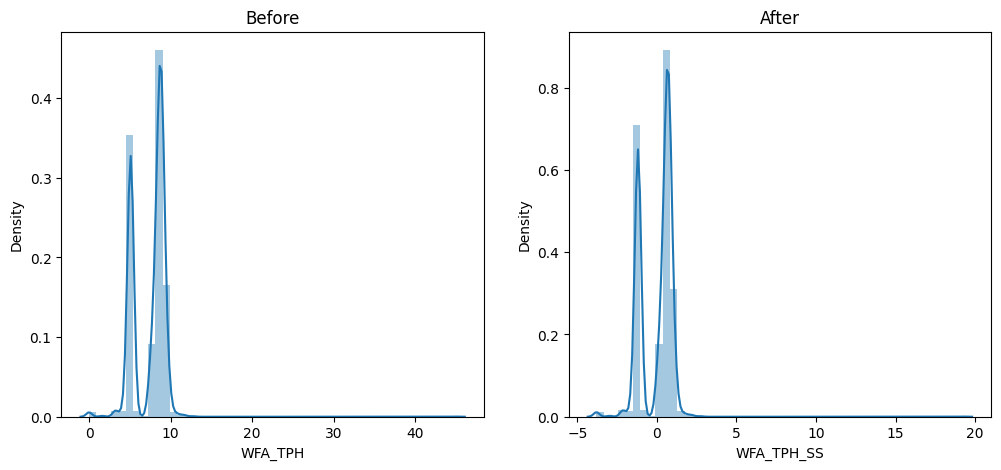

In [262]:
ss.fit(dataset[['WFA_TPH']])

dataset['WFA_TPH_SS'] = pd.DataFrame(ss.transform(dataset[['WFA_TPH']]), columns = ['X'])

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.title("Before")
sns.distplot(dataset['WFA_TPH'])


plt.subplot(1,2,2)
plt.title("After")
sns.distplot(dataset['WFA_TPH_SS'])

plt.show()

C:\Users\shashi\AppData\Local\Temp\ipykernel_6260\2261502296.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['Mill_KW'])
C:\Users\shashi\AppData\Local\Temp\ipykernel_6260\2261502296.py:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['Mill_KW_SS'])


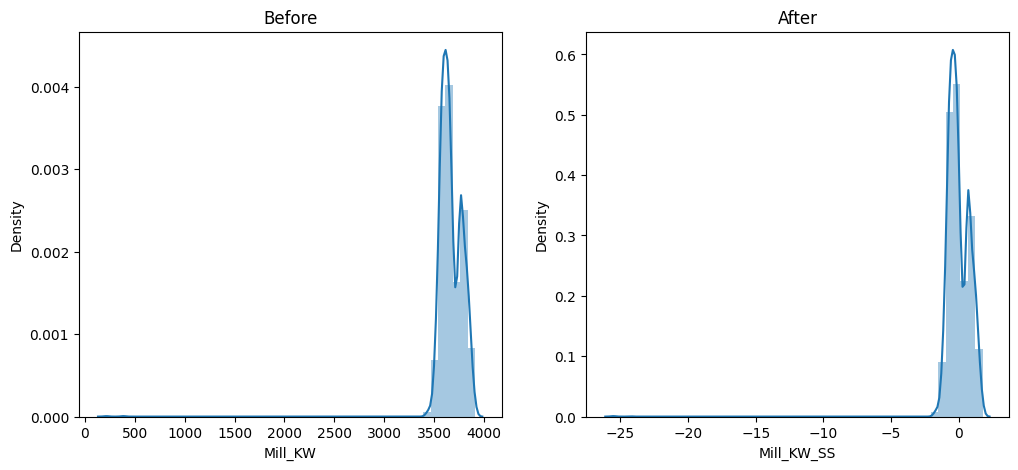

In [263]:
ss.fit(dataset[['Mill_KW']])

dataset['Mill_KW_SS'] = pd.DataFrame(ss.transform(dataset[['Mill_KW']]), columns = ['X'])

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.title("Before")
sns.distplot(dataset['Mill_KW'])


plt.subplot(1,2,2)
plt.title("After")
sns.distplot(dataset['Mill_KW_SS'])

plt.show()

C:\Users\shashi\AppData\Local\Temp\ipykernel_6260\1149148474.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['Mill_Inlet_Temp'])
C:\Users\shashi\AppData\Local\Temp\ipykernel_6260\1149148474.py:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['Mill_Inlet_Temp_SS'])


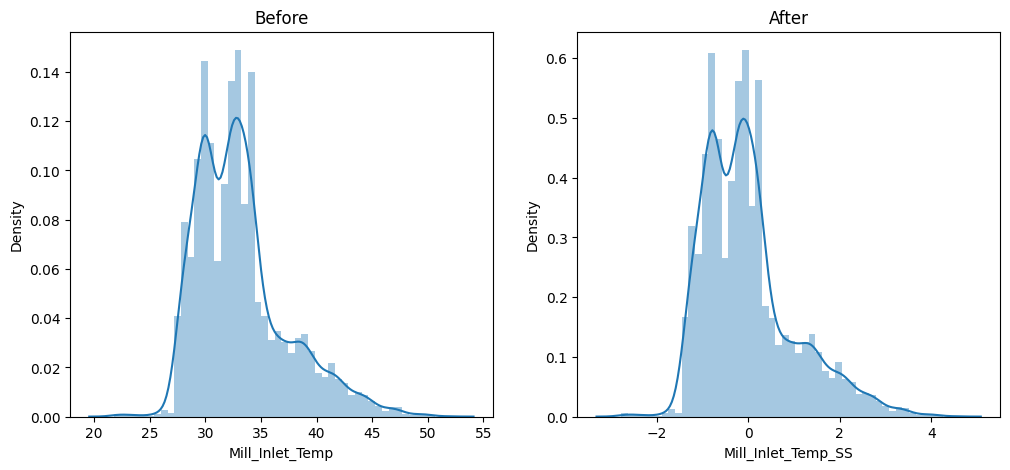

In [264]:
ss.fit(dataset[['Mill_Inlet_Temp']])

dataset['Mill_Inlet_Temp_SS'] = pd.DataFrame(ss.transform(dataset[['Mill_Inlet_Temp']]), columns = ['X'])

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.title("Before")
sns.distplot(dataset['Mill_Inlet_Temp'])


plt.subplot(1,2,2)
plt.title("After")
sns.distplot(dataset['Mill_Inlet_Temp_SS'])

plt.show()

C:\Users\shashi\AppData\Local\Temp\ipykernel_6260\3888900123.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['Mill_Outlet_Temp'])
C:\Users\shashi\AppData\Local\Temp\ipykernel_6260\3888900123.py:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['Mill_Outlet_Temp_SS'])


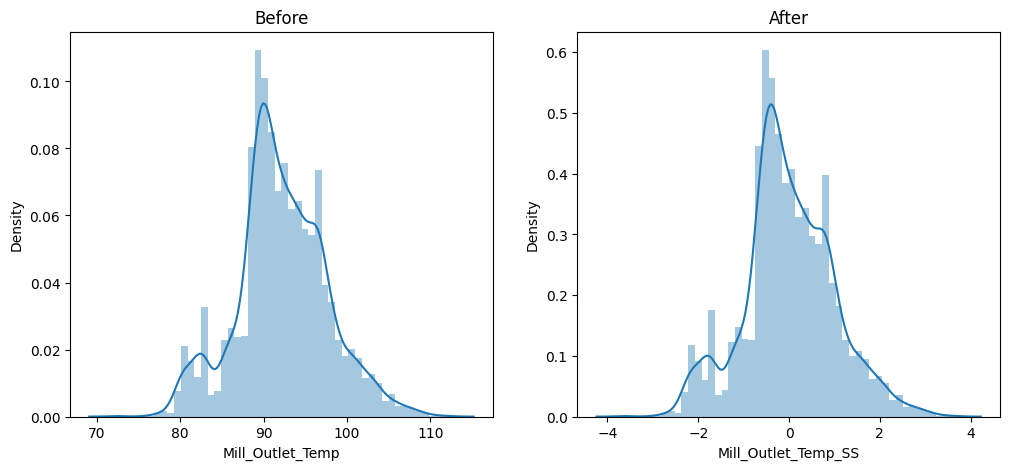

In [265]:
ss.fit(dataset[['Mill_Outlet_Temp']])

dataset['Mill_Outlet_Temp_SS'] = pd.DataFrame(ss.transform(dataset[['Mill_Outlet_Temp']]), columns = ['X'])

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.title("Before")
sns.distplot(dataset['Mill_Outlet_Temp'])


plt.subplot(1,2,2)
plt.title("After")
sns.distplot(dataset['Mill_Outlet_Temp_SS'])

plt.show()

C:\Users\shashi\AppData\Local\Temp\ipykernel_6260\1157275067.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['Mill_Outlet_BE_Amp'])
C:\Users\shashi\AppData\Local\Temp\ipykernel_6260\1157275067.py:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['Mill_Outlet_BE_Amp_SS'])


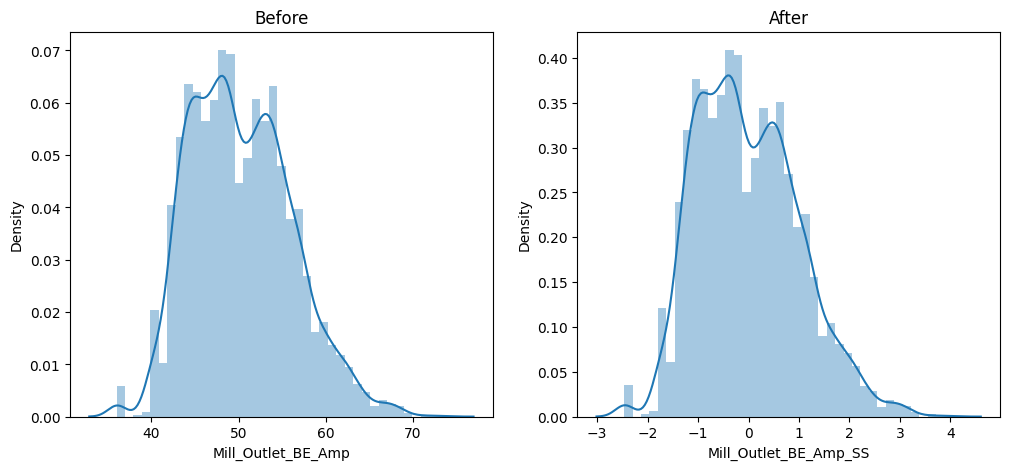

In [266]:
ss.fit(dataset[['Mill_Outlet_BE_Amp']])

dataset['Mill_Outlet_BE_Amp_SS'] = pd.DataFrame(ss.transform(dataset[['Mill_Outlet_BE_Amp']]), columns = ['X'])

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.title("Before")
sns.distplot(dataset['Mill_Outlet_BE_Amp'])


plt.subplot(1,2,2)
plt.title("After")
sns.distplot(dataset['Mill_Outlet_BE_Amp_SS'])

plt.show()

C:\Users\shashi\AppData\Local\Temp\ipykernel_6260\1912313992.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['Mill_Vent_Fan_RPM'])
C:\Users\shashi\AppData\Local\Temp\ipykernel_6260\1912313992.py:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['Mill_Vent_Fan_RPM_SS'])


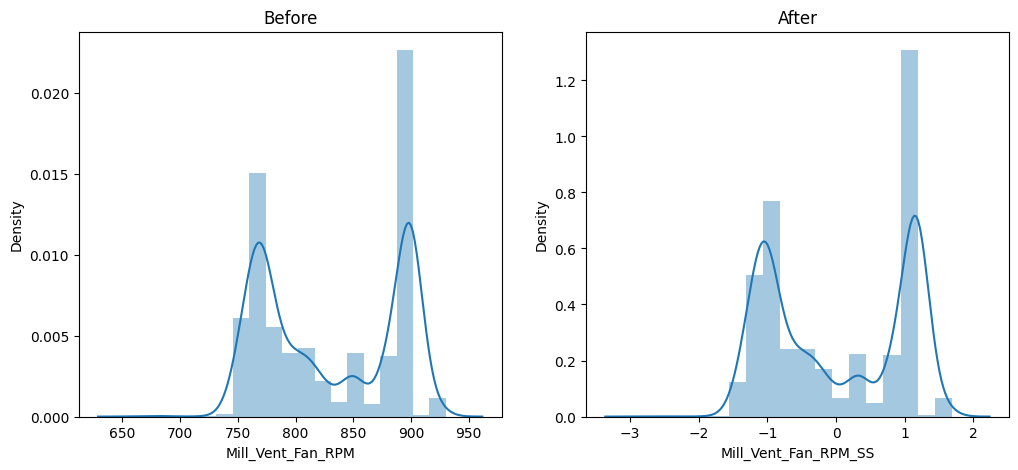

In [267]:
ss.fit(dataset[['Mill_Vent_Fan_RPM']])

dataset['Mill_Vent_Fan_RPM_SS'] = pd.DataFrame(ss.transform(dataset[['Mill_Vent_Fan_RPM']]), columns = ['X'])

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.title("Before")
sns.distplot(dataset['Mill_Vent_Fan_RPM'])


plt.subplot(1,2,2)
plt.title("After")
sns.distplot(dataset['Mill_Vent_Fan_RPM_SS'])

plt.show()

C:\Users\shashi\AppData\Local\Temp\ipykernel_6260\1546044728.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['Mill_Vent_Fan_KW'])
C:\Users\shashi\AppData\Local\Temp\ipykernel_6260\1546044728.py:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['Mill_Vent_Fan_KW_SS'])


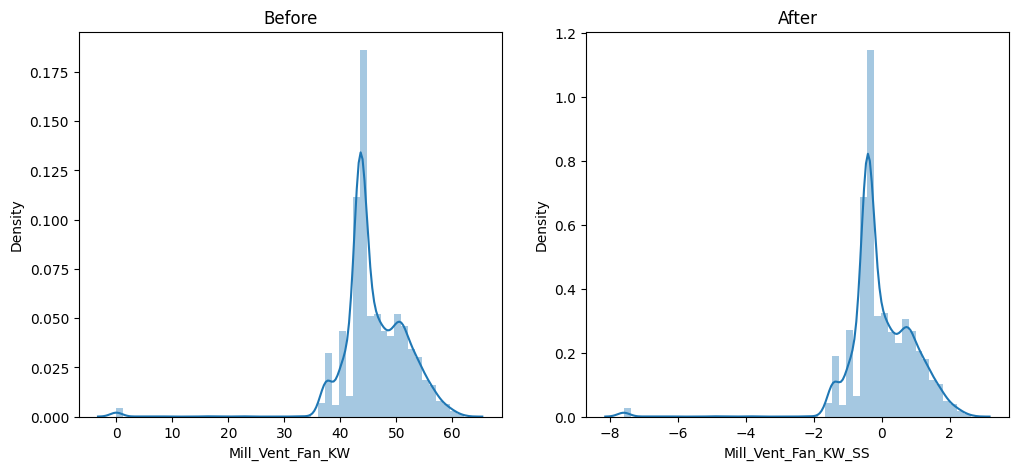

In [268]:
ss.fit(dataset[['Mill_Vent_Fan_KW']])

dataset['Mill_Vent_Fan_KW_SS'] = pd.DataFrame(ss.transform(dataset[['Mill_Vent_Fan_KW']]), columns = ['X'])

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.title("Before")
sns.distplot(dataset['Mill_Vent_Fan_KW'])


plt.subplot(1,2,2)
plt.title("After")
sns.distplot(dataset['Mill_Vent_Fan_KW_SS'])

plt.show()

C:\Users\shashi\AppData\Local\Temp\ipykernel_6260\1007768233.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['Mill_Vent_BF_Inlet_Draft'])
C:\Users\shashi\AppData\Local\Temp\ipykernel_6260\1007768233.py:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['Mill_Vent_BF_Inlet_Draf

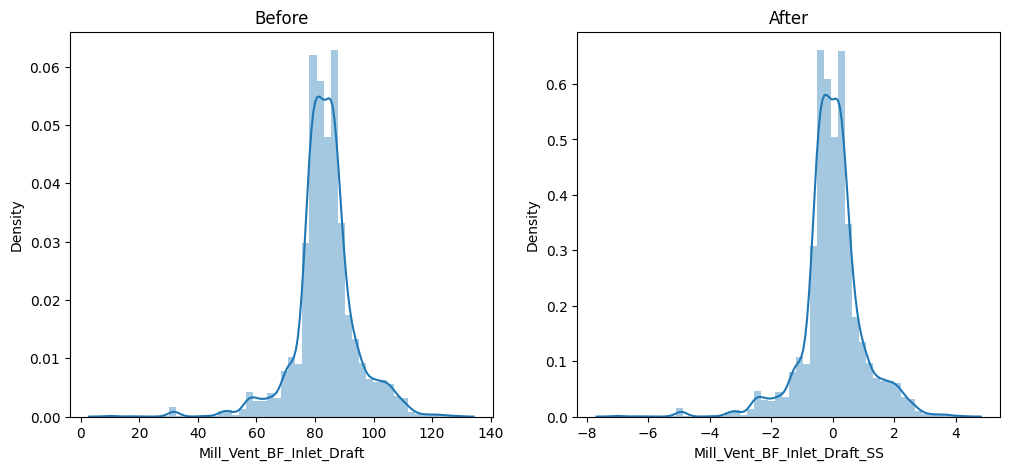

In [269]:
ss.fit(dataset[['Mill_Vent_BF_Inlet_Draft']])

dataset['Mill_Vent_BF_Inlet_Draft_SS'] = pd.DataFrame(ss.transform(dataset[['Mill_Vent_BF_Inlet_Draft']]), columns = ['X'])

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.title("Before")
sns.distplot(dataset['Mill_Vent_BF_Inlet_Draft'])


plt.subplot(1,2,2)
plt.title("After")
sns.distplot(dataset['Mill_Vent_BF_Inlet_Draft_SS'])

plt.show()

C:\Users\shashi\AppData\Local\Temp\ipykernel_6260\852108034.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['Mill_Vent_BF_Outlet_Draft'])
C:\Users\shashi\AppData\Local\Temp\ipykernel_6260\852108034.py:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['Mill_Vent_BF_Outlet_Draf

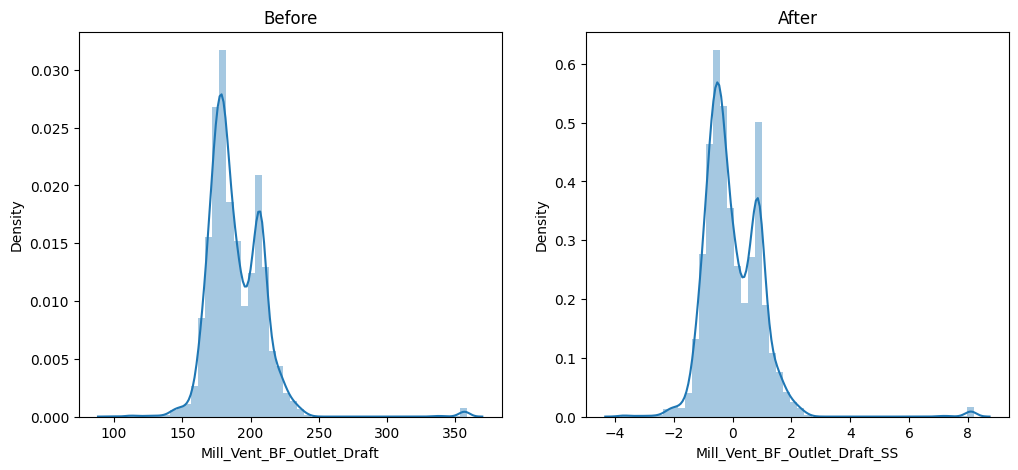

In [270]:
ss.fit(dataset[['Mill_Vent_BF_Outlet_Draft']])

dataset['Mill_Vent_BF_Outlet_Draft_SS'] = pd.DataFrame(ss.transform(dataset[['Mill_Vent_BF_Outlet_Draft']]), columns = ['X'])

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.title("Before")
sns.distplot(dataset['Mill_Vent_BF_Outlet_Draft'])


plt.subplot(1,2,2)
plt.title("After")
sns.distplot(dataset['Mill_Vent_BF_Outlet_Draft_SS'])

plt.show()

C:\Users\shashi\AppData\Local\Temp\ipykernel_6260\3123950031.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['Reject'])
C:\Users\shashi\AppData\Local\Temp\ipykernel_6260\3123950031.py:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['Reject_SS'])


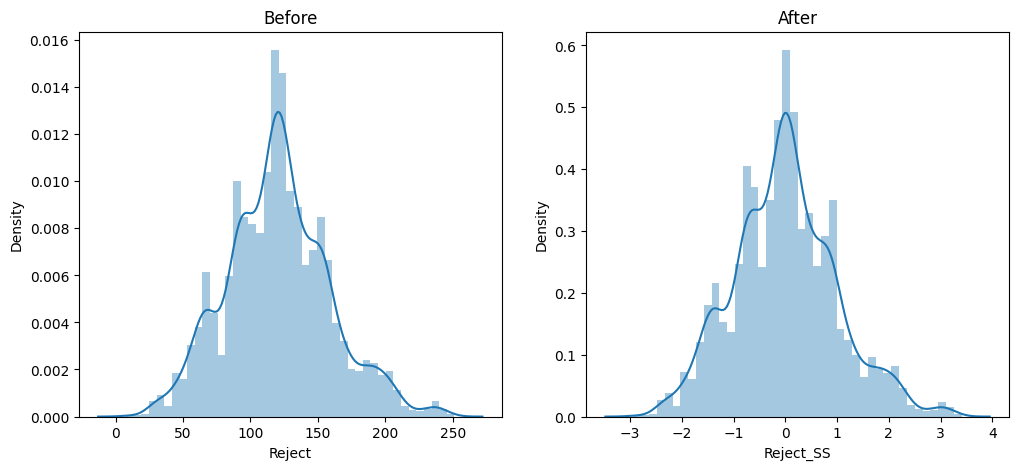

In [271]:
ss.fit(dataset[['Reject']])

dataset['Reject_SS'] = pd.DataFrame(ss.transform(dataset[['Reject']]), columns = ['X'])

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.title("Before")
sns.distplot(dataset['Reject'])


plt.subplot(1,2,2)
plt.title("After")
sns.distplot(dataset['Reject_SS'])

plt.show()

C:\Users\shashi\AppData\Local\Temp\ipykernel_6260\3155138234.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['Sep_RPM'])
C:\Users\shashi\AppData\Local\Temp\ipykernel_6260\3155138234.py:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['Sep_RPM_SS'])


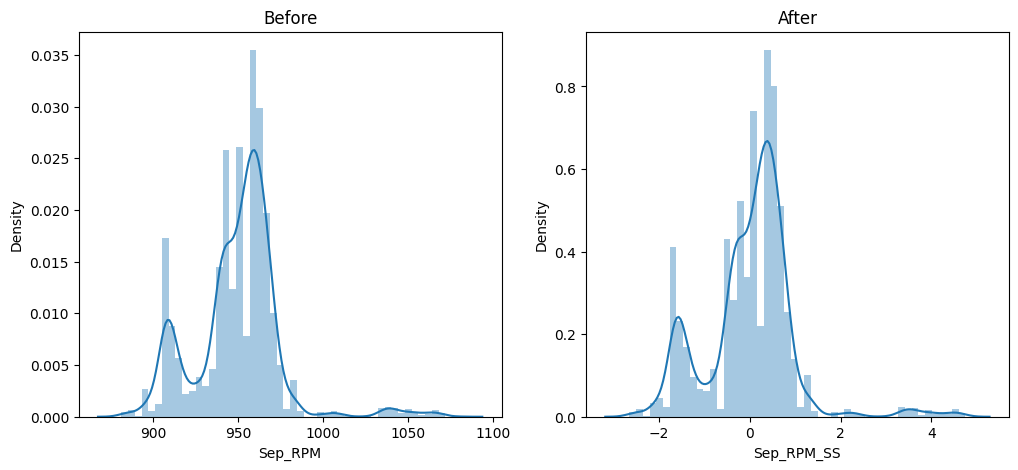

In [272]:
ss.fit(dataset[['Sep_RPM']])

dataset['Sep_RPM_SS'] = pd.DataFrame(ss.transform(dataset[['Sep_RPM']]), columns = ['X'])

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.title("Before")
sns.distplot(dataset['Sep_RPM'])


plt.subplot(1,2,2)
plt.title("After")
sns.distplot(dataset['Sep_RPM_SS'])

plt.show()

C:\Users\shashi\AppData\Local\Temp\ipykernel_6260\3446357369.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['Sep_KW'])
C:\Users\shashi\AppData\Local\Temp\ipykernel_6260\3446357369.py:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['Sep_KW_SS'])


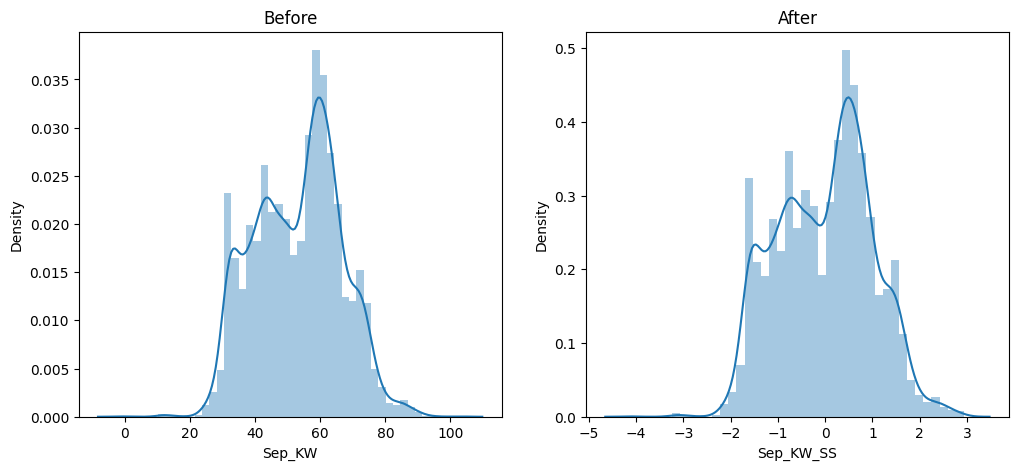

In [273]:
ss.fit(dataset[['Sep_KW']])

dataset['Sep_KW_SS'] = pd.DataFrame(ss.transform(dataset[['Sep_KW']]), columns = ['X'])

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.title("Before")
sns.distplot(dataset['Sep_KW'])


plt.subplot(1,2,2)
plt.title("After")
sns.distplot(dataset['Sep_KW_SS'])

plt.show()

C:\Users\shashi\AppData\Local\Temp\ipykernel_6260\1231170205.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['Sep_Amp'])
C:\Users\shashi\AppData\Local\Temp\ipykernel_6260\1231170205.py:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['Sep_Amp_SS'])


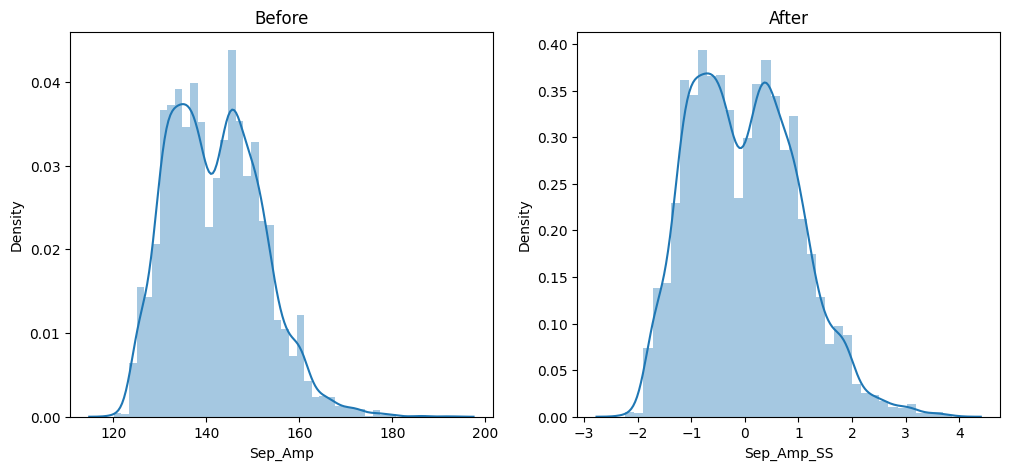

In [274]:
ss.fit(dataset[['Sep_Amp']])

dataset['Sep_Amp_SS'] = pd.DataFrame(ss.transform(dataset[['Sep_Amp']]), columns = ['X'])

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.title("Before")
sns.distplot(dataset['Sep_Amp'])


plt.subplot(1,2,2)
plt.title("After")
sns.distplot(dataset['Sep_Amp_SS'])

plt.show()

C:\Users\shashi\AppData\Local\Temp\ipykernel_6260\3492141908.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['CA_Fan_RPM'])
C:\Users\shashi\AppData\Local\Temp\ipykernel_6260\3492141908.py:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['CA_Fan_RPM_SS'])


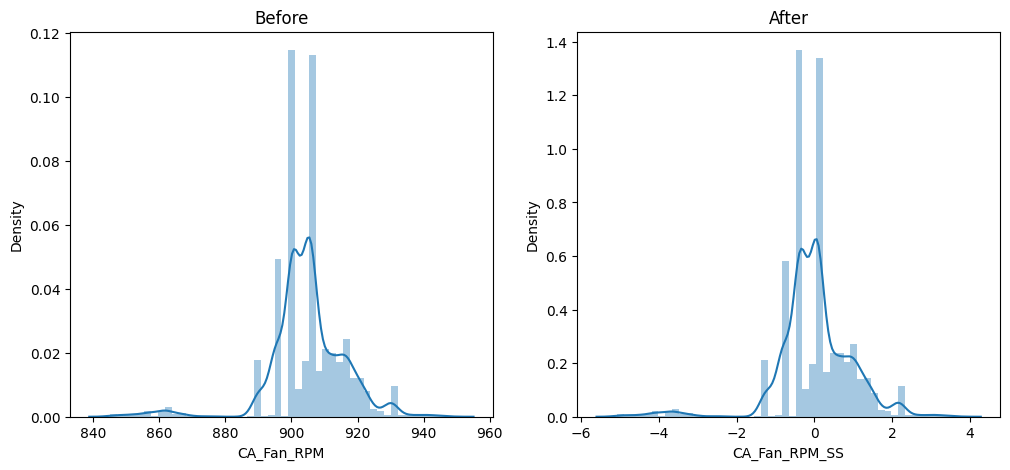

In [275]:
ss.fit(dataset[['CA_Fan_RPM']])

dataset['CA_Fan_RPM_SS'] = pd.DataFrame(ss.transform(dataset[['CA_Fan_RPM']]), columns = ['X'])

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.title("Before")
sns.distplot(dataset['CA_Fan_RPM'])


plt.subplot(1,2,2)
plt.title("After")
sns.distplot(dataset['CA_Fan_RPM_SS'])

plt.show()

C:\Users\shashi\AppData\Local\Temp\ipykernel_6260\1770467607.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['CA_Fan_KW'])
C:\Users\shashi\AppData\Local\Temp\ipykernel_6260\1770467607.py:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['CA_Fan_KW_SS'])


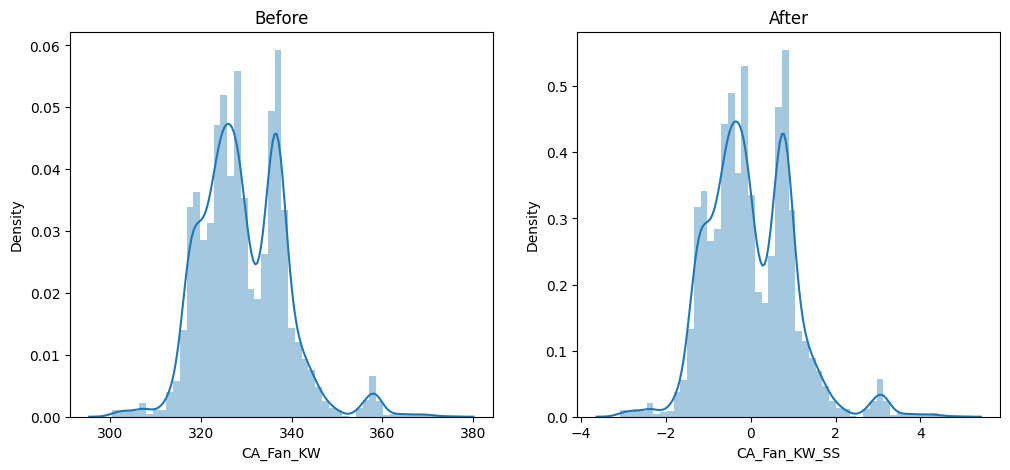

In [276]:
ss.fit(dataset[['CA_Fan_KW']])

dataset['CA_Fan_KW_SS'] = pd.DataFrame(ss.transform(dataset[['CA_Fan_KW']]), columns = ['X'])

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.title("Before")
sns.distplot(dataset['CA_Fan_KW'])


plt.subplot(1,2,2)
plt.title("After")
sns.distplot(dataset['CA_Fan_KW_SS'])

plt.show()

C:\Users\shashi\AppData\Local\Temp\ipykernel_6260\3434499618.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['Mill_Folaphone'])
C:\Users\shashi\AppData\Local\Temp\ipykernel_6260\3434499618.py:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['Mill_Folaphone_SS'])


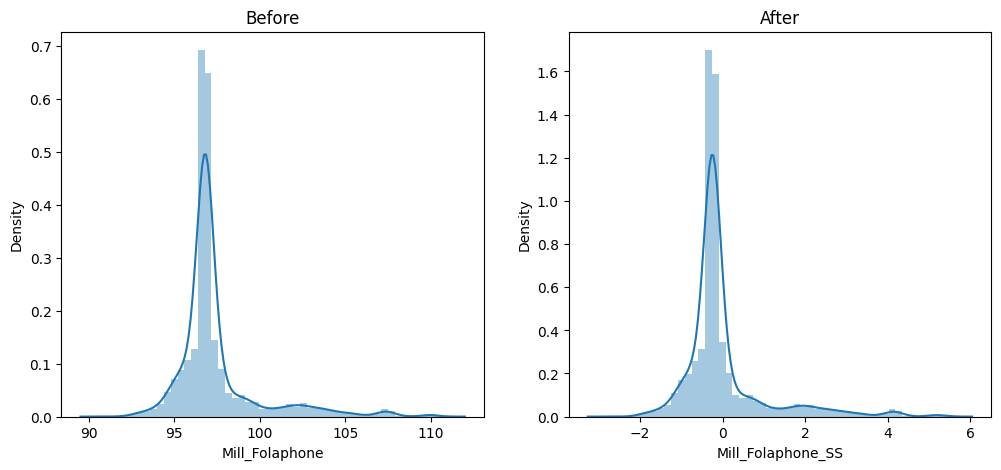

In [277]:
ss.fit(dataset[['Mill_Folaphone']])

dataset['Mill_Folaphone_SS'] = pd.DataFrame(ss.transform(dataset[['Mill_Folaphone']]), columns = ['X'])

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.title("Before")
sns.distplot(dataset['Mill_Folaphone'])


plt.subplot(1,2,2)
plt.title("After")
sns.distplot(dataset['Mill_Folaphone_SS'])

plt.show()

C:\Users\shashi\AppData\Local\Temp\ipykernel_6260\3811660882.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['Mill_Inlet_Draft'])
C:\Users\shashi\AppData\Local\Temp\ipykernel_6260\3811660882.py:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['Mill_Inlet_Draft_SS'])


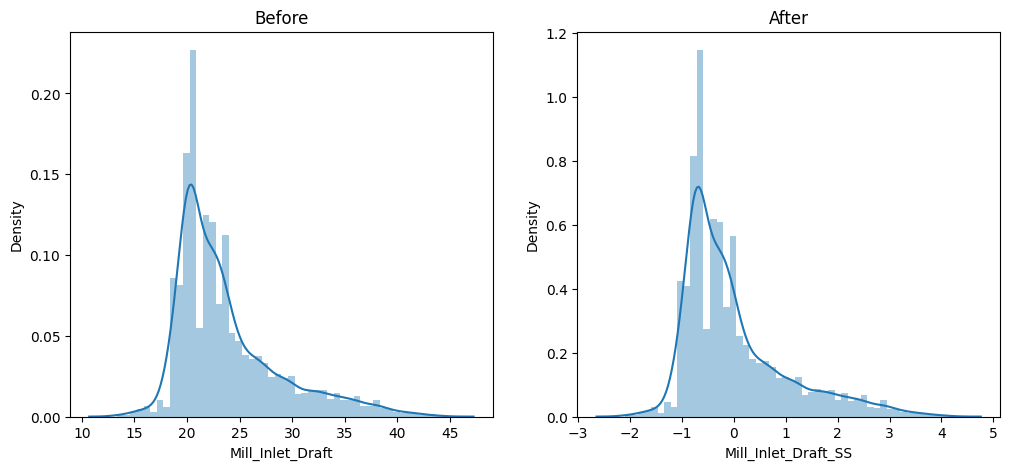

In [278]:
ss.fit(dataset[['Mill_Inlet_Draft']])

dataset['Mill_Inlet_Draft_SS'] = pd.DataFrame(ss.transform(dataset[['Mill_Inlet_Draft']]), columns = ['X'])

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.title("Before")
sns.distplot(dataset['Mill_Inlet_Draft'])


plt.subplot(1,2,2)
plt.title("After")
sns.distplot(dataset['Mill_Inlet_Draft_SS'])

plt.show()

C:\Users\shashi\AppData\Local\Temp\ipykernel_6260\640132745.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['Mill_Outlet_Draft'])
C:\Users\shashi\AppData\Local\Temp\ipykernel_6260\640132745.py:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['Mill_Outlet_Draft_SS'])


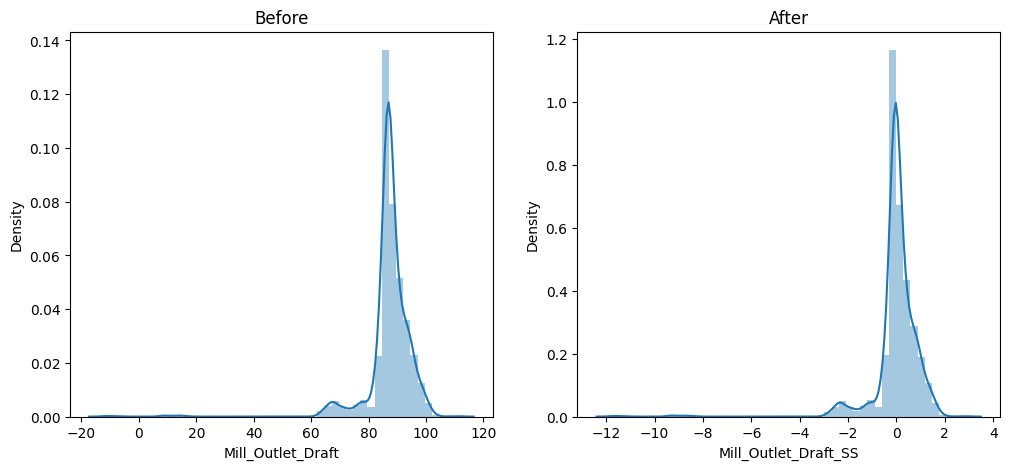

In [279]:
ss.fit(dataset[['Mill_Outlet_Draft']])

dataset['Mill_Outlet_Draft_SS'] = pd.DataFrame(ss.transform(dataset[['Mill_Outlet_Draft']]), columns = ['X'])

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.title("Before")
sns.distplot(dataset['Mill_Outlet_Draft'])


plt.subplot(1,2,2)
plt.title("After")
sns.distplot(dataset['Mill_Outlet_Draft_SS'])

plt.show()

C:\Users\shashi\AppData\Local\Temp\ipykernel_6260\2847737094.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['Sep_Vent_Inlet_Draft'])
C:\Users\shashi\AppData\Local\Temp\ipykernel_6260\2847737094.py:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['Sep_Vent_Inlet_Draft_SS'])


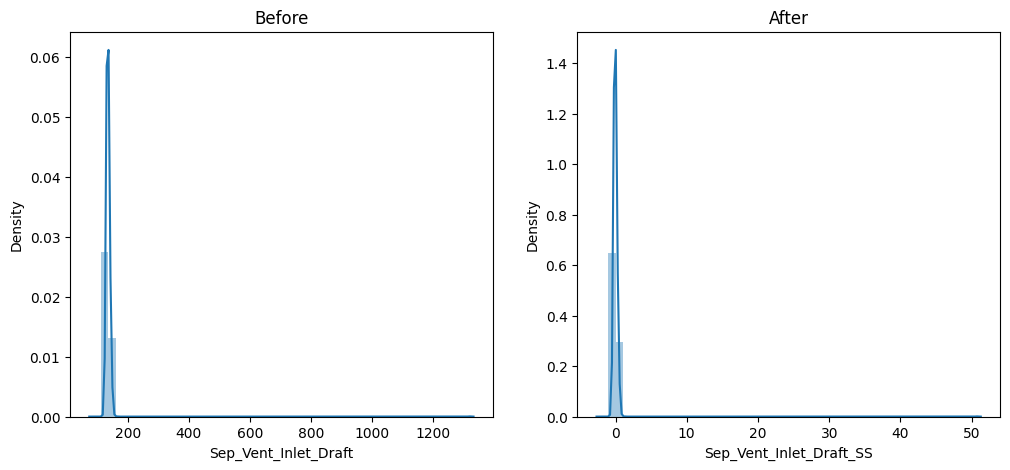

In [280]:
ss.fit(dataset[['Sep_Vent_Inlet_Draft']])

dataset['Sep_Vent_Inlet_Draft_SS'] = pd.DataFrame(ss.transform(dataset[['Sep_Vent_Inlet_Draft']]), columns = ['X'])

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.title("Before")
sns.distplot(dataset['Sep_Vent_Inlet_Draft'])


plt.subplot(1,2,2)
plt.title("After")
sns.distplot(dataset['Sep_Vent_Inlet_Draft_SS'])

plt.show()

C:\Users\shashi\AppData\Local\Temp\ipykernel_6260\3359521431.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['Sep_Vent_Outlet_Draft'])
C:\Users\shashi\AppData\Local\Temp\ipykernel_6260\3359521431.py:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['Sep_Vent_Outlet_Draft_SS']

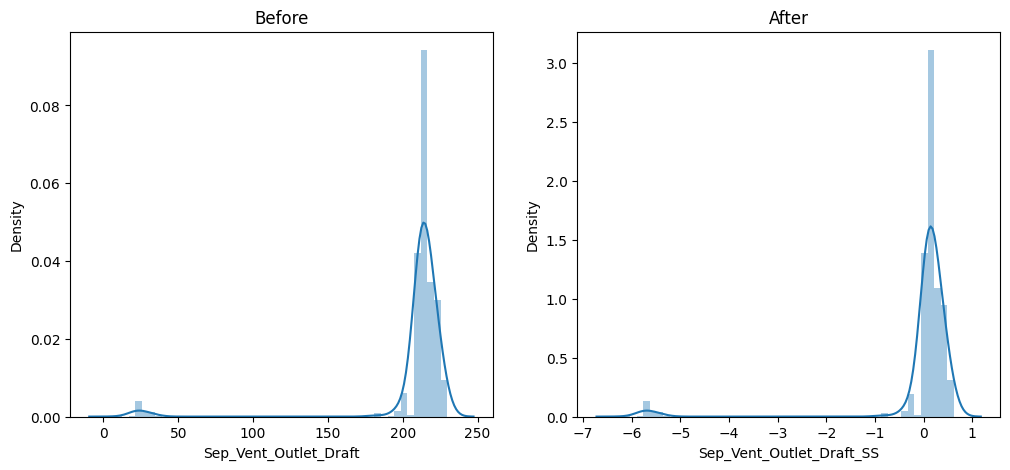

In [281]:
ss.fit(dataset[['Sep_Vent_Outlet_Draft']])

dataset['Sep_Vent_Outlet_Draft_SS'] = pd.DataFrame(ss.transform(dataset[['Sep_Vent_Outlet_Draft']]), columns = ['X'])

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.title("Before")
sns.distplot(dataset['Sep_Vent_Outlet_Draft'])


plt.subplot(1,2,2)
plt.title("After")
sns.distplot(dataset['Sep_Vent_Outlet_Draft_SS'])

plt.show()

C:\Users\shashi\AppData\Local\Temp\ipykernel_6260\1211133839.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['Sep_Vent_bag_filter_fan_kw'])
C:\Users\shashi\AppData\Local\Temp\ipykernel_6260\1211133839.py:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['Sep_Vent_bag_filter_f

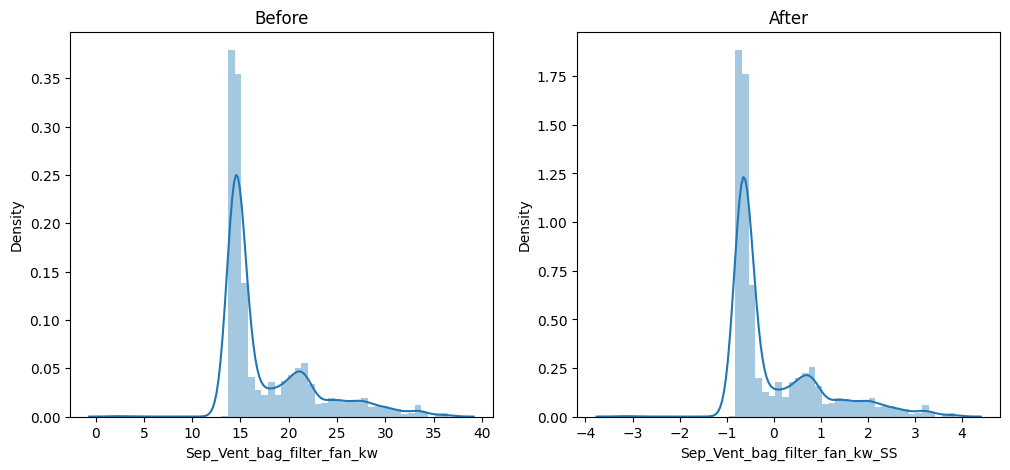

In [282]:
ss.fit(dataset[['Sep_Vent_bag_filter_fan_kw']])

dataset['Sep_Vent_bag_filter_fan_kw_SS'] = pd.DataFrame(ss.transform(dataset[['Sep_Vent_bag_filter_fan_kw']]), columns = ['X'])

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.title("Before")
sns.distplot(dataset['Sep_Vent_bag_filter_fan_kw'])


plt.subplot(1,2,2)
plt.title("After")
sns.distplot(dataset['Sep_Vent_bag_filter_fan_kw_SS'])

plt.show()

C:\Users\shashi\AppData\Local\Temp\ipykernel_6260\1181462614.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['Sep_Vent_bag_filter_fan_rpm'])
C:\Users\shashi\AppData\Local\Temp\ipykernel_6260\1181462614.py:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['Sep_Vent_bag_filter_

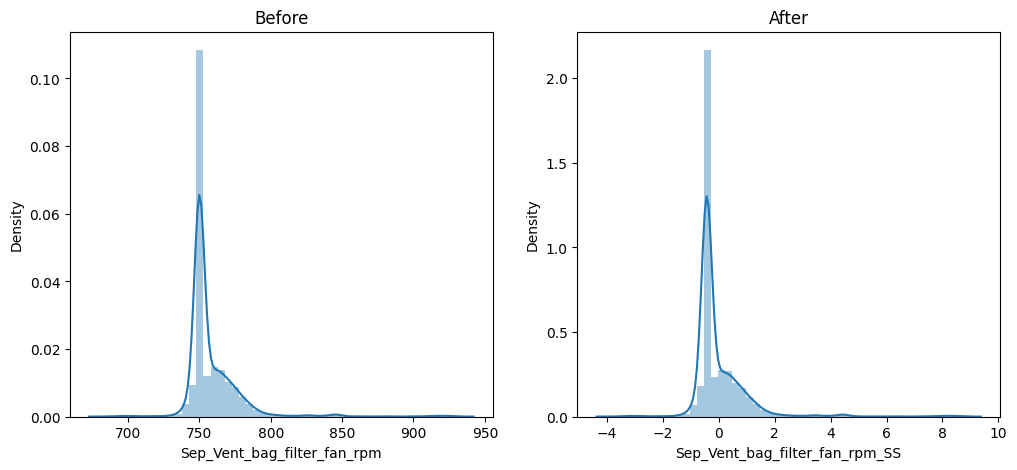

In [283]:
ss.fit(dataset[['Sep_Vent_bag_filter_fan_rpm']])

dataset['Sep_Vent_bag_filter_fan_rpm_SS'] = pd.DataFrame(ss.transform(dataset[['Sep_Vent_bag_filter_fan_rpm']]), columns = ['X'])

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.title("Before")
sns.distplot(dataset['Sep_Vent_bag_filter_fan_rpm'])


plt.subplot(1,2,2)
plt.title("After")
sns.distplot(dataset['Sep_Vent_bag_filter_fan_rpm_SS'])

plt.show()

C:\Users\shashi\AppData\Local\Temp\ipykernel_6260\3060724912.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['Residue'])
C:\Users\shashi\AppData\Local\Temp\ipykernel_6260\3060724912.py:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['Residue_SS'])


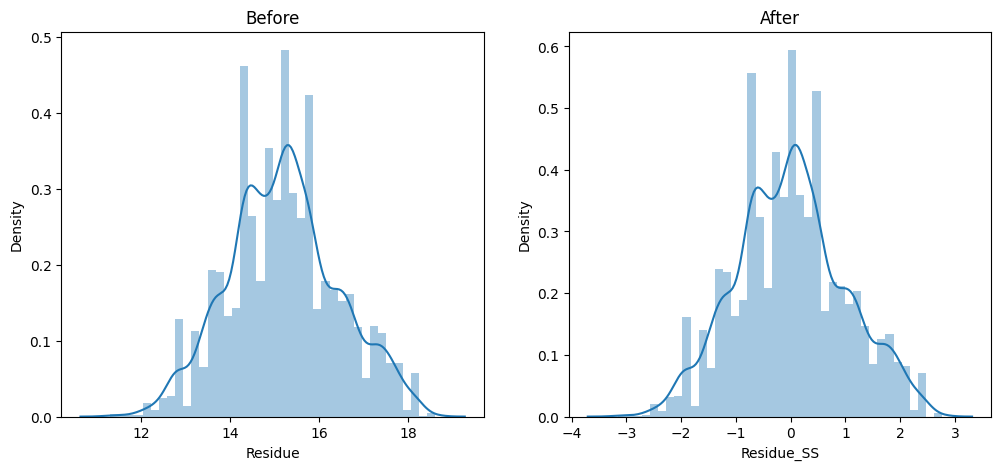

In [284]:
ss.fit(dataset[['Residue']])

dataset['Residue_SS'] = pd.DataFrame(ss.transform(dataset[['Residue']]), columns = ['X'])

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.title("Before")
sns.distplot(dataset['Residue'])


plt.subplot(1,2,2)
plt.title("After")
sns.distplot(dataset['Residue_SS'])

plt.show()

## normalization

In [285]:
from sklearn.preprocessing import MinMaxScaler

ms = MinMaxScaler()

In [286]:
ms.fit(dataset[['Mill_TPH']])

MinMaxScaler()

C:\Users\shashi\AppData\Local\Temp\ipykernel_6260\3827745863.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['Mill_TPH'])
C:\Users\shashi\AppData\Local\Temp\ipykernel_6260\3827745863.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['Mill_TPH_MS'])


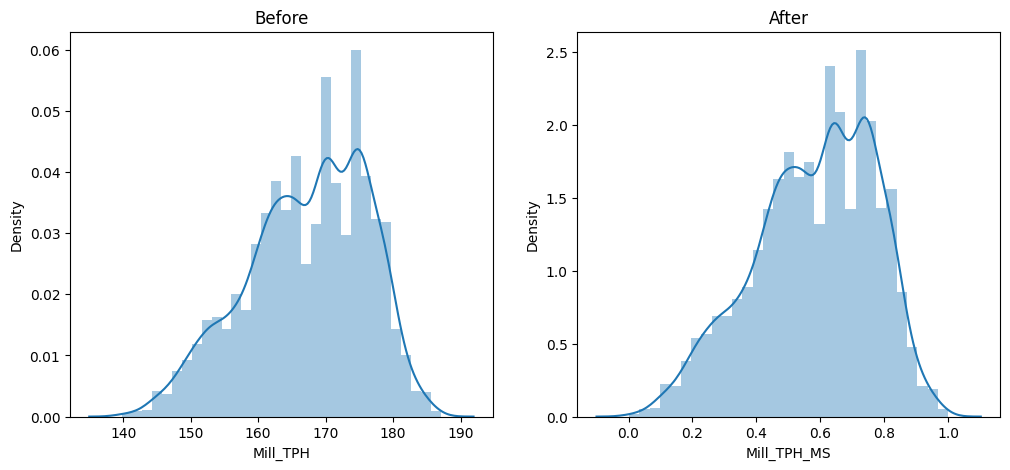

In [287]:
dataset['Mill_TPH_MS'] = pd.DataFrame(ms.transform(dataset[['Mill_TPH']]), columns = ['X'])

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.title("Before")
sns.distplot(dataset['Mill_TPH'])


plt.subplot(1,2,2)
plt.title("After")
sns.distplot(dataset['Mill_TPH_MS'])

plt.show()

C:\Users\shashi\AppData\Local\Temp\ipykernel_6260\365391103.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['Gypsum_TPH'])
C:\Users\shashi\AppData\Local\Temp\ipykernel_6260\365391103.py:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['Gypsum_TPH_MS'])


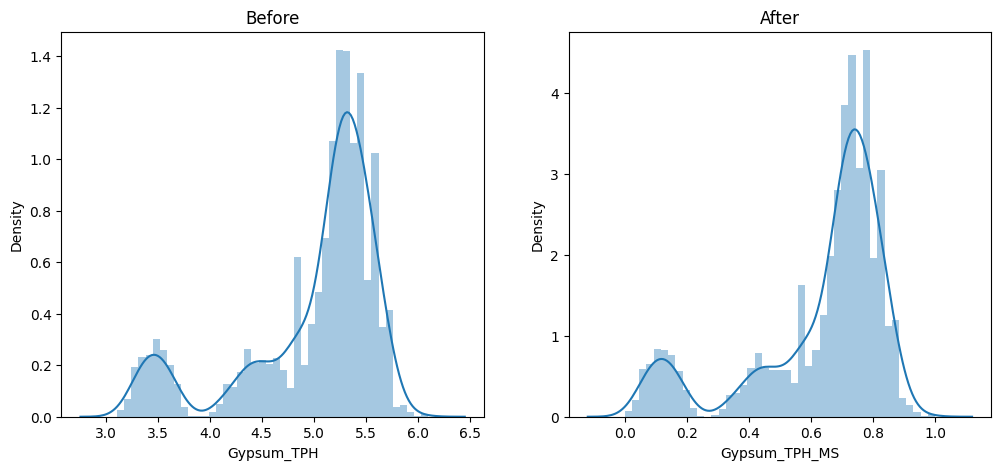

In [288]:
ms.fit(dataset[['Gypsum_TPH']])
dataset['Gypsum_TPH_MS'] = pd.DataFrame(ms.transform(dataset[['Gypsum_TPH']]), columns = ['X'])

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.title("Before")
sns.distplot(dataset['Gypsum_TPH'])


plt.subplot(1,2,2)
plt.title("After")
sns.distplot(dataset['Gypsum_TPH_MS'])

plt.show()

C:\Users\shashi\AppData\Local\Temp\ipykernel_6260\1218665453.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['DFA_TPH'])
C:\Users\shashi\AppData\Local\Temp\ipykernel_6260\1218665453.py:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['DFA_TPH_MS'])


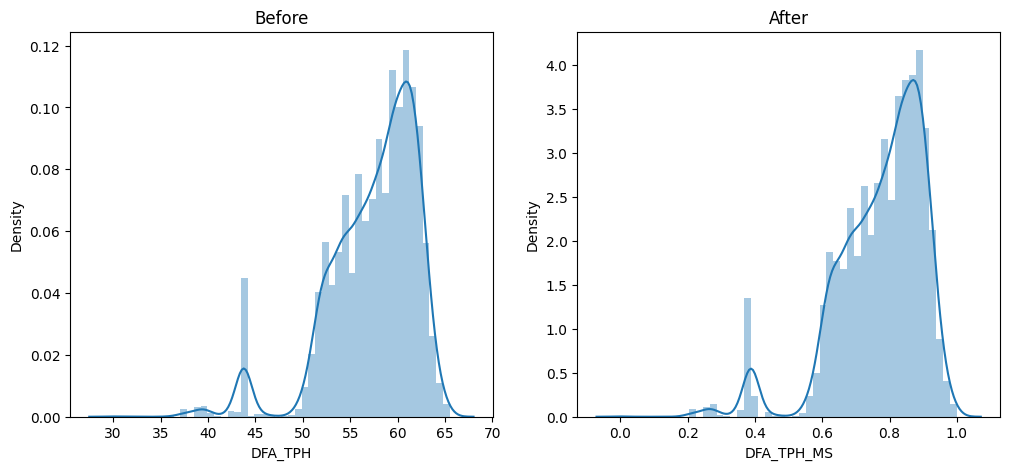

In [289]:
ms.fit(dataset[['DFA_TPH']])
dataset['DFA_TPH_MS'] = pd.DataFrame(ms.transform(dataset[['DFA_TPH']]), columns = ['X'])

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.title("Before")
sns.distplot(dataset['DFA_TPH'])


plt.subplot(1,2,2)
plt.title("After")
sns.distplot(dataset['DFA_TPH_MS'])

plt.show()

C:\Users\shashi\AppData\Local\Temp\ipykernel_6260\3715284972.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['WFA_TPH'])
C:\Users\shashi\AppData\Local\Temp\ipykernel_6260\3715284972.py:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['WFA_TPH_MS'])


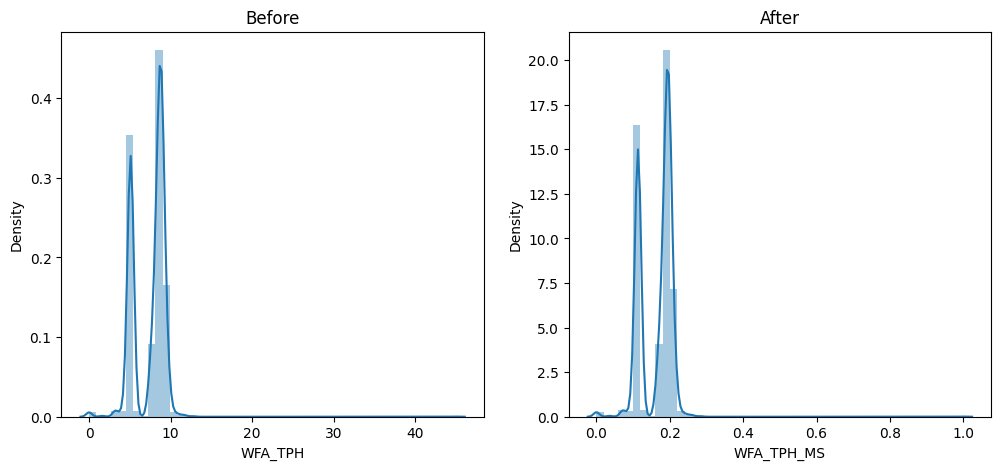

In [290]:
ms.fit(dataset[['WFA_TPH']])
dataset['WFA_TPH_MS'] = pd.DataFrame(ms.transform(dataset[['WFA_TPH']]), columns = ['X'])

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.title("Before")
sns.distplot(dataset['WFA_TPH'])


plt.subplot(1,2,2)
plt.title("After")
sns.distplot(dataset['WFA_TPH_MS'])

plt.show()

C:\Users\shashi\AppData\Local\Temp\ipykernel_6260\1812684698.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['Mill_KW'])
C:\Users\shashi\AppData\Local\Temp\ipykernel_6260\1812684698.py:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['Mill_KW_MS'])


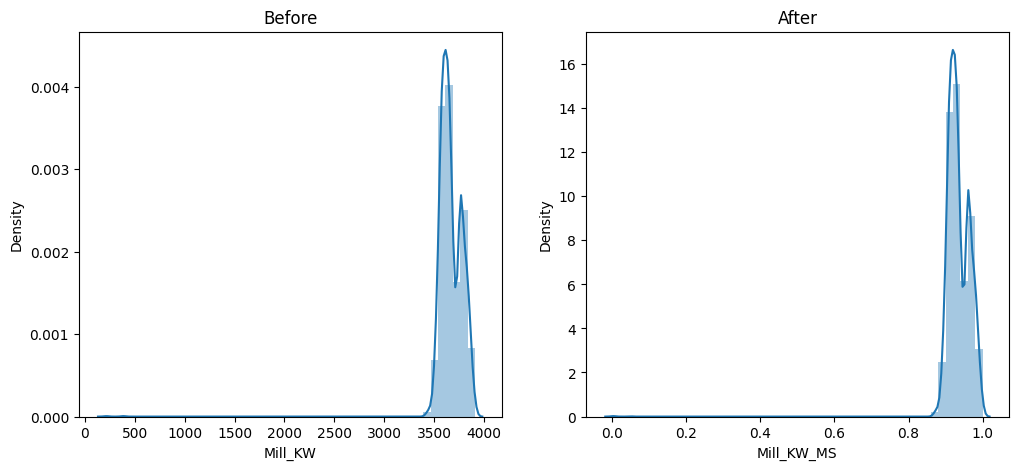

In [291]:
ms.fit(dataset[['Mill_KW']])
dataset['Mill_KW_MS'] = pd.DataFrame(ms.transform(dataset[['Mill_KW']]), columns = ['X'])

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.title("Before")
sns.distplot(dataset['Mill_KW'])


plt.subplot(1,2,2)
plt.title("After")
sns.distplot(dataset['Mill_KW_MS'])

plt.show()

C:\Users\shashi\AppData\Local\Temp\ipykernel_6260\3631190190.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['Mill_Inlet_Temp'])
C:\Users\shashi\AppData\Local\Temp\ipykernel_6260\3631190190.py:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['Mill_Inlet_Temp_MS'])


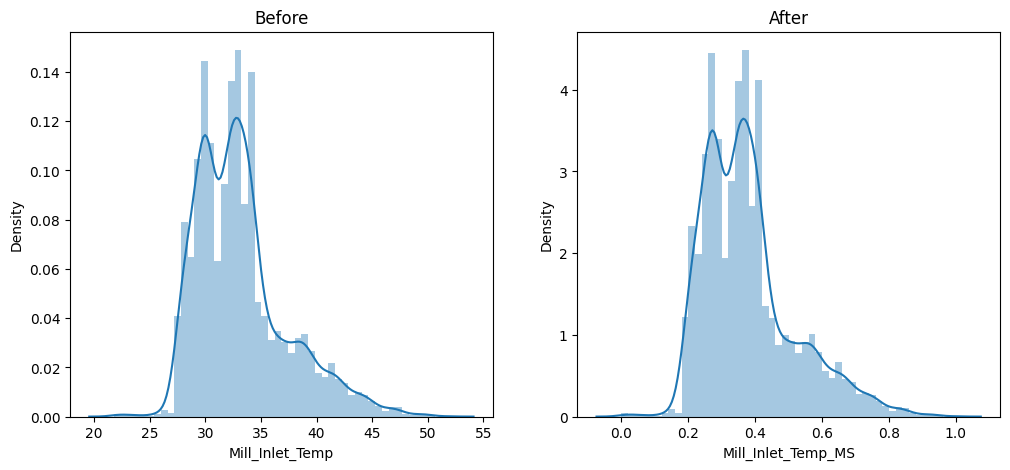

In [292]:
ms.fit(dataset[['Mill_Inlet_Temp']])
dataset['Mill_Inlet_Temp_MS'] = pd.DataFrame(ms.transform(dataset[['Mill_Inlet_Temp']]), columns = ['X'])

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.title("Before")
sns.distplot(dataset['Mill_Inlet_Temp'])


plt.subplot(1,2,2)
plt.title("After")
sns.distplot(dataset['Mill_Inlet_Temp_MS'])

plt.show()

C:\Users\shashi\AppData\Local\Temp\ipykernel_6260\1830887872.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['Mill_Outlet_Temp'])
C:\Users\shashi\AppData\Local\Temp\ipykernel_6260\1830887872.py:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['Mill_Outlet_Temp_MS'])


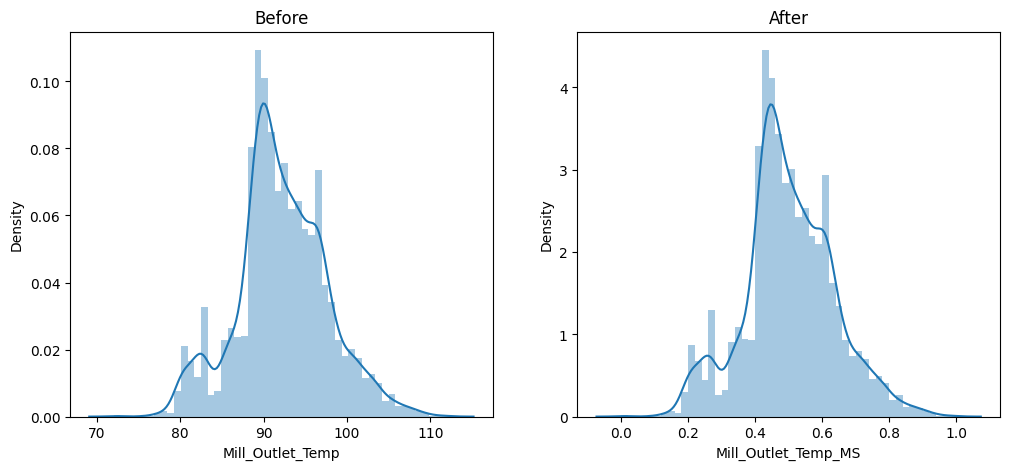

In [293]:
ms.fit(dataset[['Mill_Outlet_Temp']])
dataset['Mill_Outlet_Temp_MS'] = pd.DataFrame(ms.transform(dataset[['Mill_Outlet_Temp']]), columns = ['X'])

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.title("Before")
sns.distplot(dataset['Mill_Outlet_Temp'])


plt.subplot(1,2,2)
plt.title("After")
sns.distplot(dataset['Mill_Outlet_Temp_MS'])

plt.show()

C:\Users\shashi\AppData\Local\Temp\ipykernel_6260\3520510023.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['Mill_Outlet_BE_Amp'])
C:\Users\shashi\AppData\Local\Temp\ipykernel_6260\3520510023.py:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['Mill_Outlet_BE_Amp_MS'])


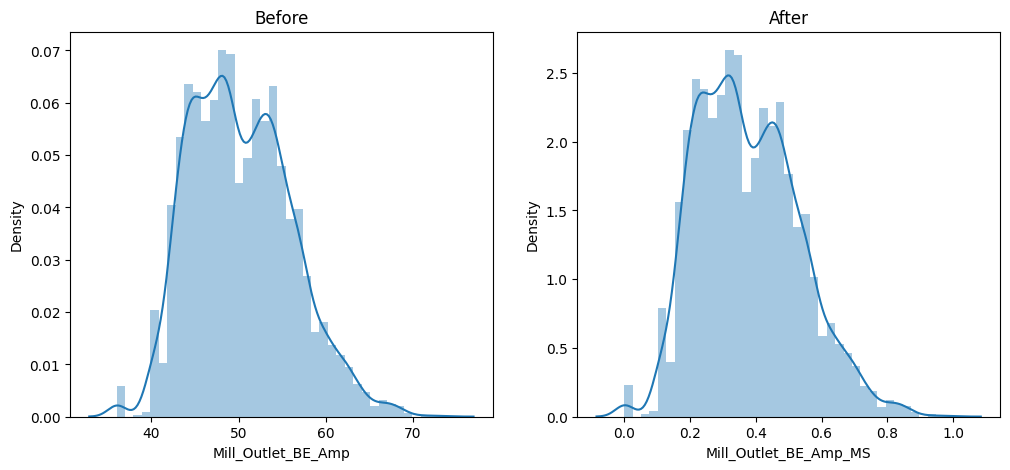

In [294]:
ms.fit(dataset[['Mill_Outlet_BE_Amp']])
dataset['Mill_Outlet_BE_Amp_MS'] = pd.DataFrame(ms.transform(dataset[['Mill_Outlet_BE_Amp']]), columns = ['X'])

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.title("Before")
sns.distplot(dataset['Mill_Outlet_BE_Amp'])


plt.subplot(1,2,2)
plt.title("After")
sns.distplot(dataset['Mill_Outlet_BE_Amp_MS'])

plt.show()

C:\Users\shashi\AppData\Local\Temp\ipykernel_6260\768143233.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['Mill_Vent_Fan_RPM'])
C:\Users\shashi\AppData\Local\Temp\ipykernel_6260\768143233.py:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['Mill_Vent_Fan_RPM_MS'])


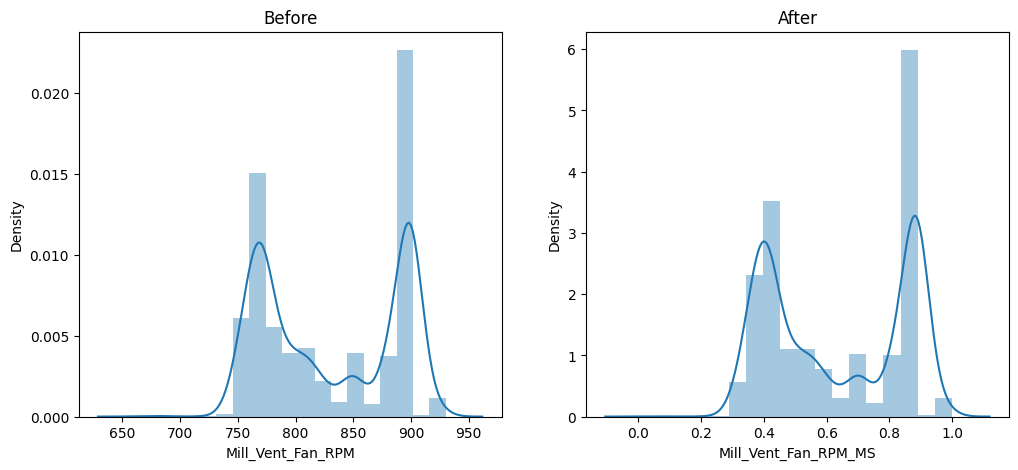

In [295]:
ms.fit(dataset[['Mill_Vent_Fan_RPM']])
dataset['Mill_Vent_Fan_RPM_MS'] = pd.DataFrame(ms.transform(dataset[['Mill_Vent_Fan_RPM']]), columns = ['X'])

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.title("Before")
sns.distplot(dataset['Mill_Vent_Fan_RPM'])


plt.subplot(1,2,2)
plt.title("After")
sns.distplot(dataset['Mill_Vent_Fan_RPM_MS'])

plt.show()

C:\Users\shashi\AppData\Local\Temp\ipykernel_6260\1774624261.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['Mill_Vent_Fan_KW'])
C:\Users\shashi\AppData\Local\Temp\ipykernel_6260\1774624261.py:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['Mill_Vent_Fan_KW_MS'])


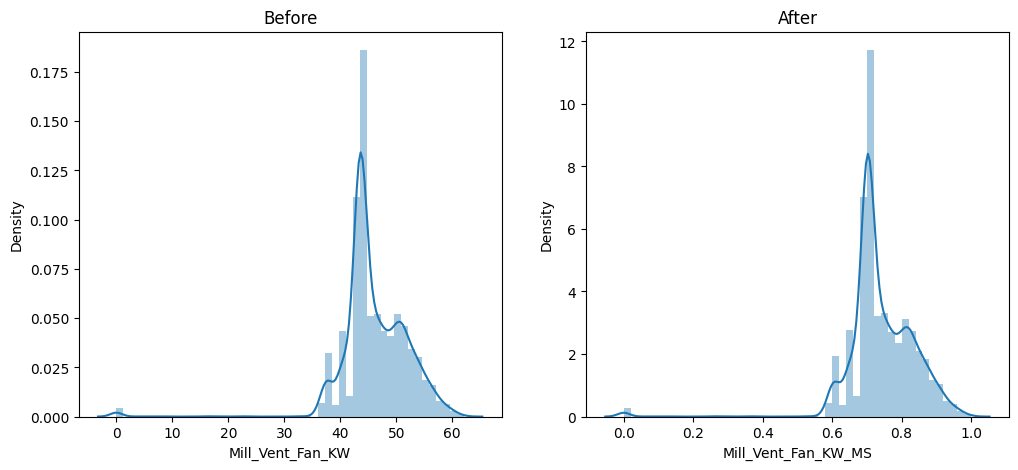

In [296]:
ms.fit(dataset[['Mill_Vent_Fan_KW']])
dataset['Mill_Vent_Fan_KW_MS'] = pd.DataFrame(ms.transform(dataset[['Mill_Vent_Fan_KW']]), columns = ['X'])

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.title("Before")
sns.distplot(dataset['Mill_Vent_Fan_KW'])


plt.subplot(1,2,2)
plt.title("After")
sns.distplot(dataset['Mill_Vent_Fan_KW_MS'])

plt.show()

C:\Users\shashi\AppData\Local\Temp\ipykernel_6260\2655593964.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['Mill_Vent_BF_Inlet_Draft'])
C:\Users\shashi\AppData\Local\Temp\ipykernel_6260\2655593964.py:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['Mill_Vent_BF_Inlet_Draf

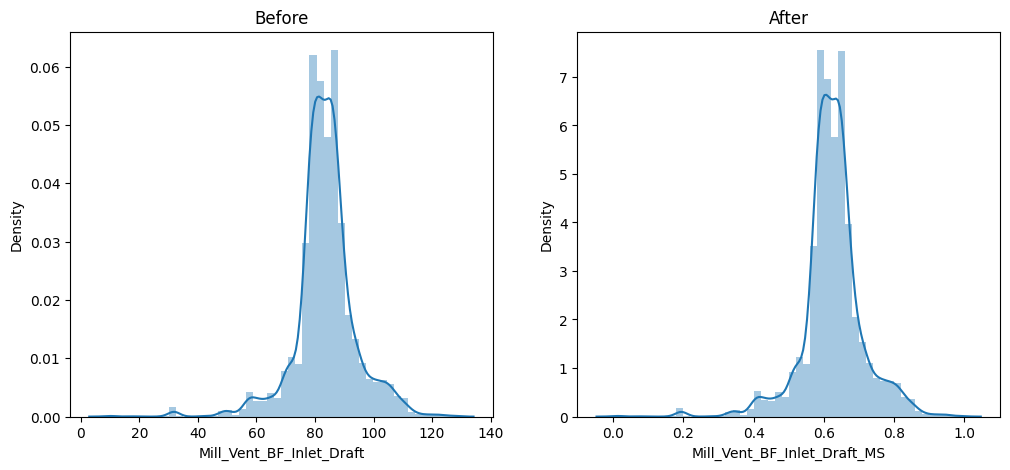

In [297]:
ms.fit(dataset[['Mill_Vent_BF_Inlet_Draft']])
dataset['Mill_Vent_BF_Inlet_Draft_MS'] = pd.DataFrame(ms.transform(dataset[['Mill_Vent_BF_Inlet_Draft']]), columns = ['X'])

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.title("Before")
sns.distplot(dataset['Mill_Vent_BF_Inlet_Draft'])


plt.subplot(1,2,2)
plt.title("After")
sns.distplot(dataset['Mill_Vent_BF_Inlet_Draft_MS'])

plt.show()

C:\Users\shashi\AppData\Local\Temp\ipykernel_6260\2208831049.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['Mill_Vent_BF_Outlet_Draft'])
C:\Users\shashi\AppData\Local\Temp\ipykernel_6260\2208831049.py:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['Mill_Vent_BF_Outlet_Dr

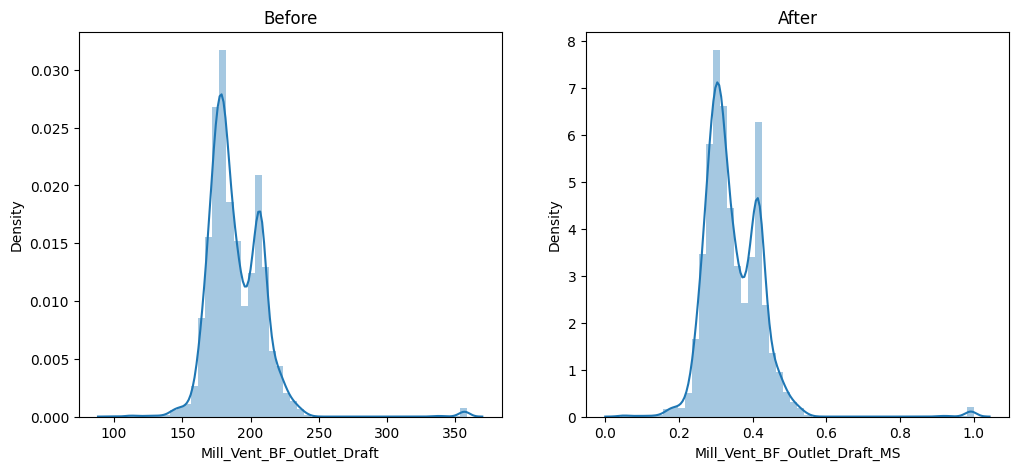

In [298]:
ms.fit(dataset[['Mill_Vent_BF_Outlet_Draft']])
dataset['Mill_Vent_BF_Outlet_Draft_MS'] = pd.DataFrame(ms.transform(dataset[['Mill_Vent_BF_Outlet_Draft']]), columns = ['X'])

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.title("Before")
sns.distplot(dataset['Mill_Vent_BF_Outlet_Draft'])


plt.subplot(1,2,2)
plt.title("After")
sns.distplot(dataset['Mill_Vent_BF_Outlet_Draft_MS'])

plt.show()

C:\Users\shashi\AppData\Local\Temp\ipykernel_6260\758878158.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['Reject'])
C:\Users\shashi\AppData\Local\Temp\ipykernel_6260\758878158.py:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['Reject_MS'])


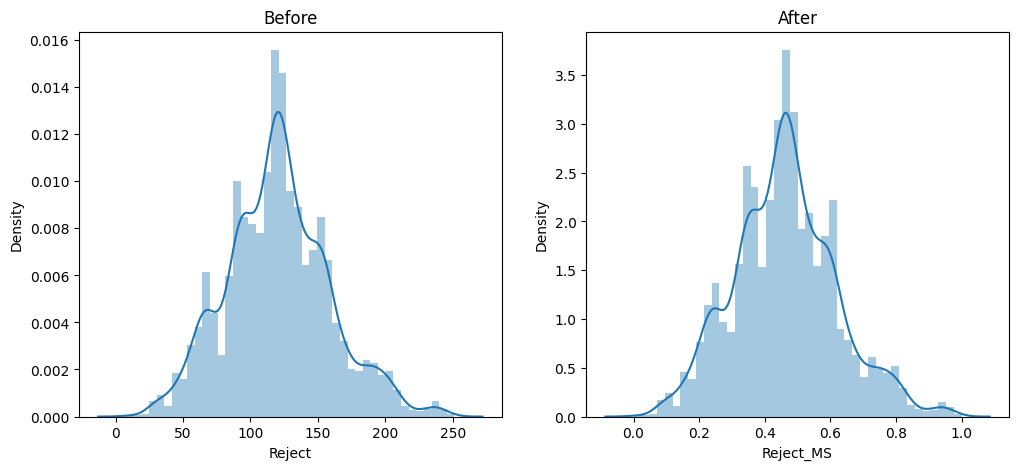

In [299]:
ms.fit(dataset[['Reject']])
dataset['Reject_MS'] = pd.DataFrame(ms.transform(dataset[['Reject']]), columns = ['X'])

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.title("Before")
sns.distplot(dataset['Reject'])


plt.subplot(1,2,2)
plt.title("After")
sns.distplot(dataset['Reject_MS'])

plt.show()

C:\Users\shashi\AppData\Local\Temp\ipykernel_6260\2216478875.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['Sep_RPM'])
C:\Users\shashi\AppData\Local\Temp\ipykernel_6260\2216478875.py:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['Sep_RPM_MS'])


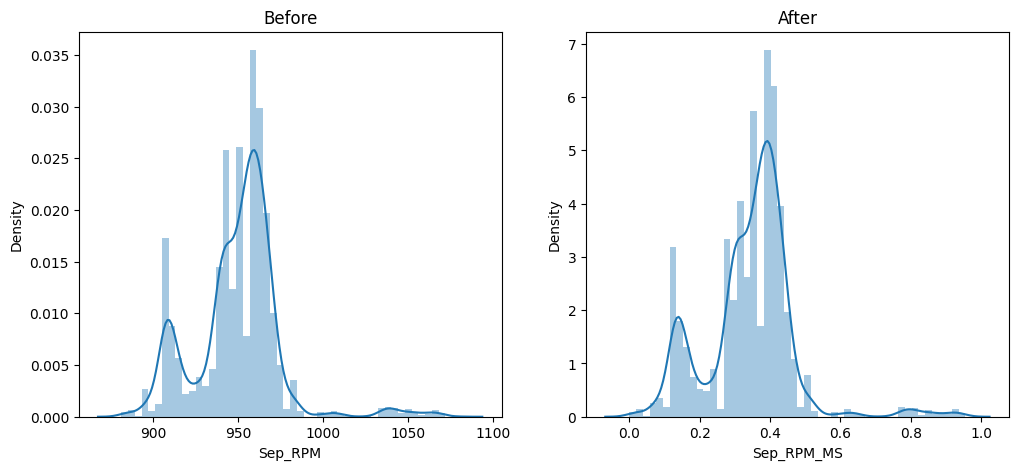

In [300]:
ms.fit(dataset[['Sep_RPM']])
dataset['Sep_RPM_MS'] = pd.DataFrame(ms.transform(dataset[['Sep_RPM']]), columns = ['X'])

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.title("Before")
sns.distplot(dataset['Sep_RPM'])


plt.subplot(1,2,2)
plt.title("After")
sns.distplot(dataset['Sep_RPM_MS'])

plt.show()

C:\Users\shashi\AppData\Local\Temp\ipykernel_6260\618247972.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['Sep_KW'])
C:\Users\shashi\AppData\Local\Temp\ipykernel_6260\618247972.py:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['Sep_KW_MS'])


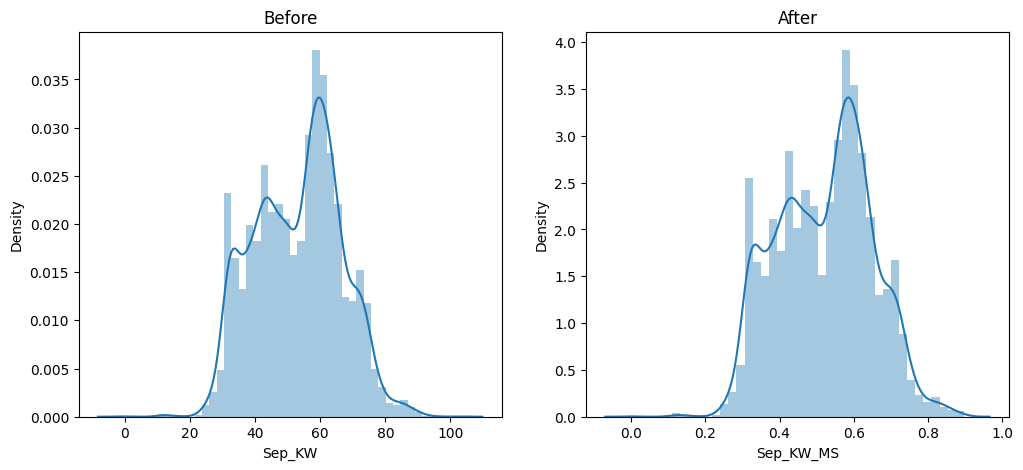

In [301]:
ms.fit(dataset[['Sep_KW']])
dataset['Sep_KW_MS'] = pd.DataFrame(ms.transform(dataset[['Sep_KW']]), columns = ['X'])

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.title("Before")
sns.distplot(dataset['Sep_KW'])


plt.subplot(1,2,2)
plt.title("After")
sns.distplot(dataset['Sep_KW_MS'])

plt.show()

C:\Users\shashi\AppData\Local\Temp\ipykernel_6260\3074890081.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['Sep_Amp'])
C:\Users\shashi\AppData\Local\Temp\ipykernel_6260\3074890081.py:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['Sep_Amp_MS'])


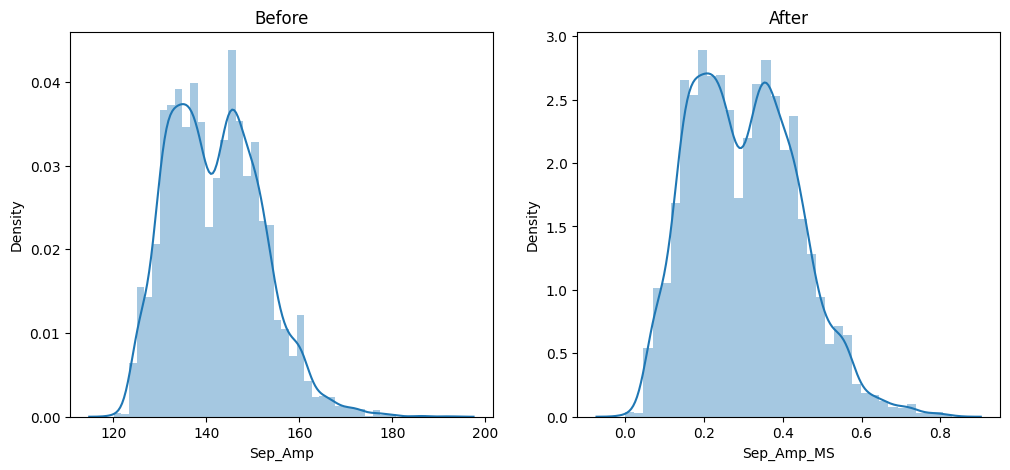

In [302]:
ms.fit(dataset[['Sep_Amp']])
dataset['Sep_Amp_MS'] = pd.DataFrame(ms.transform(dataset[['Sep_Amp']]), columns = ['X'])

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.title("Before")
sns.distplot(dataset['Sep_Amp'])


plt.subplot(1,2,2)
plt.title("After")
sns.distplot(dataset['Sep_Amp_MS'])

plt.show()

C:\Users\shashi\AppData\Local\Temp\ipykernel_6260\2064615675.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['CA_Fan_RPM'])
C:\Users\shashi\AppData\Local\Temp\ipykernel_6260\2064615675.py:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['CA_Fan_RPM_MS'])


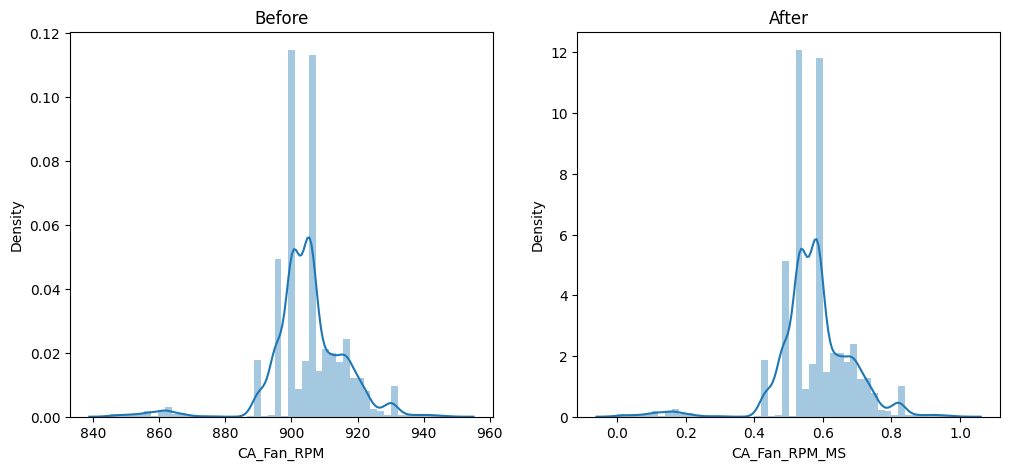

In [303]:
ms.fit(dataset[['CA_Fan_RPM']])
dataset['CA_Fan_RPM_MS'] = pd.DataFrame(ms.transform(dataset[['CA_Fan_RPM']]), columns = ['X'])

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.title("Before")
sns.distplot(dataset['CA_Fan_RPM'])


plt.subplot(1,2,2)
plt.title("After")
sns.distplot(dataset['CA_Fan_RPM_MS'])

plt.show()

C:\Users\shashi\AppData\Local\Temp\ipykernel_6260\233584021.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['CA_Fan_KW'])
C:\Users\shashi\AppData\Local\Temp\ipykernel_6260\233584021.py:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['CA_Fan_KW_MS'])


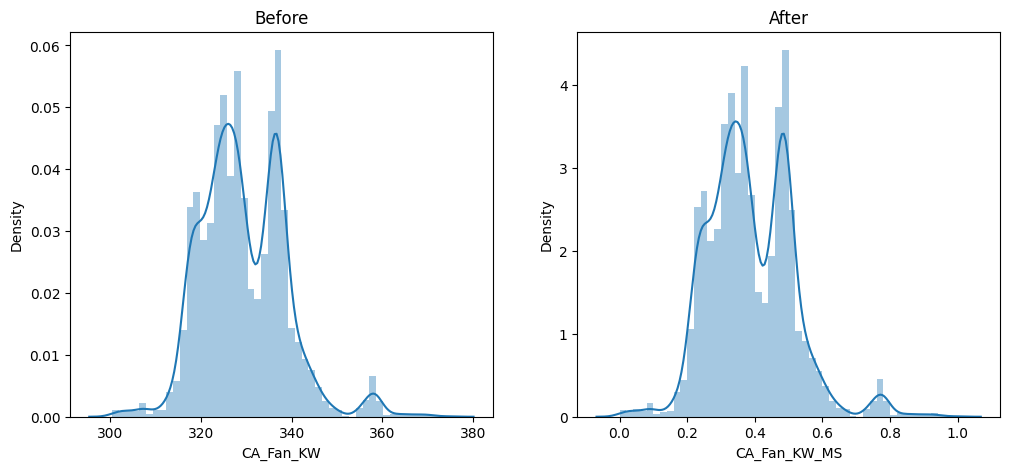

In [304]:
ms.fit(dataset[['CA_Fan_KW']])
dataset['CA_Fan_KW_MS'] = pd.DataFrame(ms.transform(dataset[['CA_Fan_KW']]), columns = ['X'])

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.title("Before")
sns.distplot(dataset['CA_Fan_KW'])


plt.subplot(1,2,2)
plt.title("After")
sns.distplot(dataset['CA_Fan_KW_MS'])

plt.show()

C:\Users\shashi\AppData\Local\Temp\ipykernel_6260\1801337530.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['Mill_Folaphone'])
C:\Users\shashi\AppData\Local\Temp\ipykernel_6260\1801337530.py:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['Mill_Folaphone_MS'])


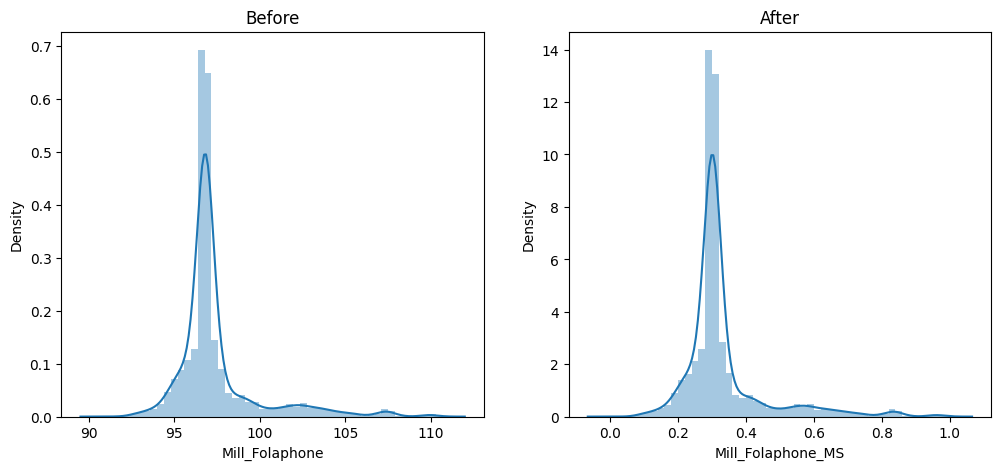

In [305]:
ms.fit(dataset[['Mill_Folaphone']])
dataset['Mill_Folaphone_MS'] = pd.DataFrame(ms.transform(dataset[['Mill_Folaphone']]), columns = ['X'])

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.title("Before")
sns.distplot(dataset['Mill_Folaphone'])


plt.subplot(1,2,2)
plt.title("After")
sns.distplot(dataset['Mill_Folaphone_MS'])

plt.show()

C:\Users\shashi\AppData\Local\Temp\ipykernel_6260\2341352057.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['Mill_Inlet_Draft'])
C:\Users\shashi\AppData\Local\Temp\ipykernel_6260\2341352057.py:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['Mill_Inlet_Draft_MS'])


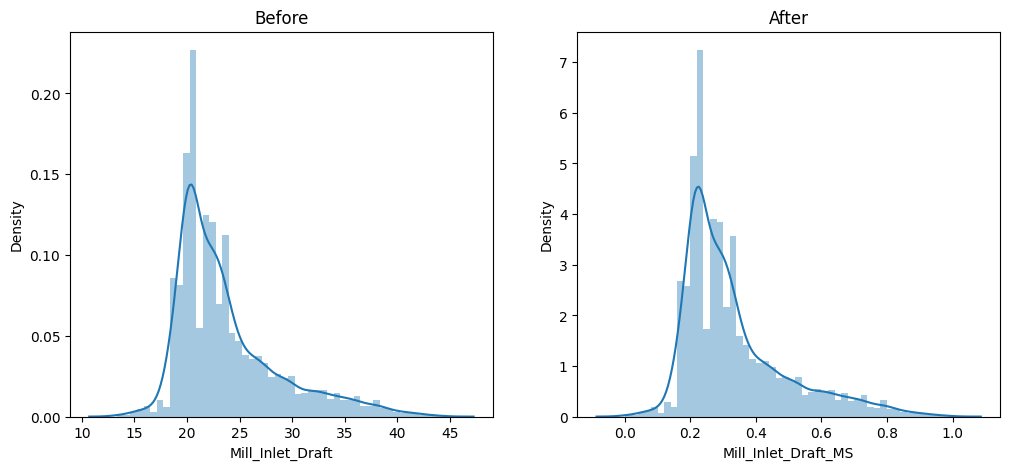

In [306]:
ms.fit(dataset[['Mill_Inlet_Draft']])
dataset['Mill_Inlet_Draft_MS'] = pd.DataFrame(ms.transform(dataset[['Mill_Inlet_Draft']]), columns = ['X'])

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.title("Before")
sns.distplot(dataset['Mill_Inlet_Draft'])


plt.subplot(1,2,2)
plt.title("After")
sns.distplot(dataset['Mill_Inlet_Draft_MS'])

plt.show()

C:\Users\shashi\AppData\Local\Temp\ipykernel_6260\1093084593.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['Mill_Outlet_Draft'])
C:\Users\shashi\AppData\Local\Temp\ipykernel_6260\1093084593.py:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['Mill_Outlet_Draft_MS'])


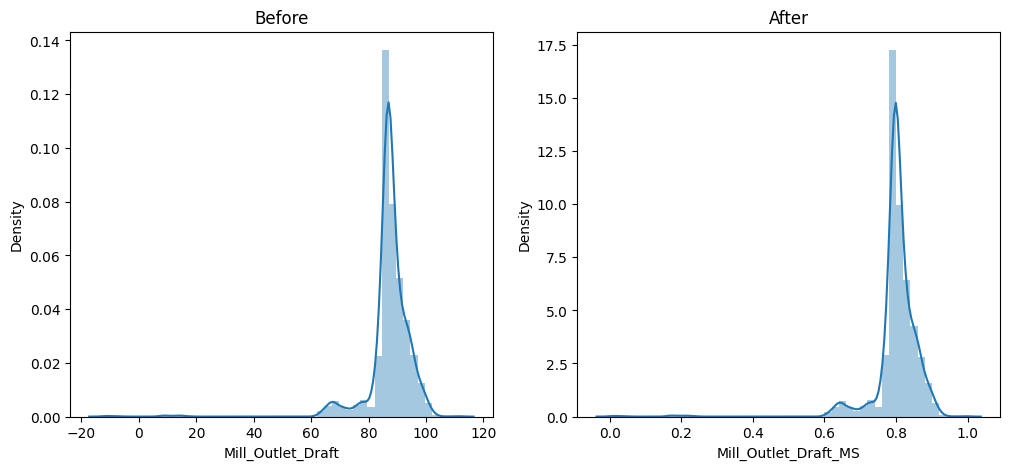

In [307]:
ms.fit(dataset[['Mill_Outlet_Draft']])
dataset['Mill_Outlet_Draft_MS'] = pd.DataFrame(ms.transform(dataset[['Mill_Outlet_Draft']]), columns = ['X'])

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.title("Before")
sns.distplot(dataset['Mill_Outlet_Draft'])


plt.subplot(1,2,2)
plt.title("After")
sns.distplot(dataset['Mill_Outlet_Draft_MS'])

plt.show()

C:\Users\shashi\AppData\Local\Temp\ipykernel_6260\957940524.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['Sep_Vent_Inlet_Draft'])
C:\Users\shashi\AppData\Local\Temp\ipykernel_6260\957940524.py:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['Sep_Vent_Inlet_Draft_MS'])


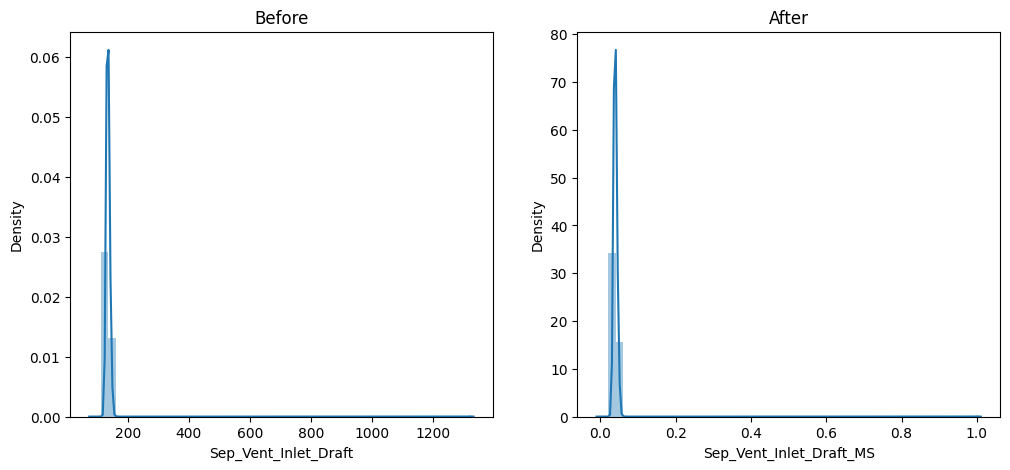

In [308]:
ms.fit(dataset[['Sep_Vent_Inlet_Draft']])
dataset['Sep_Vent_Inlet_Draft_MS'] = pd.DataFrame(ms.transform(dataset[['Sep_Vent_Inlet_Draft']]), columns = ['X'])

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.title("Before")
sns.distplot(dataset['Sep_Vent_Inlet_Draft'])


plt.subplot(1,2,2)
plt.title("After")
sns.distplot(dataset['Sep_Vent_Inlet_Draft_MS'])

plt.show()

C:\Users\shashi\AppData\Local\Temp\ipykernel_6260\4038244405.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['Sep_Vent_Outlet_Draft'])
C:\Users\shashi\AppData\Local\Temp\ipykernel_6260\4038244405.py:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['Sep_Vent_Outlet_Draft_MS']

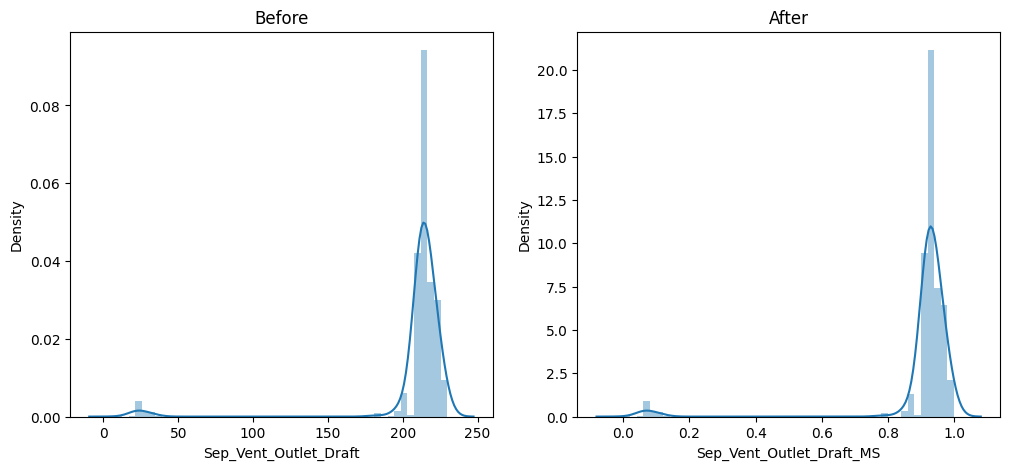

In [309]:
ms.fit(dataset[['Sep_Vent_Outlet_Draft']])
dataset['Sep_Vent_Outlet_Draft_MS'] = pd.DataFrame(ms.transform(dataset[['Sep_Vent_Outlet_Draft']]), columns = ['X'])

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.title("Before")
sns.distplot(dataset['Sep_Vent_Outlet_Draft'])


plt.subplot(1,2,2)
plt.title("After")
sns.distplot(dataset['Sep_Vent_Outlet_Draft_MS'])

plt.show()

C:\Users\shashi\AppData\Local\Temp\ipykernel_6260\1654782574.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['Sep_Vent_bag_filter_fan_kw'])
C:\Users\shashi\AppData\Local\Temp\ipykernel_6260\1654782574.py:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['Sep_Vent_bag_filter_f

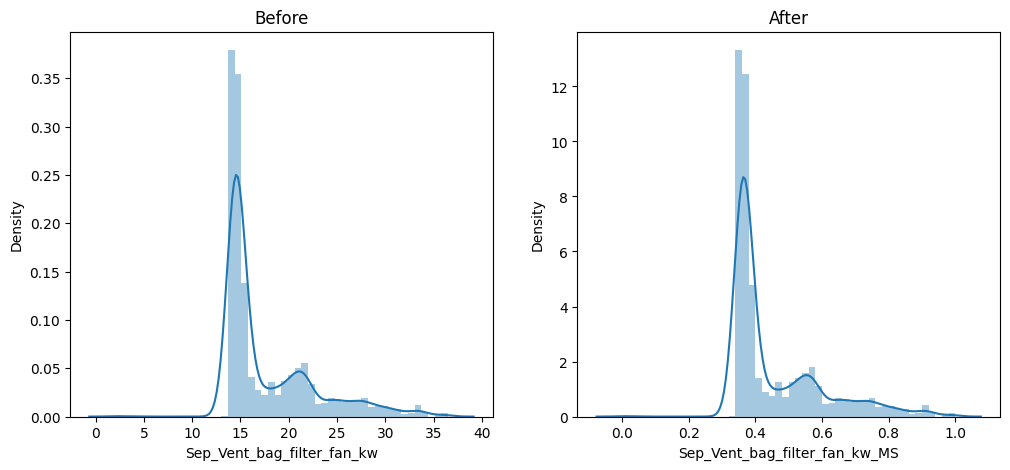

In [310]:
ms.fit(dataset[['Sep_Vent_bag_filter_fan_kw']])
dataset['Sep_Vent_bag_filter_fan_kw_MS'] = pd.DataFrame(ms.transform(dataset[['Sep_Vent_bag_filter_fan_kw']]), columns = ['X'])

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.title("Before")
sns.distplot(dataset['Sep_Vent_bag_filter_fan_kw'])


plt.subplot(1,2,2)
plt.title("After")
sns.distplot(dataset['Sep_Vent_bag_filter_fan_kw_MS'])

plt.show()

C:\Users\shashi\AppData\Local\Temp\ipykernel_6260\3076358245.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['Sep_Vent_bag_filter_fan_rpm'])
C:\Users\shashi\AppData\Local\Temp\ipykernel_6260\3076358245.py:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['Sep_Vent_bag_filter_

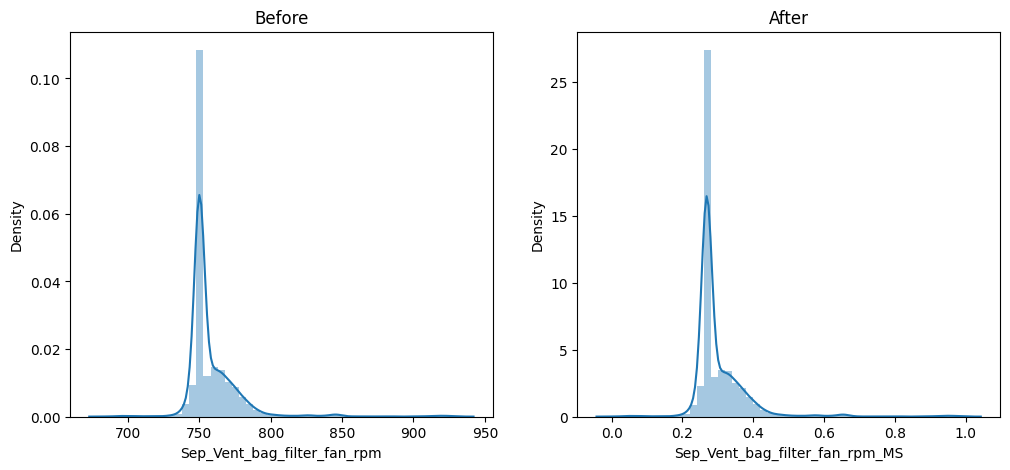

In [311]:
ms.fit(dataset[['Sep_Vent_bag_filter_fan_rpm']])
dataset['Sep_Vent_bag_filter_fan_rpm_MS'] = pd.DataFrame(ms.transform(dataset[['Sep_Vent_bag_filter_fan_rpm']]), columns = ['X'])

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.title("Before")
sns.distplot(dataset['Sep_Vent_bag_filter_fan_rpm'])


plt.subplot(1,2,2)
plt.title("After")
sns.distplot(dataset['Sep_Vent_bag_filter_fan_rpm_MS'])

plt.show()

C:\Users\shashi\AppData\Local\Temp\ipykernel_6260\526490636.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['Residue'])
C:\Users\shashi\AppData\Local\Temp\ipykernel_6260\526490636.py:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['Residue_MS'])


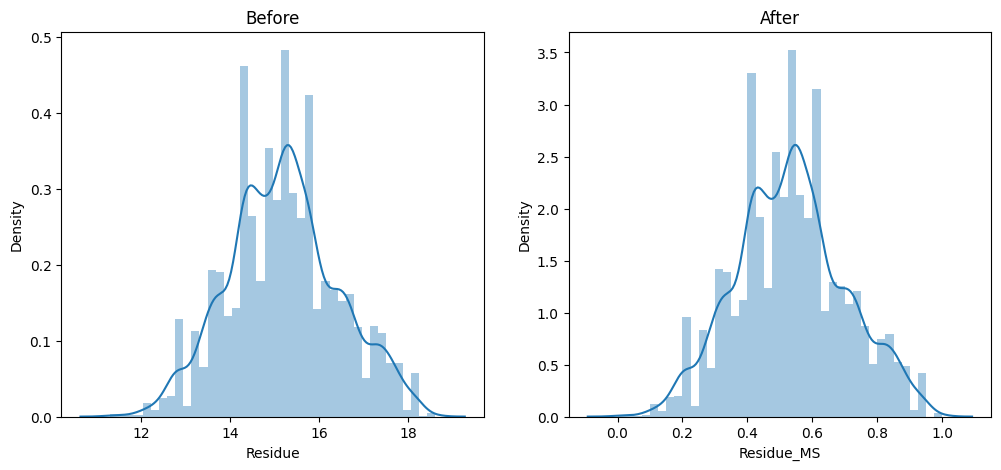

In [312]:
ms.fit(dataset[['Residue']])
dataset['Residue_MS'] = pd.DataFrame(ms.transform(dataset[['Residue']]), columns = ['X'])

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.title("Before")
sns.distplot(dataset['Residue'])


plt.subplot(1,2,2)
plt.title("After")
sns.distplot(dataset['Residue_MS'])

plt.show()

#### Histogram Plot 

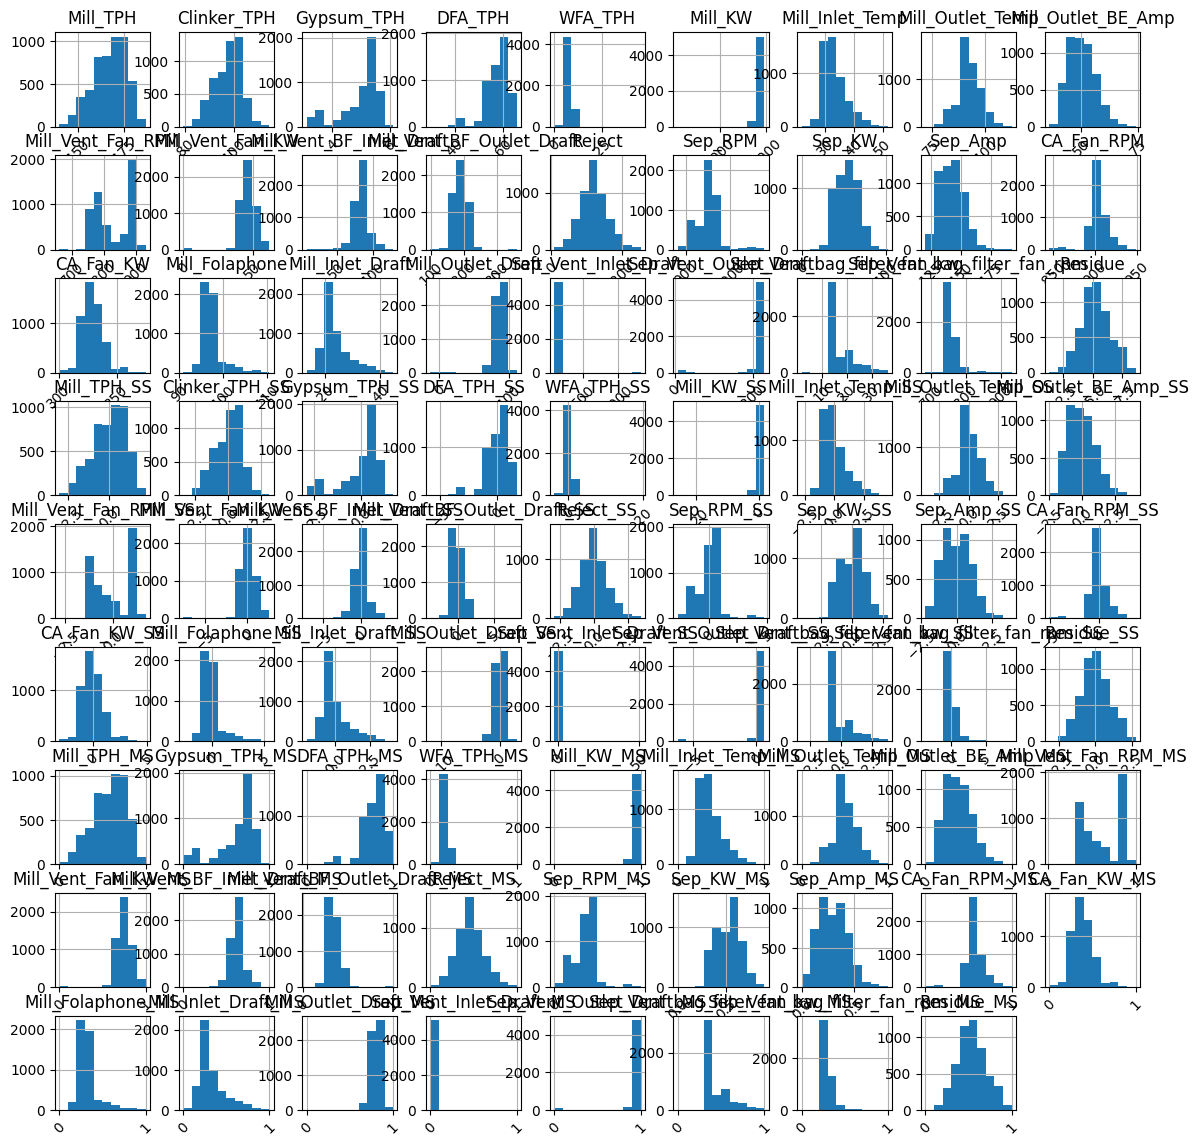

In [313]:
dataset.hist(figsize=(14,14), xrot=45)
plt.show()

### Skewness Plots

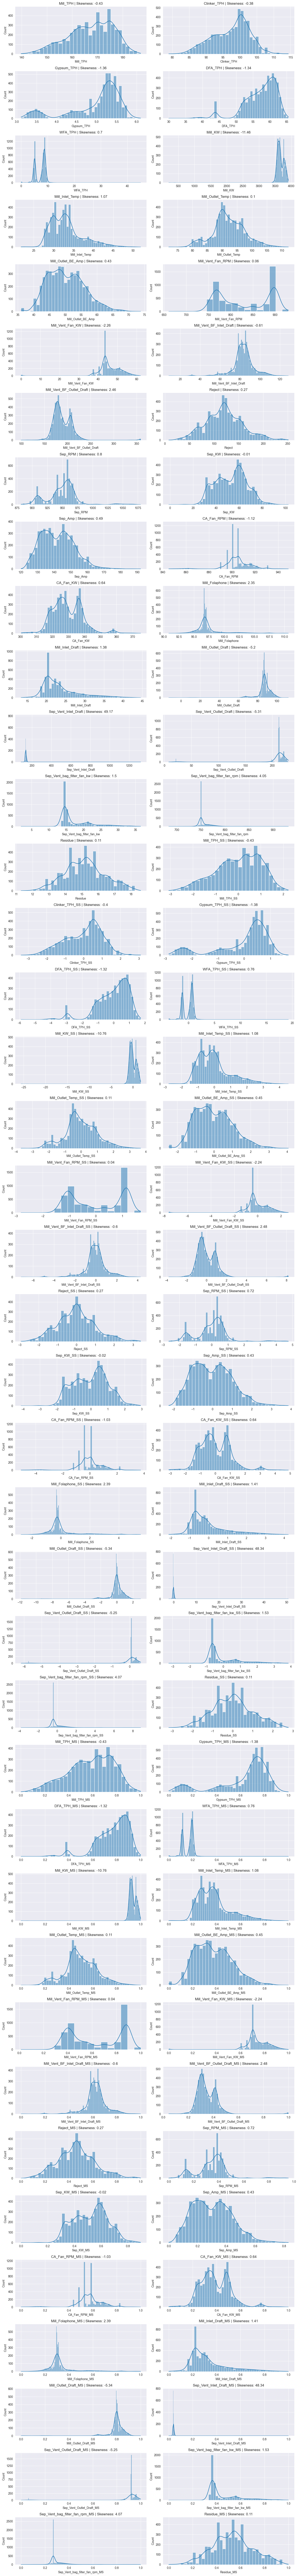

In [314]:
# Set Seaborn style
sns.set_style("darkgrid")

# Identify numerical columns
numerical_columns = dataset.select_dtypes(include=["int64", "float64"]).columns

# Plot distribution of each numerical feature
plt.figure(figsize=(14, len(numerical_columns) * 3))
for idx, feature in enumerate(numerical_columns, 1):
	plt.subplot(len(numerical_columns), 2, idx)
	sns.histplot(dataset[feature], kde=True)
	plt.title(f"{feature} | Skewness: {round(dataset[feature].skew(), 2)}")

# Adjust layout and show plots
plt.tight_layout()
plt.show()

### Kurtosis Plot

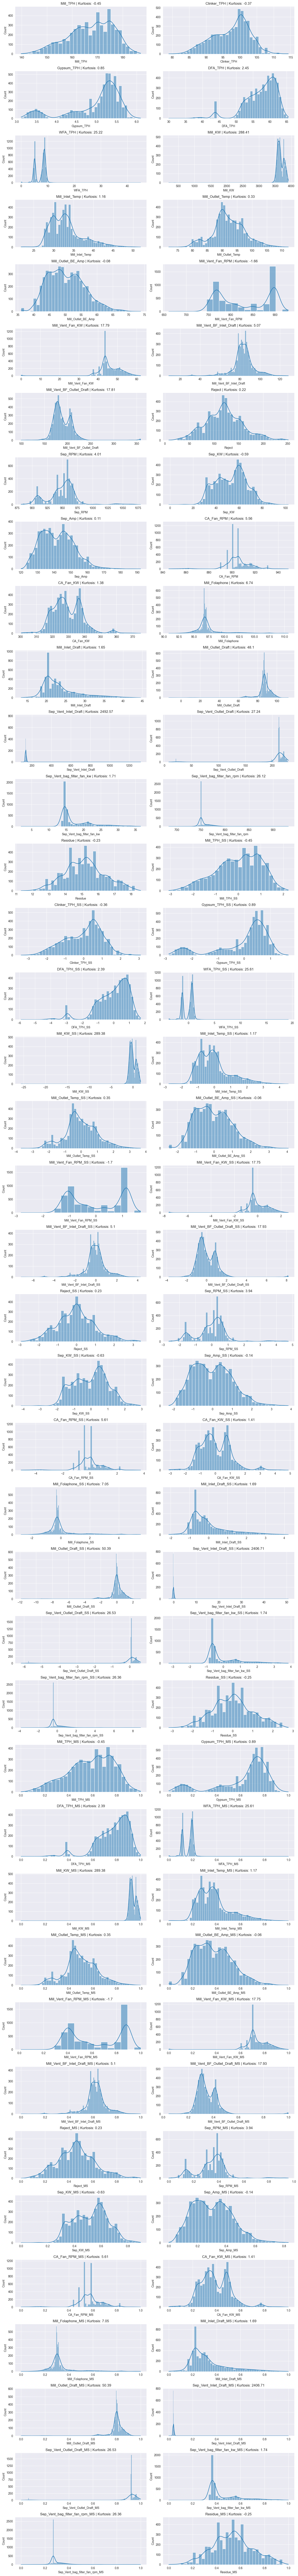

In [315]:
# Set Seaborn style
sns.set_style("darkgrid")

# Identify numerical columns
numerical_columns = dataset.select_dtypes(include=["int64", "float64"]).columns

# Plot distribution of each numerical feature
plt.figure(figsize=(14, len(numerical_columns) * 3))
for idx, feature in enumerate(numerical_columns, 1):
	plt.subplot(len(numerical_columns), 2, idx)
	sns.histplot(dataset[feature], kde=True)
	plt.title(f"{feature} | Kurtosis: {round(dataset[feature].kurt(), 2)}")

# Adjust layout and show plots
plt.tight_layout()
plt.show()

## Exporting the data

In [316]:
dataset.to_csv(r"D:\cement manufacturing aoutomation\output data\outputdata.csv")